### Hyunghwa Oh & K-State Honor Code ("On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.")

# Applebees' Twitter Analytics before_No ReTweets

<img src = "data/applebees_logo.png">

# Question #1 Business Questions
## - 1. Who are mentioning applebees in the Twitter sphere?
## - 2. What are popular hashtags?
## - 3. What are popular terms?
## - 4. What topics are considered important?
## - 5. How Applebees use its twitter account? Customer Service? Sales? Promotion?
## - 6. What is the sentiment about Applebees, using Vader?
## - 7. What is the topic based on Topic Modeling before/after Promotion?

In [2]:
# import text data (csv) as a dataframe
# Source: https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
import pandas as pd

df = pd.read_csv("before.csv",error_bad_lines=False)
df.head()   
# in a read-world data analytics, we should use "df.head()" or df.head(2) instead of df. In HWs, you need use df.head()

Unnamed: 0  number            id        time       created_at  month  day  \
0          11      11  1.050000e+18  1538170051  9/28/2018 21:27      9   28   
1          16      16  1.050000e+18  1538170102  9/28/2018 21:28      9   28   
2          20      20  1.050000e+18  1538170124  9/28/2018 21:28      9   28   
3          26      26  1.050000e+18  1538170195  9/28/2018 21:29      9   28   
4          30      30  1.050000e+18  1538170258  9/28/2018 21:30      9   28   

   daterecode   from_user_name  lat  \
0         928     cubathletics  NaN   
1         928     Altre_stelle  NaN   
2         928    phightinphils  NaN   
3         928  MultiverseBrian  NaN   
4         928      JazmynnShae  NaN   

                         ...                          favorite_1000  \
0                        ...                                  0.239   
1                        ...                                  6.725   
2                        ...                                  4.939   
3                        ...                                  8.870   
4                        ...                                 10.699   

  from_user_created_at counts marketing_BEFOREAFTER  marketing  apple  \
0     12/26/2012 13:44    170                before          0      0   
1      9/15/2017 10:30    122                before          0      0   
2      9/14/2010 23:15    108                before          0      0   
3        7/9/2016 3:22     73                before          0      0   
4      9/19/2012 18:37    152                before          0      0   

   retweet  retweet_1                                              tweet  \
0    False          0  it's not too late to support the cheerleaders ...   
1    False          0  lindsey graham dining alone at applebee?s kind...   
2    False          0  @jaypharoah you ready to hit up applebee?s wit...   
3    False          0  @kasie this is even sadder to me cuz i ate alo...   
4    False          0  i still have my applebee?s name tag as a remin...   

                                           documents  
0  not too late support the cheerleaders pancake ...  
1  lindsey graham dining alone  kind wishes prote...  
2  jaypharoah you ready hit  with for those apps ...  
3    kasie this even sadder cuz ate alone  yesterday  
4  still have  name tag reminder that matter what...  

[5 rows x 30 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31794 entries, 0 to 31793
Data columns (total 30 columns):
Unnamed: 0               31794 non-null int64
number                   31794 non-null int64
id                       31794 non-null float64
time                     31794 non-null int64
created_at               31794 non-null object
month                    31794 non-null int64
day                      31794 non-null int64
daterecode               31794 non-null int64
from_user_name           31794 non-null object
lat                      562 non-null float64
lng                      562 non-null float64
location                 23101 non-null object
location1                23100 non-null object
location2                12366 non-null object
tweetcount               31794 non-null int64
follower                 31794 non-null int64
follower_1000            31794 non-null float64
friend                   31794 non-null int64
friend_1000              31794 non-null float64
favori

In [4]:
# to view entire column :#-1 means unlimted length

pd.set_option('display.max_colwidth', -1)

# lower()

# split()

# replace()

# contains

# startswith()

# count()

# find hashtags(#)

The hashtags column contains lists (data with brackets), not string. You can change this.

# Data Cleaning

# Data Cleaning: putting eveything together 

# 1. Descriptive Analytics

In [3]:
# import packages

# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

# Most Frequent Hashtags (#)

# The result of Top 10 most frequent hashtags(#)

# Most Frequent Mentions (@)

# The result of Top 10 most frequent mentions(@)

# Word Frequency Analysis of Applebees Tweets 

In [7]:
#Read a sepecific column in csv file.
#Source: https://stackoverflow.com/questions/16503560/read-specific-columns-from-a-csv-file-with-csv-module
tweets = pd.read_csv("before.csv", usecols=['documents'])
tweets.head()

documents
0  not too late support the cheerleaders pancake breakfast the event tomorrow morning from the white marsh  tickets are available the door
1  lindsey graham dining alone  kind wishes protesters would come heckle him                                                              
2  jaypharoah you ready hit  with for those apps when are you coming milwaukee                                                            
3  kasie this even sadder cuz ate alone  yesterday                                                                                        
4  still have  name tag reminder that matter what doing where life takes will never work the food industry again

In [25]:
#Save above slecected "document" columne to csv file.
tweets.to_csv("applebees_words.csv", index=False)

In [134]:
# load data
review = []
openfile = open('applebees_words.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [48]:
!pip install twython

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [49]:
#Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid = SIA()
    
ratings_sentiment = []
for r in review:
    sentiment = []
    #aspect ratings based on sentiment
    for s in r:
        ss = sid.polarity_scores(s)
        sentiment.append(ss['compound'])
    ratings_sentiment.append(sentiment)

In [50]:
ratings_sentiment

[[0.0],
 [-0.015],
 [0.2732],
 [0.3612],
 [-0.6597],
 [0.0258],
 [-0.25],
 [-0.25],
 [0.2732],
 [-0.3612],
 [0.8555],
 [0.0613],
 [0.4404],
 [0.0],
 [0.2732],
 [0.0],
 [0.2732],
 [0.0],
 [0.8807],
 [-0.5719],
 [-0.1027],
 [0.0],
 [0.7964],
 [-0.3612],
 [0.4011],
 [0.0],
 [0.2732],
 [0.8074],
 [0.8074],
 [0.0],
 [0.4019],
 [0.6369],
 [0.0],
 [0.5859],
 [-0.4005],
 [0.0],
 [-0.1027],
 [-0.6124],
 [0.0],
 [-0.25],
 [0.0],
 [0.0],
 [-0.1531],
 [0.2732],
 [0.0],
 [0.0],
 [0.765],
 [0.0],
 [0.0],
 [0.4404],
 [0.4215],
 [0.3612],
 [-0.6249],
 [0.0],
 [0.0],
 [-0.25],
 [0.0772],
 [0.0],
 [-0.3182],
 [0.0],
 [0.5719],
 [0.2732],
 [0.4588],
 [0.0],
 [0.2023],
 [0.2732],
 [0.0],
 [0.2732],
 [-0.0516],
 [-0.2023],
 [0.7964],
 [0.0],
 [0.0644],
 [0.0],
 [-0.1779],
 [-0.4767],
 [0.0],
 [-0.836],
 [0.0],
 [0.0],
 [0.2732],
 [0.2716],
 [0.0516],
 [0.0],
 [-0.3818],
 [0.6908],
 [-0.3182],
 [0.0],
 [0.4019],
 [0.0],
 [0.6369],
 [-0.5994],
 [0.5719],
 [-0.3392],
 [0.2732],
 [0.2732],
 [0.2732],
 [0.2732]

In [ ]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
#wordnet_lemmatizer = WordNetLemmatizer()
#tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens = (word for word in tokens if word not in stopwords.words('english'))

more_stopwords = set(('let','think','even','need','really','come','always','like','got','want','good','know','day','night','would','going','eating','went','told','get','every','yes','https','take','try','via'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

In [32]:
# Word frequency analysis
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'ihop': 1835, 'zombie': 1581, 'wings': 1457, 'bar': 1449, 'eat': 1379, 'mcdonalds': 1367, 'redlobster': 1311, 'drinks': 1307, 'people': 1306, 'designationsix': 1263, ...})

In [33]:
fdist.most_common(50)

[('ihop', 1835),
 ('zombie', 1581),
 ('wings', 1457),
 ('bar', 1449),
 ('eat', 1379),
 ('mcdonalds', 1367),
 ('redlobster', 1311),
 ('drinks', 1307),
 ('people', 1306),
 ('designationsix', 1263),
 ('drink', 1151),
 ('one', 1149),
 ('time', 1147),
 ('food', 1136),
 ('foxnews', 1124),
 ('walmart', 1113),
 ('goldencorral', 1113),
 ('grill', 1096),
 ('free', 994),
 ('waitress', 967),
 ('tip', 966),
 ('black', 885),
 ('lol', 812),
 ('rubytuesday', 752),
 ('month', 740),
 ('see', 706),
 ('veterans', 699),
 ('customers', 698),
 ('arbys', 691),
 ('mypillowusa', 689),
 ('love', 686),
 ('tonight', 664),
 ('idahopotato', 637),
 ('never', 615),
 ('new', 611),
 ('dinner', 600),
 ('shit', 597),
 ('nestle', 582),
 ('today', 562),
 ('card', 545),
 ('work', 544),
 ('last', 533),
 ('october', 531),
 ('omahasteaks', 524),
 ('proctergamble', 518),
 ('dollar', 517),
 ('win', 512),
 ('still', 509),
 ('wan', 509),
 ('right', 509)]

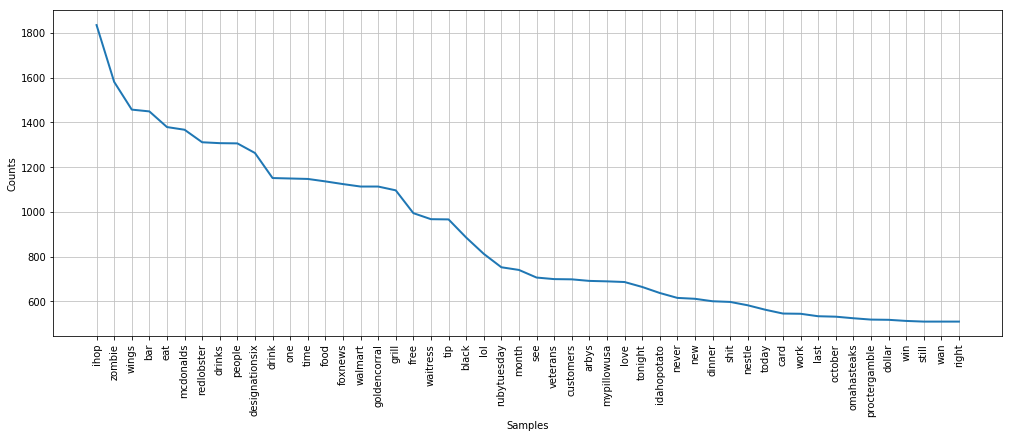

In [34]:
plt.figure(figsize=(17,6))
fdist.plot(50)

In [35]:
# load data
review = []
openfile = open('applebees_words.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [36]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
#wordnet_lemmatizer = WordNetLemmatizer()
#tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens = (word for word in tokens if word not in stopwords.words('english'))

more_stopwords = set(('let','think','even','need','really','come','always','like','got','want','good','know','day','night','would','going','eating','went','told','get','every','yes','https','take','try','via'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

In [37]:
applebees_bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(applebees_bigrams)
fdist_bi

FreqDist({('grill', 'bar'): 1057, ('redlobster', 'goldencorral'): 959, ('tip', 'black'): 651, ('black', 'people'): 645, ('designationsix', 'foxnews'): 638, ('walmart', 'mypillowusa'): 610, ('waitress', 'tip'): 524, ('zombie', 'drink'): 518, ('idahopotato', 'walmart'): 488, ('zombie', 'drinks'): 462, ...})

In [38]:
fdist_bi.most_common(50)

[(('grill', 'bar'), 1057),
 (('redlobster', 'goldencorral'), 959),
 (('tip', 'black'), 651),
 (('black', 'people'), 645),
 (('designationsix', 'foxnews'), 638),
 (('walmart', 'mypillowusa'), 610),
 (('waitress', 'tip'), 524),
 (('zombie', 'drink'), 518),
 (('idahopotato', 'walmart'), 488),
 (('zombie', 'drinks'), 462),
 (('foxnews', 'arbys'), 414),
 (('goldencorral', 'ihop'), 402),
 (('eat', 'wings'), 395),
 (('people', 'customers'), 383),
 (('gender', 'reveal'), 355),
 (('mcdonalds', 'ihop'), 317),
 (('allstate', 'esurance'), 312),
 (('reveal', 'party'), 310),
 (('nutrisystem', 'southbeachdiet'), 309),
 (('tide', 'mcdonalds'), 305),
 (('duracell', 'charmin'), 305),
 (('heinzuk', 'tide'), 303),
 (('luvs', 'redlobster'), 303),
 (('oscarmayer', 'duracell'), 303),
 (('southbeachdiet', 'allstate'), 303),
 (('mypillowusa', 'oscarmayer'), 303),
 (('pampers', 'luvs'), 303),
 (('charmin', 'heinzuk'), 303),
 (('ihop', 'pampers'), 303),
 (('esurance', 'walmart'), 303),
 (('foxnews', 'nutrisystem

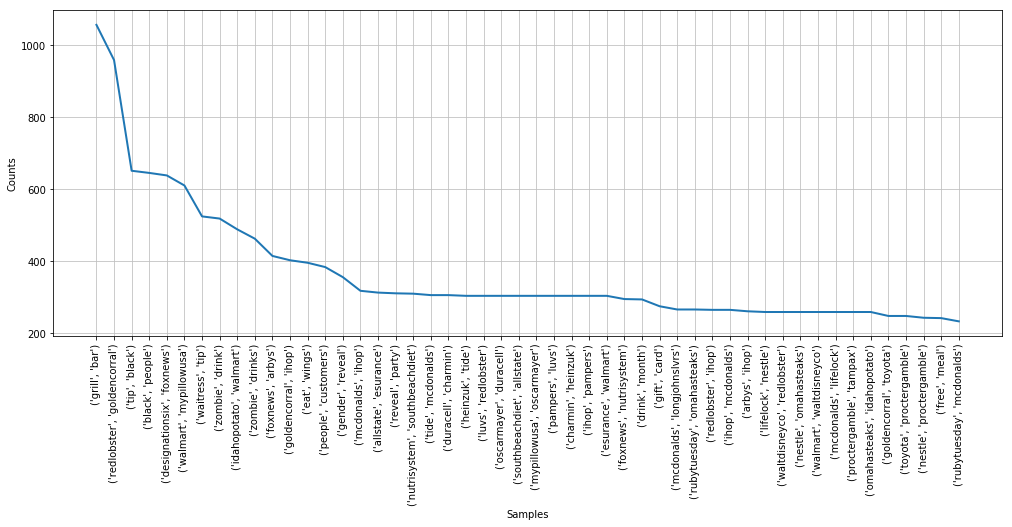

In [39]:
plt.figure(figsize=(17,6))
fdist_bi.plot(50)

# Applebees Word Cloud

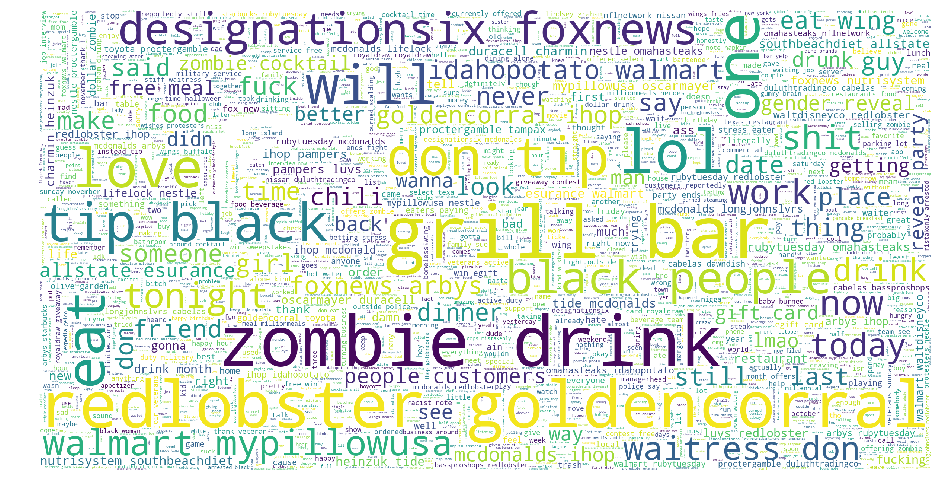

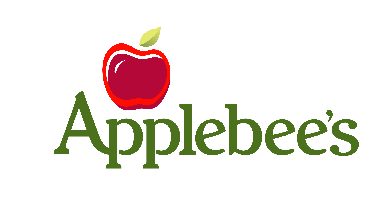

In [44]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

d = path.dirname("data/")

# Read the whole text.
text = open(path.join(d, 'applebees_words.csv')).read()

stopwords = set(STOPWORDS)
stopwords.add("get")
stopwords.add("every")
stopwords.add("yes")
stopwords.add("https")
stopwords.add("take")
stopwords.add("try")
stopwords.add("via")
stopwords.add("let")
stopwords.add("think")
stopwords.add("even")
stopwords.add("need")
stopwords.add("really")
stopwords.add("got")
stopwords.add("come")
stopwords.add("always")
stopwords.add("like")
stopwords.add("want")
stopwords.add("good")
stopwords.add("know")
stopwords.add("day")
stopwords.add("night")
stopwords.add("would")
stopwords.add("going")
stopwords.add("eating")
stopwords.add("went")
stopwords.add("told")


# read the mask image
apple_mask = np.array(Image.open(path.join(d, "applebees_logo.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=apple_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# show
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

plt.figure()
plt.imshow(apple_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("data/apple.png")
plt.savefig("data/apple.pdf")

In [ ]:
#Sentiment analysis
sid = SIA()
    
ratings_sentiment = []
for r in review_actual:
    sentiment = []
    #aspect ratings based on sentiment
    for s in r:
        ss = sid.polarity_scores(s)
        sentiment.append(ss['compound'])
    ratings_sentiment.append(sentiment)




# Question #2 - What Applebees are tweeting, how they use Twitter and messages, and how the company interacts with its customers. Do they use Twitter for customer service? Sales? Promotion?

# Additional data collection
## - 3200 tweets from applebees Twitter accunt were collected by following 3. twitter_Analytics_for_CollectingAllUsersTweets_Complete_s

In [18]:
import pandas as pd

df = pd.read_csv("data/output_user_tweets.csv", error_bad_lines=False, header=None)
df.head()   

0                    1                    2  \
0  applebees  1058057214815096832  2018-11-01 18:04:32   
1  applebees  1058056101730627592  2018-11-01 18:00:07   
2  applebees  1058048338619232257  2018-11-01 17:29:16   
3  applebees  1058047771352162304  2018-11-01 17:27:00   
4  applebees  1058043129272717312  2018-11-01 17:08:34   

                                                   3  
0                     @_leecmorgan Oh you know it 😉  
1  our #NeighborhoodDrink never misses the mark. ...  
2  @ItsKadyPGH It must've been great then, right? 😋  
3  @alyssapalella Alyssa, did you see?! Our Novem...  
4         @biancaxmariee Bianca, our $2 Dilly Dilly!

In [19]:
df[3].str.lower()

0                          @_leecmorgan oh you know it 😉
1       our #neighborhooddrink never misses the mark. ...
2       @itskadypgh it must've been great then, right? 😋
3       @alyssapalella alyssa, did you see?! our novem...
4              @biancaxmariee bianca, our $2 dilly dilly!
5       @jcmsxx lucia, we're sorry to hear that you're...
6                                      @libbbypaps 🙌🙌🙌
7       @acsdbeyond we hope that you guys enjoyed your...
8       @trentonbphodge we'll let our food and beverag...
9       @hilary1218 we hate to hear that. we're always...
10      @bethy1414 hi beth, sorry to hear that you're ...
11      @baristadanny daniel, let us know your feedbac...
12      @grillycheese92 hi, we'll let our food and bev...
13                          @_infamousd how did we do? 😏
14      @gezimcamaj this is not what we want to hear a...
15      @bradyrockstar hi, we promise we aren't ghosti...
16        @jgsweetz best halloween costume we've seen yet
17      @astoldbykeo

In [20]:
# you can update the data frame
df['counts'] = df[3].str.len()
df.head(5)

0                    1                    2  \
0  applebees  1058057214815096832  2018-11-01 18:04:32   
1  applebees  1058056101730627592  2018-11-01 18:00:07   
2  applebees  1058048338619232257  2018-11-01 17:29:16   
3  applebees  1058047771352162304  2018-11-01 17:27:00   
4  applebees  1058043129272717312  2018-11-01 17:08:34   

                                                   3  counts  
0                     @_leecmorgan Oh you know it 😉      32  
1  our #NeighborhoodDrink never misses the mark. ...     111  
2  @ItsKadyPGH It must've been great then, right? 😋      51  
3  @alyssapalella Alyssa, did you see?! Our Novem...     100  
4         @biancaxmariee Bianca, our $2 Dilly Dilly!      42

In [21]:
df[3].str.split()[0]

['@_leecmorgan', 'Oh', 'you', 'know', 'it', '\xf0\x9f\x98\x89']

In [22]:
df['Text'] = df[3].str.replace(',', '')
df.head()

0                    1                    2  \
0  applebees  1058057214815096832  2018-11-01 18:04:32   
1  applebees  1058056101730627592  2018-11-01 18:00:07   
2  applebees  1058048338619232257  2018-11-01 17:29:16   
3  applebees  1058047771352162304  2018-11-01 17:27:00   
4  applebees  1058043129272717312  2018-11-01 17:08:34   

                                                   3  counts  \
0                     @_leecmorgan Oh you know it 😉      32   
1  our #NeighborhoodDrink never misses the mark. ...     111   
2  @ItsKadyPGH It must've been great then, right? 😋      51   
3  @alyssapalella Alyssa, did you see?! Our Novem...     100   
4         @biancaxmariee Bianca, our $2 Dilly Dilly!      42   

                                                Text  
0                     @_leecmorgan Oh you know it 😉  
1  our #NeighborhoodDrink never misses the mark. ...  
2   @ItsKadyPGH It must've been great then right? 😋  
3  @alyssapalella Alyssa did you see?! Our Novemb...  
4          @biancaxmariee Bianca our $2 Dilly Dilly!

In [23]:
# extract words starting with # ... hashtags
df.Text.str.findall("(?<=#)\w+")

0                        []
1       [NeighborhoodDrink]
2                        []
3                        []
4                        []
5                        []
6                        []
7                        []
8                        []
9                        []
10                       []
11                       []
12                       []
13                       []
14                       []
15                       []
16                       []
17                       []
18                       []
19                       []
20                       []
21                       []
22                       []
23                       []
24                       []
25                       []
26                       []
27                       []
28                       []
29                       []
               ...         
3209                     []
3210                     []
3211                     []
3212                     []
3213                

In [24]:
# crate a column 
df['hash'] = df.Text.str.findall("(?<=#)\w+")
df.head(5)

0                    1                    2  \
0  applebees  1058057214815096832  2018-11-01 18:04:32   
1  applebees  1058056101730627592  2018-11-01 18:00:07   
2  applebees  1058048338619232257  2018-11-01 17:29:16   
3  applebees  1058047771352162304  2018-11-01 17:27:00   
4  applebees  1058043129272717312  2018-11-01 17:08:34   

                                                   3  counts  \
0                     @_leecmorgan Oh you know it 😉      32   
1  our #NeighborhoodDrink never misses the mark. ...     111   
2  @ItsKadyPGH It must've been great then, right? 😋      51   
3  @alyssapalella Alyssa, did you see?! Our Novem...     100   
4         @biancaxmariee Bianca, our $2 Dilly Dilly!      42   

                                                Text                 hash  
0                     @_leecmorgan Oh you know it 😉                   []  
1  our #NeighborhoodDrink never misses the mark. ...  [NeighborhoodDrink]  
2   @ItsKadyPGH It must've been great then right? 😋                   []  
3  @alyssapalella Alyssa did you see?! Our Novemb...                   []  
4          @biancaxmariee Bianca our $2 Dilly Dilly!                   []

In [25]:
# words starting with @ (these are mentions in Twitter)
df.Text.str.findall("(?<=@)\w+")

0                      [_leecmorgan]
1                                 []
2                       [ItsKadyPGH]
3                    [alyssapalella]
4                    [biancaxmariee]
5                           [jcmsxx]
6                       [libbbypaps]
7                       [ACSDBeyond]
8                   [trentonBPhodge]
9                       [hilary1218]
10                       [Bethy1414]
11                    [BaristaDanny]
12                  [GrillyCheese92]
13                      [_infamousd]
14                      [gezimcamaj]
15                   [Bradyrockstar]
16                        [JGSweetz]
17                  [astoldbykeonee]
18                       [favhomo__]
19                         [BGLloyd]
20                    [kylesaidthis]
21                         [woudi__]
22                  [ohthatstybaby_]
23                        [Dakmafan]
24                     [eddiekillaa]
25                  [gabrieljmorton]
26                   [scubaxsteve92]
2

In [26]:
# create a column
df['mentions'] = df.Text.str.findall("(?<=@)\w+")
df.head(5)

0                    1                    2  \
0  applebees  1058057214815096832  2018-11-01 18:04:32   
1  applebees  1058056101730627592  2018-11-01 18:00:07   
2  applebees  1058048338619232257  2018-11-01 17:29:16   
3  applebees  1058047771352162304  2018-11-01 17:27:00   
4  applebees  1058043129272717312  2018-11-01 17:08:34   

                                                   3  counts  \
0                     @_leecmorgan Oh you know it 😉      32   
1  our #NeighborhoodDrink never misses the mark. ...     111   
2  @ItsKadyPGH It must've been great then, right? 😋      51   
3  @alyssapalella Alyssa, did you see?! Our Novem...     100   
4         @biancaxmariee Bianca, our $2 Dilly Dilly!      42   

                                                Text                 hash  \
0                     @_leecmorgan Oh you know it 😉                   []   
1  our #NeighborhoodDrink never misses the mark. ...  [NeighborhoodDrink]   
2   @ItsKadyPGH It must've been great then right? 😋                   []   
3  @alyssapalella Alyssa did you see?! Our Novemb...                   []   
4          @biancaxmariee Bianca our $2 Dilly Dilly!                   []   

          mentions  
0    [_leecmorgan]  
1               []  
2     [ItsKadyPGH]  
3  [alyssapalella]  
4  [biancaxmariee]

In [27]:
# https://stackoverflow.com/questions/37347725/converting-a-panda-df-list-into-a-string/37347837
# , is the function to remove the []
# shift + tap four times 

df['hash'].apply(', '.join)

0                        
1       NeighborhoodDrink
2                        
3                        
4                        
5                        
6                        
7                        
8                        
9                        
10                       
11                       
12                       
13                       
14                       
15                       
16                       
17                       
18                       
19                       
20                       
21                       
22                       
23                       
24                       
25                       
26                       
27                       
28                       
29                       
              ...        
3209                     
3210                     
3211                     
3212                     
3213                     
3214                     
3215                     
3216        

In [28]:
df['hashtags'] = df['hash'].apply(', '.join)
df.head()

0                    1                    2  \
0  applebees  1058057214815096832  2018-11-01 18:04:32   
1  applebees  1058056101730627592  2018-11-01 18:00:07   
2  applebees  1058048338619232257  2018-11-01 17:29:16   
3  applebees  1058047771352162304  2018-11-01 17:27:00   
4  applebees  1058043129272717312  2018-11-01 17:08:34   

                                                   3  counts  \
0                     @_leecmorgan Oh you know it 😉      32   
1  our #NeighborhoodDrink never misses the mark. ...     111   
2  @ItsKadyPGH It must've been great then, right? 😋      51   
3  @alyssapalella Alyssa, did you see?! Our Novem...     100   
4         @biancaxmariee Bianca, our $2 Dilly Dilly!      42   

                                                Text                 hash  \
0                     @_leecmorgan Oh you know it 😉                   []   
1  our #NeighborhoodDrink never misses the mark. ...  [NeighborhoodDrink]   
2   @ItsKadyPGH It must've been great then right? 😋                   []   
3  @alyssapalella Alyssa did you see?! Our Novemb...                   []   
4          @biancaxmariee Bianca our $2 Dilly Dilly!                   []   

          mentions           hashtags  
0    [_leecmorgan]                     
1               []  NeighborhoodDrink  
2     [ItsKadyPGH]                     
3  [alyssapalella]                     
4  [biancaxmariee]

In [29]:
df['mentions'] = df['mentions'].apply(', '.join)
df.head()

0                    1                    2  \
0  applebees  1058057214815096832  2018-11-01 18:04:32   
1  applebees  1058056101730627592  2018-11-01 18:00:07   
2  applebees  1058048338619232257  2018-11-01 17:29:16   
3  applebees  1058047771352162304  2018-11-01 17:27:00   
4  applebees  1058043129272717312  2018-11-01 17:08:34   

                                                   3  counts  \
0                     @_leecmorgan Oh you know it 😉      32   
1  our #NeighborhoodDrink never misses the mark. ...     111   
2  @ItsKadyPGH It must've been great then, right? 😋      51   
3  @alyssapalella Alyssa, did you see?! Our Novem...     100   
4         @biancaxmariee Bianca, our $2 Dilly Dilly!      42   

                                                Text                 hash  \
0                     @_leecmorgan Oh you know it 😉                   []   
1  our #NeighborhoodDrink never misses the mark. ...  [NeighborhoodDrink]   
2   @ItsKadyPGH It must've been great then right? 😋                   []   
3  @alyssapalella Alyssa did you see?! Our Novemb...                   []   
4          @biancaxmariee Bianca our $2 Dilly Dilly!                   []   

        mentions           hashtags  
0    _leecmorgan                     
1                 NeighborhoodDrink  
2     ItsKadyPGH                     
3  alyssapalella                     
4  biancaxmariee

In [30]:
df['cleaned'] = df['Text']
df.cleaned.str.replace('http\S+|www.\S+', '')
df.cleaned.str.replace('\d+', '')
df.cleaned.str.replace('[^a-zA-Z]+', ' ')
df.cleaned.str.findall('\w{3,}').str.join(' ')
df.cleaned.str.replace("[^a-zA-Z]", " ")
df['cleaned'].str.split()
df['words'] = df['cleaned'].str.split()
df['words'] = df['words'].apply(', '.join)
df['cleaned_words'] = df.words.str.replace('http\S+|www.\S+', '')
df['cleaned_words'] = df['words'].str.replace("[^a-zA-Z]", " ")
df['cleaned_words'] = df.words.str.findall('\w{3,}').str.join(' ')

In [31]:
df.head()

0                    1                    2  \
0  applebees  1058057214815096832  2018-11-01 18:04:32   
1  applebees  1058056101730627592  2018-11-01 18:00:07   
2  applebees  1058048338619232257  2018-11-01 17:29:16   
3  applebees  1058047771352162304  2018-11-01 17:27:00   
4  applebees  1058043129272717312  2018-11-01 17:08:34   

                                                   3  counts  \
0                     @_leecmorgan Oh you know it 😉      32   
1  our #NeighborhoodDrink never misses the mark. ...     111   
2  @ItsKadyPGH It must've been great then, right? 😋      51   
3  @alyssapalella Alyssa, did you see?! Our Novem...     100   
4         @biancaxmariee Bianca, our $2 Dilly Dilly!      42   

                                                Text                 hash  \
0                     @_leecmorgan Oh you know it 😉                   []   
1  our #NeighborhoodDrink never misses the mark. ...  [NeighborhoodDrink]   
2   @ItsKadyPGH It must've been great then right? 😋                   []   
3  @alyssapalella Alyssa did you see?! Our Novemb...                   []   
4          @biancaxmariee Bianca our $2 Dilly Dilly!                   []   

        mentions           hashtags  \
0    _leecmorgan                      
1                 NeighborhoodDrink   
2     ItsKadyPGH                      
3  alyssapalella                      
4  biancaxmariee                      

                                             cleaned  \
0                     @_leecmorgan Oh you know it 😉   
1  our #NeighborhoodDrink never misses the mark. ...   
2   @ItsKadyPGH It must've been great then right? 😋   
3  @alyssapalella Alyssa did you see?! Our Novemb...   
4          @biancaxmariee Bianca our $2 Dilly Dilly!   

                                               words  \
0                @_leecmorgan, Oh, you, know, it, 😉   
1  our, #NeighborhoodDrink, never, misses, the, m...   
2  @ItsKadyPGH, It, must've, been, great, then, r...   
3  @alyssapalella, Alyssa, did, you, see?!, Our, ...   
4     @biancaxmariee, Bianca, our, $2, Dilly, Dilly!   

                                       cleaned_words  
0                               _leecmorgan you know  
1  our NeighborhoodDrink never misses the mark di...  
2              ItsKadyPGH must been great then right  
3  alyssapalella Alyssa did you see Our November ...  
4               biancaxmariee Bianca our Dilly Dilly

In [32]:
# export data
df.to_csv("applebees_only_cleaned.csv", index=False)

In [33]:
# import packages

# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

In [34]:
#Read a sepecific column in csv file.
#Source: https://stackoverflow.com/questions/16503560/read-specific-columns-from-a-csv-file-with-csv-module
tweets = pd.read_csv("applebees_only_cleaned.csv", usecols=['cleaned_words'])
tweets.head()

cleaned_words
0                               _leecmorgan you know
1  our NeighborhoodDrink never misses the mark di...
2              ItsKadyPGH must been great then right
3  alyssapalella Alyssa did you see Our November ...
4               biancaxmariee Bianca our Dilly Dilly

In [35]:
tweets.to_csv("applebees_only_words.csv", index=False)

In [36]:
review = []
openfile = open('applebees_only_words.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [37]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
#wordnet_lemmatizer = WordNetLemmatizer()
#tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens = (word for word in tokens if word not in stopwords.words('english'))

more_stopwords = set(('would','https'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

In [38]:
# Word frequency analysis
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'please': 1102, 'hear': 766, 'contact': 718, 'sorry': 678, 'call': 626, 'cdt': 525, 'cst': 521, 'learn': 514, 'like': 474, 'food': 209, ...})

In [39]:
fdist.most_common(20)

[('please', 1102),
 ('hear', 766),
 ('contact', 718),
 ('sorry', 678),
 ('call', 626),
 ('cdt', 525),
 ('cst', 521),
 ('learn', 514),
 ('like', 474),
 ('food', 209),
 ('thanks', 201),
 ('let', 200),
 ('applebee', 199),
 ('love', 191),
 ('ask', 180),
 ('thank', 174),
 ('see', 174),
 ('restaurants', 172),
 ('texas', 165),
 ('select', 161)]

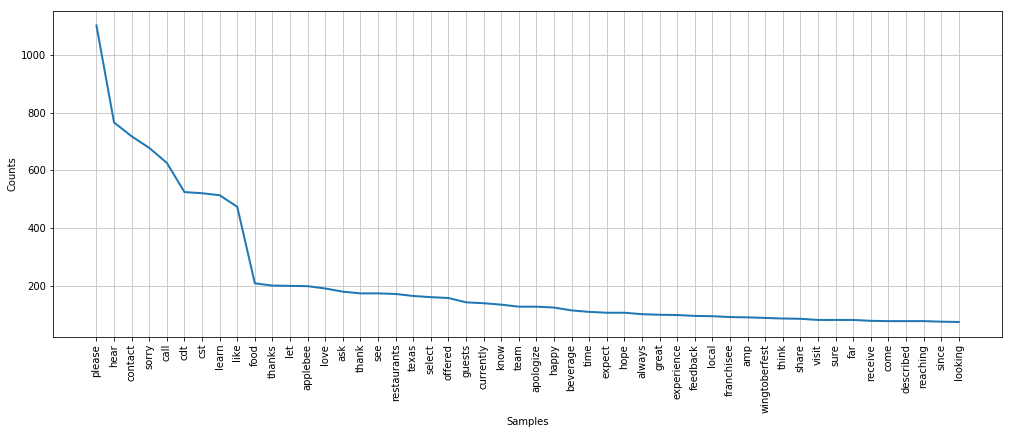

In [40]:
plt.figure(figsize=(17,6))
fdist.plot(50)

In [41]:
applebees_bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(applebees_bigrams)
fdist_bi

FreqDist({})

In [42]:
fdist_bi.most_common(50)

[]

In [ ]:
plt.figure(figsize=(20,6))
fdist_bi.plot(50)

In [52]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

d = path.dirname("data/")

# Read the whole text.
text = open(path.join(d, 'applebees_only_words.csv')).read()

stopwords = set(STOPWORDS)
stopwords.add("would")
stopwords.add("https")


# read the mask image
apple_mask = np.array(Image.open(path.join(d, "cs.jpg")))

wc = WordCloud(background_color="white", max_words=2000, mask=apple_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# show
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

plt.figure()
plt.imshow(apple_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("data/appleonly.png")
plt.savefig("data/appleonly.pdf")

IOError: [Errno 2] No such file or directory: 'data\\applebees_only_words.csv'

# Sentiment Analysis using Bing Liu Lexicon

In [4]:
# import packages
from pattern.en import sentiment
import csv
import pandas as pd

import re

import nltk
from nltk.corpus import stopwords

In [54]:
# load data
review = []
openfile = open('data/applebees_words.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [55]:
# Delete barket in review
review = [x for y in review for x in y]
print review[:3]

['cleaned_words', 'TheOnion Lindsey Graham Dining Alone Applebee Kind Wishes Protesters Would Come Heckle Him https NzHk8762ot https RaxqZhqI0E', 'TheOnion Lindsey Graham Dining Alone Applebee Kind Wishes Protesters Would Come Heckle Him https NzHk8762ot https RaxqZhqI0E']


In [56]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
#wordnet_lemmatizer = WordNetLemmatizer()
#tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens = (word for word in tokens if word not in stopwords.words('english'))

more_stopwords = set(('get','every','yes','https','take','try','via'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

In [57]:
bing = [[word for word in document.lower().split() ] for document in tokens]

In [58]:
# Reading Bing Liu Lexicon
positive_words = open("positive-words.txt", "rb").read().splitlines()
negative_words = open("negative-words.txt", "rb").read().splitlines()

IOError: [Errno 2] No such file or directory: 'positive-words.txt'

In [ ]:
positive_review = []
negative_review = []
neutral_review = []

for sentence in bing:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)

In [ ]:
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

In [ ]:
pos = [x for y in positive_review for x in y]
nes = [x for y in negative_review for x in y]

# Positive Words Frequency Analysis based on Bing Liu

In [ ]:
fdist_pos = nltk.FreqDist(pos)
fdist_pos

In [ ]:
plt.figure(figsize=(12,6))
fdist_pos.plot(50)

# Negative Words Frequency Analysis based on Bing Liu

In [ ]:
fdist_neg = nltk.FreqDist(nes)
fdist

In [ ]:
plt.figure(figsize=(12,6))
fdist_neg.plot(50)

# Sentiment Analysis using Pattern Lexicon

In [118]:
from pattern.en import sentiment
import csv
import pandas as pd

import re

import nltk
from nltk.corpus import stopwords

In [119]:
# load data
review = []
openfile = open('data/applebees_words.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [120]:
# Delete barket in review
review = [x for y in review for x in y]
print review[:3]

['documents', 'not too late support the cheerleaders pancake breakfast the event tomorrow morning from the white marsh  tickets are available the door', 'lindsey graham dining alone  kind wishes protesters would come heckle him']


In [121]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
#wordnet_lemmatizer = WordNetLemmatizer()
#tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens = (word for word in tokens if word not in stopwords.words('english'))

more_stopwords = set(('let','think','even','need','really','come','always','like','got','want','good','know','day','night','would','going','eating','went','told','get','every','yes','https','take','try','via'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

In [122]:
len(review)

31795

In [145]:
type(review)

list

In [123]:
positive_review = []
negative_review = []
neutral_review = []

for row in review:  
    score = sentiment(row)
    if score[0] > 0:
        positive_review.append(row)
    elif score[0] == 0:
        neutral_review.append(row)
    else:
        negative_review.append(row)

In [124]:
print len(positive_review)
print len(negative_review)
print len(neutral_review)

11296
6470
14029


## Above results confirm that the sum of positve,negative, and neutral rewiews is 13208 which is the same nubmer from len(reveiw).

In [125]:
# remove all urls
documents = [re.sub(r"http\S+", '', document) for document in positive_review] 
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in documents]
# tokenize
texts = [document.lower().split() for document in documents]
# remove common words 
stoplist = stopwords.words('english')
more_stopwords = set(('let','think','even','need','really','come','always','like','got','want','good','know','day','night','would','going','eating','went','told','get','every','yes','https','take','try','via'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [126]:
# remove extra brackets)
cleaned_positive_review_tokens = [x for y in texts for x in y]
cleaned_positive_review_tokens[:10]

['late',
 'support',
 'cheerleaders',
 'pancake',
 'breakfast',
 'event',
 'tomorrow',
 'morning',
 'white',
 'marsh']

# Postive Reviews Word Frequency Analysis using Pattern Lexicon

In [127]:
# word frequency
from collections import Counter

positive_review_wordcounts= Counter(cleaned_positive_review_tokens)
positive_review_wordcounts.most_common(25)

[('good', 1045),
 ('like', 1002),
 ('free', 959),
 ('lol', 777),
 ('get', 776),
 ('veterans', 644),
 ('love', 634),
 ('day', 616),
 ('really', 602),
 ('one', 557),
 ('food', 557),
 ('zombie', 541),
 ('ihop', 535),
 ('time', 531),
 ('new', 528),
 ('bar', 514),
 ('win', 508),
 ('eat', 498),
 ('wings', 496),
 ('drinks', 483),
 ('drink', 479),
 ('got', 468),
 ('know', 464),
 ('would', 435),
 ('right', 415)]

In [128]:
# save the word frequency in dataframe (Excel like)
positivereview_wordfreq = pd.DataFrame(positive_review_wordcounts.most_common())
positivereview_wordfreq.head(25)

0     1
0   good      1045
1   like      1002
2   free      959 
3   lol       777 
4   get       776 
5   veterans  644 
6   love      634 
7   day       616 
8   really    602 
9   one       557 
10  food      557 
11  zombie    541 
12  ihop      535 
13  time      531 
14  new       528 
15  bar       514 
16  win       508 
17  eat       498 
18  wings     496 
19  drinks    483 
20  drink     479 
21  got       468 
22  know      464 
23  would     435 
24  right     415

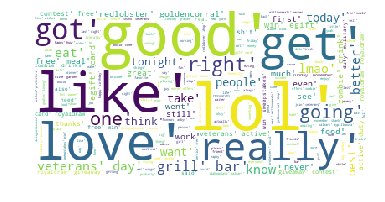

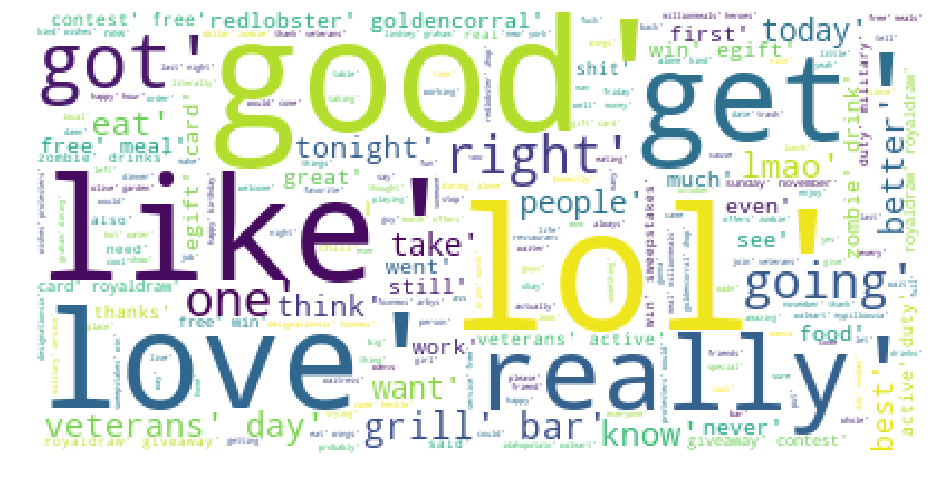

In [92]:
# This process could be very slow for a large corpus

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_positive_review_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/patternpos.png")
plt.savefig("data/patternpos.pdf")

# Negative Reviews Word Frequency Analysis using Pattern Lexicon

In [63]:
# remove all urls
documents = [re.sub(r"http\S+", '', document) for document in negative_review] 
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in documents]
# tokenize
texts = [document.lower().split() for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [64]:
# remove extra brackets)
cleaned_negative_review_tokens = [x for y in texts for x in y]
cleaned_negative_review_tokens[:10]

['grill',
 'bar',
 'yelp',
 'hate',
 'times',
 'every',
 'time',
 'service',
 'slow',
 'whoever']

In [65]:
# word frequency
from collections import Counter

negative_review_wordcounts= Counter(cleaned_negative_review_tokens)
negative_review_wordcounts.most_common(25)

[('people', 800),
 ('black', 782),
 ('tip', 690),
 ('waitress', 680),
 ('like', 583),
 ('get', 554),
 ('customers', 539),
 ('told', 420),
 ('drunk', 404),
 ('shit', 400),
 ('fuck', 363),
 ('wings', 359),
 ('got', 333),
 ('chicken', 295),
 ('eat', 285),
 ('bad', 269),
 ('one', 264),
 ('ihop', 243),
 ('via', 240),
 ('fucking', 235),
 ('food', 234),
 ('going', 229),
 ('night', 225),
 ('drinks', 222),
 ('want', 219)]

In [66]:
# save the word frequency in dataframe (Excel like)
negativereview_wordfreq = pd.DataFrame(negative_review_wordcounts.most_common())
negativereview_wordfreq.head(25)

0    1
0   people     800
1   black      782
2   tip        690
3   waitress   680
4   like       583
5   get        554
6   customers  539
7   told       420
8   drunk      404
9   shit       400
10  fuck       363
11  wings      359
12  got        333
13  chicken    295
14  eat        285
15  bad        269
16  one        264
17  ihop       243
18  via        240
19  fucking    235
20  food       234
21  going      229
22  night      225
23  drinks     222
24  want       219

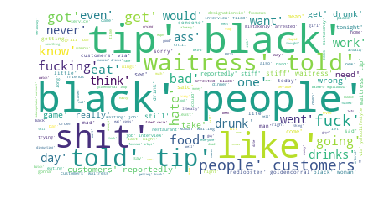

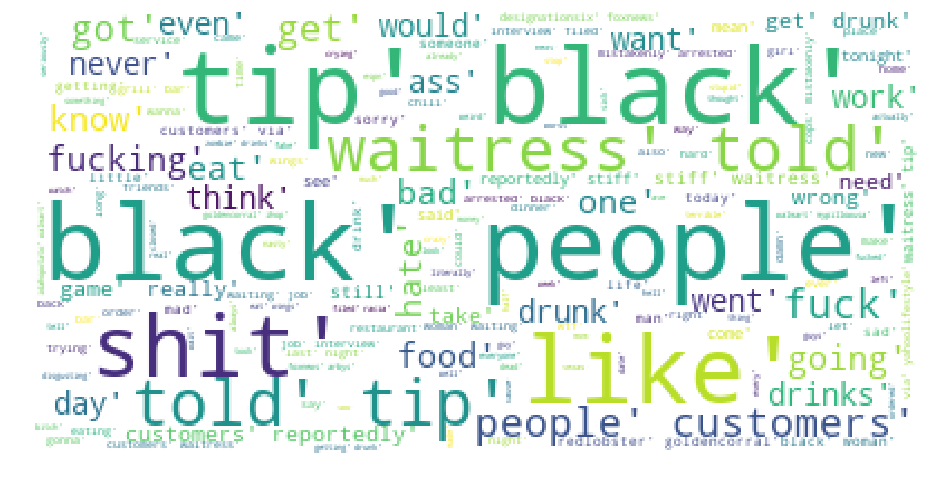

In [67]:
# This process could be very slow for a large corpus

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_negative_review_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/patternneg.png")
plt.savefig("data/patternneg.pdf")

# sentiment.vader

In [15]:
# load data
review = []
openfile = open('applebees_words.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [27]:
for i in review[:2]:
    print i

['documents']
['not too late support the cheerleaders pancake breakfast the event tomorrow morning from the white marsh  tickets are available the door']


In [35]:
#Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid = SIA()
    
sent = []
for r in review[1:]:
    #sentiment = []
    #aspect ratings based on sentiment
    #for s in r:
    ss = sid.polarity_scores(r[0])
    sent.append(ss['compound'])
    #ratings_sentiment.append(sentiment)
    
sent[:5]

[-0.015, 0.2732, 0.3612, -0.6597, 0.0258]

In [36]:
len(sent)

31794

In [37]:
len(review[1:])

31794

In [38]:
d = zip(review[1:], sent)
for i in d[:5]:
    print i

(['not too late support the cheerleaders pancake breakfast the event tomorrow morning from the white marsh  tickets are available the door'], -0.015)
(['lindsey graham dining alone  kind wishes protesters would come heckle him'], 0.2732)
(['jaypharoah you ready hit  with for those apps when are you coming milwaukee'], 0.3612)
(['kasie this even sadder cuz ate alone  yesterday'], -0.6597)
(['still have  name tag reminder that matter what doing where life takes will never work the food industry again'], 0.0258)


In [40]:
for i in d[:5]:
    print i[0], i[1]

['not too late support the cheerleaders pancake breakfast the event tomorrow morning from the white marsh  tickets are available the door'] -0.015
['lindsey graham dining alone  kind wishes protesters would come heckle him'] 0.2732
['jaypharoah you ready hit  with for those apps when are you coming milwaukee'] 0.3612
['kasie this even sadder cuz ate alone  yesterday'] -0.6597
['still have  name tag reminder that matter what doing where life takes will never work the food industry again'] 0.0258


In [41]:
positive_review = []
negative_review = []
neutral_review = []

for row in d:  
    #score = sentiment(row)
    if row[1] > 0:
        positive_review.append(row)
    elif row[1] == 0:
        neutral_review.append(row)
    else:
        negative_review.append(row)

In [42]:
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

12727
7792
11275


In [43]:
for i in positive_review[:2]:
    print i

(['lindsey graham dining alone  kind wishes protesters would come heckle him'], 0.2732)
(['jaypharoah you ready hit  with for those apps when are you coming milwaukee'], 0.3612)


In [45]:
posenti = pd.DataFrame(positive_review)
posenti.to_csv("data/posenti_before.csv")

In [46]:
negsenti = pd.DataFrame(negative_review)
negsenti.to_csv("data/negsenti_before.csv")

In [99]:
# load data
review = []
openfile = open('data/posenti_before.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [100]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
#wordnet_lemmatizer = WordNetLemmatizer()
#tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens = (word for word in tokens if word not in stopwords.words('english'))

more_stopwords = set(('one','see','say','today','come','even','get','got','like','going','good','saying','never','still','really','back','would','every','yes','https','take','try','via'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

In [101]:
applebees_bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(applebees_bigrams)
fdist_bi

FreqDist({('grill', 'bar'): 409, ('veterans', 'day'): 290, ('gender', 'reveal'): 284, ('redlobster', 'goldencorral'): 274, ('reveal', 'party'): 273, ('gift', 'card'): 266, ('free', 'meal'): 239, ('party', 'ends'): 212, ('egift', 'card'): 194, ('win', 'egift'): 193, ...})

In [102]:
fdist_bi.most_common(50)

[(('grill', 'bar'), 409),
 (('veterans', 'day'), 290),
 (('gender', 'reveal'), 284),
 (('redlobster', 'goldencorral'), 274),
 (('reveal', 'party'), 273),
 (('gift', 'card'), 266),
 (('free', 'meal'), 239),
 (('party', 'ends'), 212),
 (('egift', 'card'), 194),
 (('win', 'egift'), 193),
 (('veterans', 'active'), 184),
 (('active', 'duty'), 183),
 (('ends', 'fight'), 183),
 (('walmart', 'mypillowusa'), 180),
 (('contest', 'free'), 177),
 (('giveaway', 'contest'), 176),
 (('royaldraw', 'royaldraw'), 176),
 (('win', 'sweepstakes'), 176),
 (('free', 'win'), 176),
 (('royaldraw', 'giveaway'), 176),
 (('card', 'royaldraw'), 176),
 (('duty', 'military'), 175),
 (('designationsix', 'foxnews'), 162),
 (('food', 'beverage'), 162),
 (('sunday', 'november'), 162),
 (('zombie', 'drinks'), 160),
 (('day', 'sunday'), 157),
 (('thank', 'veterans'), 157),
 (('military', 'service'), 155),
 (('service', 'free'), 151),
 (('november', 'thank'), 148),
 (('join', 'veterans'), 144),
 (('idahopotato', 'walmart')

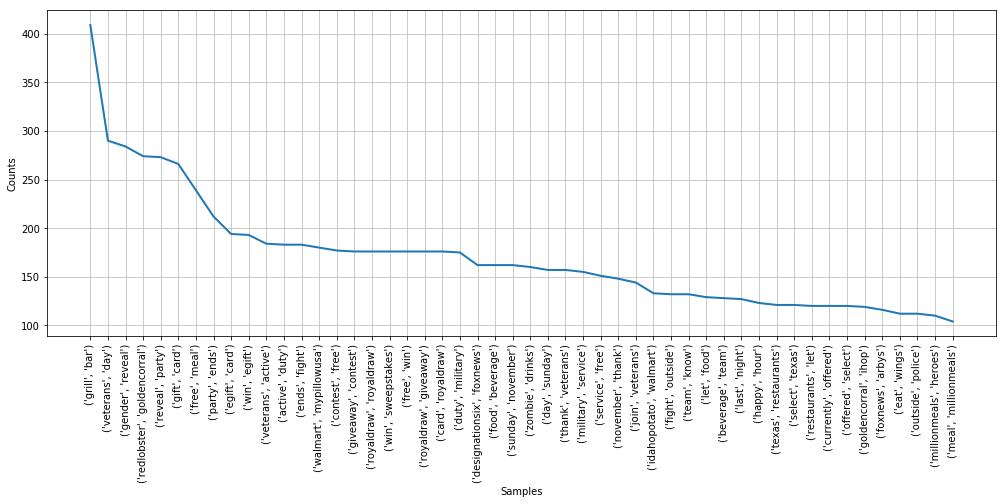

In [103]:
plt.figure(figsize=(17,6))
fdist_bi.plot(50)

In [104]:
# load data
review = []
openfile = open('data/posenti_before.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [105]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
#wordnet_lemmatizer = WordNetLemmatizer()
#tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens = (word for word in tokens if word not in stopwords.words('english'))

more_stopwords = set(('one','see','say','today','come','even','get','got','like','going','good','saying','never','still','really','back','would','every','yes','https','take','try','via'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

In [106]:
# Word frequency analysis
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'free': 971, 'want': 927, 'lol': 674, 'veterans': 667, 'love': 646, 'food': 636, 'day': 617, 'know': 596, 'bar': 590, 'ihop': 575, ...})

In [107]:
fdist.most_common(50)

[('free', 971),
 ('want', 927),
 ('lol', 674),
 ('veterans', 667),
 ('love', 646),
 ('food', 636),
 ('day', 617),
 ('know', 596),
 ('bar', 590),
 ('ihop', 575),
 ('eat', 569),
 ('card', 508),
 ('win', 506),
 ('drinks', 506),
 ('time', 483),
 ('wings', 480),
 ('zombie', 439),
 ('grill', 430),
 ('thank', 401),
 ('mcdonalds', 400),
 ('night', 394),
 ('happy', 388),
 ('drink', 386),
 ('redlobster', 382),
 ('people', 375),
 ('party', 375),
 ('meal', 359),
 ('designationsix', 357),
 ('better', 354),
 ('royaldraw', 352),
 ('gift', 351),
 ('let', 343),
 ('best', 340),
 ('goldencorral', 334),
 ('local', 334),
 ('foxnews', 326),
 ('walmart', 322),
 ('tonight', 317),
 ('lmao', 307),
 ('gender', 295),
 ('dinner', 292),
 ('reveal', 288),
 ('sunday', 284),
 ('friends', 272),
 ('great', 269),
 ('new', 269),
 ('restaurant', 268),
 ('restaurants', 263),
 ('went', 255),
 ('eating', 250)]

In [108]:
# load data
review = []
openfile = open('data/negsenti_before.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [109]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
#wordnet_lemmatizer = WordNetLemmatizer()
#tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens = (word for word in tokens if word not in stopwords.words('english'))

more_stopwords = set(('one','see','say','today','come','even','get','got','like','going','good','saying','never','still','really','back','would','every','yes','https','take','try','via'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

In [110]:
applebees_bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(applebees_bigrams)
fdist_bi

FreqDist({('redlobster', 'goldencorral'): 260, ('designationsix', 'foxnews'): 195, ('stress', 'eaters'): 188, ('eaters', 'paying'): 181, ('betting', 'stress'): 159, ('walmart', 'mypillowusa'): 143, ('idahopotato', 'walmart'): 135, ('foxnews', 'arbys'): 135, ('racist', 'note'): 126, ('goldencorral', 'ihop'): 124, ...})

In [111]:
fdist_bi.most_common(50)

[(('redlobster', 'goldencorral'), 260),
 (('designationsix', 'foxnews'), 195),
 (('stress', 'eaters'), 188),
 (('eaters', 'paying'), 181),
 (('betting', 'stress'), 159),
 (('walmart', 'mypillowusa'), 143),
 (('idahopotato', 'walmart'), 135),
 (('foxnews', 'arbys'), 135),
 (('racist', 'note'), 126),
 (('goldencorral', 'ihop'), 124),
 (('black', 'people'), 121),
 (('tip', 'black'), 115),
 (('fox', 'news'), 105),
 (('black', 'woman'), 104),
 (('note', 'napkin'), 100),
 (('instead', 'tip'), 99),
 (('job', 'interview'), 99),
 (('waiting', 'job'), 95),
 (('mcdonalds', 'longjohnslvrs'), 95),
 (('redlobster', 'ihop'), 95),
 (('rubytuesday', 'omahasteaks'), 95),
 (('mistakenly', 'arrested'), 93),
 (('woman', 'waiting'), 90),
 (('cops', 'mistakenly'), 90),
 (('arrested', 'black'), 89),
 (('last', 'night'), 83),
 (('interview', 'filed'), 82),
 (('ihop', 'mcdonalds'), 78),
 (('arbys', 'ihop'), 77),
 (('always', 'tampax'), 76),
 (('rubytuesday', 'mcdonalds'), 76),
 (('proctergamble', 'always'), 75)

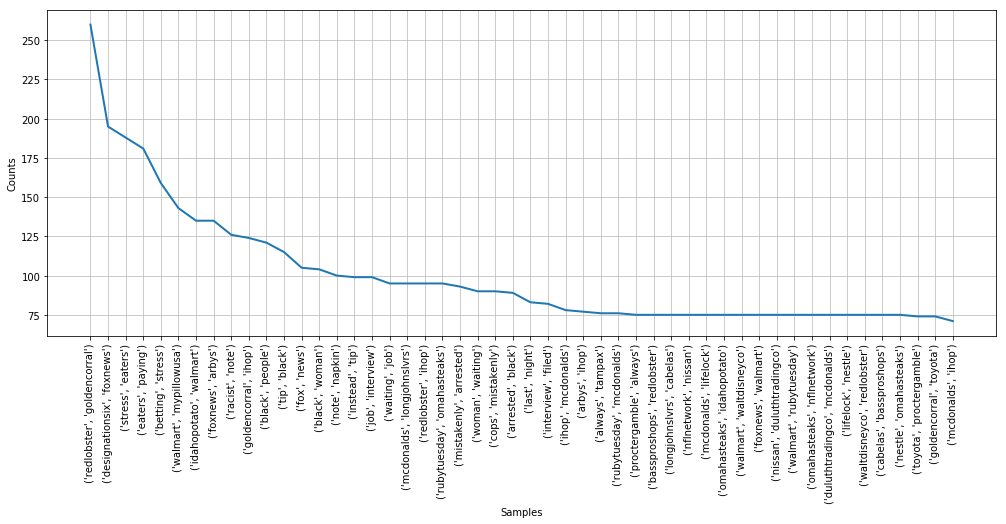

In [112]:
plt.figure(figsize=(17,6))
fdist_bi.plot(50)

In [113]:
# load data
review = []
openfile = open('data/negsenti_before.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [114]:
tokens = str(review)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
#wordnet_lemmatizer = WordNetLemmatizer()
#tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens = (word for word in tokens if word not in stopwords.words('english'))

more_stopwords = set(('one','see','say','today','come','even','get','got','like','going','good','saying','never','still','really','back','would','every','yes','https','take','try','via'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
tokens = (word for word in tokens if len(word) >= 3)

In [115]:
# Word frequency analysis
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'ihop': 523, 'shit': 495, 'mcdonalds': 399, 'ass': 390, 'fuck': 378, 'redlobster': 376, 'designationsix': 368, 'wings': 365, 'people': 351, 'drunk': 346, ...})

In [116]:
fdist.most_common(50)

[('ihop', 523),
 ('shit', 495),
 ('mcdonalds', 399),
 ('ass', 390),
 ('fuck', 378),
 ('redlobster', 376),
 ('designationsix', 368),
 ('wings', 365),
 ('people', 351),
 ('drunk', 346),
 ('foxnews', 334),
 ('food', 331),
 ('eat', 318),
 ('walmart', 309),
 ('waitress', 297),
 ('goldencorral', 297),
 ('tip', 289),
 ('time', 273),
 ('know', 257),
 ('bad', 256),
 ('black', 252),
 ('night', 246),
 ('drinks', 241),
 ('rubytuesday', 240),
 ('damn', 229),
 ('want', 225),
 ('arbys', 214),
 ('racist', 201),
 ('note', 200),
 ('stress', 199),
 ('paying', 197),
 ('stop', 196),
 ('think', 190),
 ('eaters', 190),
 ('hate', 187),
 ('went', 184),
 ('news', 183),
 ('bar', 180),
 ('eating', 179),
 ('always', 174),
 ('nestle', 172),
 ('drink', 170),
 ('omahasteaks', 170),
 ('zombie', 170),
 ('idahopotato', 169),
 ('bitch', 167),
 ('customers', 164),
 ('last', 163),
 ('betting', 159),
 ('mypillowusa', 158)]

# How Many Theames are in Posit vs negative teweet before promotion

In [47]:
import csv
import pandas as pd

# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

C:\Users\hyunghwa\Anaconda2\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [48]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [51]:
texts = []
r = csv.reader(open('data/posenti_before _text.csv', 'rb'))
for i in r:
    texts.append(i)  
len(texts)

12727

In [52]:
texts = [x for y in texts for x in y]
texts[:5]

["['lindsey graham dining alone  kind wishes protesters would come heckle him']",
 "['jaypharoah you ready hit  with for those apps when are you coming milwaukee']",
 "['still have  name tag reminder that matter what doing where life takes will never work the food industry again']",
 "['lindsey graham dining alone  kind wishes protesters would come heckle him']",
 "['made killah katey fall love when took her date  only the best for babe']"]

In [53]:
#first two rows
texts[0:2]

["['lindsey graham dining alone  kind wishes protesters would come heckle him']",
 "['jaypharoah you ready hit  with for those apps when are you coming milwaukee']"]

In [54]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]

# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]

#porter_stemmer = PorterStemmer()
#texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]

#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [55]:
# this is text processing required for topic modeling with Gensim

## Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary.save('data/gop.dict')  # store the dictionary, for future reference

len(dictionary)

2018-12-03 18:41:08,664 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-03 18:41:09,073 : INFO : adding document #10000 to Dictionary(14232 unique tokens: [u'raining', u'upsetti', u'finessed', u'cussed', u'goodfood']...)
2018-12-03 18:41:09,209 : INFO : built Dictionary(16770 unique tokens: [u'raining', u'missgato', u'upsetti', u'finessed', u'cussed']...) from 12727 documents (total 126538 corpus positions)
2018-12-03 18:41:09,213 : INFO : saving Dictionary object under data/gop.dict, separately None
2018-12-03 18:41:09,247 : INFO : saved data/gop.dict


16770

In [56]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=5, no_above=0.5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

2018-12-03 18:41:18,216 : INFO : discarding 13960 tokens: [(u'jaypharoah', 2), (u'milwaukee', 3), (u'katey', 1), (u'killah', 1), (u'mamarita', 1), (u'njspanolios', 1), (u'parakeetpolitic', 1), (u'resnick', 1), (u'discounted', 2), (u'erwin', 2)]...
2018-12-03 18:41:18,219 : INFO : keeping 2810 tokens which were in no less than 5 and no more than 6363 (=50.0%) documents
2018-12-03 18:41:18,230 : INFO : resulting dictionary: Dictionary(2810 unique tokens: [u'limited', u'personally', u'dynamic', u'thehill', u'four']...)


2810

In [57]:
# convert words to vetors or integers
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('data/gop.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

2018-12-03 18:41:31,463 : INFO : storing corpus in Matrix Market format to data/gop.mm
2018-12-03 18:41:31,480 : INFO : saving sparse matrix to data/gop.mm
2018-12-03 18:41:31,483 : INFO : PROGRESS: saving document #0
2018-12-03 18:41:31,545 : INFO : PROGRESS: saving document #1000
2018-12-03 18:41:31,624 : INFO : PROGRESS: saving document #2000
2018-12-03 18:41:31,684 : INFO : PROGRESS: saving document #3000
2018-12-03 18:41:31,753 : INFO : PROGRESS: saving document #4000
2018-12-03 18:41:31,819 : INFO : PROGRESS: saving document #5000
2018-12-03 18:41:31,894 : INFO : PROGRESS: saving document #6000
2018-12-03 18:41:31,971 : INFO : PROGRESS: saving document #7000
2018-12-03 18:41:32,042 : INFO : PROGRESS: saving document #8000
2018-12-03 18:41:32,117 : INFO : PROGRESS: saving document #9000
2018-12-03 18:41:32,181 : INFO : PROGRESS: saving document #10000
2018-12-03 18:41:32,265 : INFO : PROGRESS: saving document #11000
2018-12-03 18:41:32,329 : INFO : PROGRESS: saving document #12000

12727

In [58]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2810
Number of documents: 12727


In [59]:
# later you can retrive the saved dict and corpus
# https://radimrehurek.com/gensim/tut1.html

saved_dict = dictionary.load('data/gop.dict')

#for i in saved_dict.token2id.iteritems():
#    print i

2018-12-03 18:41:54,927 : INFO : loading Dictionary object from data/gop.dict
2018-12-03 18:41:54,944 : INFO : loaded data/gop.dict


In [60]:
# you can retrieve the saved corpus

corpus_saved = corpora.MmCorpus('data/gop.mm')

2018-12-03 18:42:03,732 : INFO : loaded corpus index from data/gop.mm.index
2018-12-03 18:42:03,736 : INFO : initializing cython corpus reader from data/gop.mm
2018-12-03 18:42:03,740 : INFO : accepted corpus with 12727 documents, 2810 features, 102366 non-zero entries


In [61]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, passes=20, eval_every = 1)

2018-12-03 18:42:13,292 : INFO : using symmetric alpha at 0.0666666666667
2018-12-03 18:42:13,296 : INFO : using symmetric eta at 0.0666666666667
2018-12-03 18:42:13,299 : INFO : using serial LDA version on this node
2018-12-03 18:42:13,312 : INFO : running online (multi-pass) LDA training, 15 topics, 20 passes over the supplied corpus of 12727 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 50x with a convergence threshold of 0.001000
2018-12-03 18:42:14,740 : INFO : -9.525 per-word bound, 736.8 perplexity estimate based on a held-out corpus of 2000 documents with 16647 words
2018-12-03 18:42:14,743 : INFO : PROGRESS: pass 0, at document #2000/12727
2018-12-03 18:42:15,848 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:42:15,855 : INFO : topic #13 (0.067): 0.031*"like" + 0.027*"come" + 0.025*"happy" + 0.015*"wish" + 0.015*"love" + 0.014*"dining" + 0.014*"alone" + 0.013*"know" + 0.013

2018-12-03 18:42:24,617 : INFO : topic #3 (0.067): 0.070*"like" + 0.057*"food" + 0.055*"know" + 0.030*"let" + 0.029*"restaurant" + 0.026*"would" + 0.025*"see" + 0.017*"local" + 0.012*"team" + 0.011*"lol"
2018-12-03 18:42:24,631 : INFO : topic #5 (0.067): 0.028*"drink" + 0.023*"good" + 0.023*"like" + 0.021*"get" + 0.014*"thing" + 0.013*"lmao" + 0.011*"said" + 0.011*"right" + 0.011*"god" + 0.011*"way"
2018-12-03 18:42:24,648 : INFO : topic #14 (0.067): 0.018*"would" + 0.018*"like" + 0.016*"lol" + 0.014*"wish" + 0.012*"kind" + 0.012*"get" + 0.011*"idea" + 0.011*"glad" + 0.011*"drink" + 0.011*"little"
2018-12-03 18:42:24,664 : INFO : topic #4 (0.067): 0.055*"good" + 0.029*"service" + 0.026*"like" + 0.020*"playing" + 0.018*"thank" + 0.016*"time" + 0.015*"life" + 0.014*"lmao" + 0.012*"eat" + 0.012*"pretty"
2018-12-03 18:42:24,678 : INFO : topic diff=0.315725, rho=0.408248
2018-12-03 18:42:25,038 : INFO : -7.383 per-word bound, 167.0 perplexity estimate based on a held-out corpus of 727 docum

2018-12-03 18:42:32,388 : INFO : PROGRESS: pass 1, at document #10000/12727
2018-12-03 18:42:33,002 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:42:33,013 : INFO : topic #7 (0.067): 0.095*"card" + 0.062*"gift" + 0.053*"party" + 0.042*"reveal" + 0.034*"gender" + 0.033*"royaldraw" + 0.033*"giveaway" + 0.029*"sweepstakes" + 0.026*"free" + 0.022*"outside"
2018-12-03 18:42:33,016 : INFO : topic #14 (0.067): 0.037*"would" + 0.031*"wish" + 0.022*"come" + 0.020*"kind" + 0.018*"dining" + 0.018*"alone" + 0.017*"like" + 0.015*"server" + 0.013*"doe" + 0.013*"get"
2018-12-03 18:42:33,019 : INFO : topic #0 (0.067): 0.032*"eating" + 0.024*"restaurant" + 0.018*"family" + 0.016*"check" + 0.016*"people" + 0.013*"waitress" + 0.012*"white" + 0.012*"local" + 0.011*"location" + 0.011*"business"
2018-12-03 18:42:33,020 : INFO : topic #3 (0.067): 0.079*"like" + 0.067*"know" + 0.047*"food" + 0.040*"restaurant" + 0.039*"let" + 0.034*"see" + 0.028*"local" + 0.026*"wo

2018-12-03 18:42:39,210 : INFO : topic #11 (0.067): 0.069*"veteran" + 0.055*"free" + 0.052*"day" + 0.043*"meal" + 0.032*"thank" + 0.024*"sunday" + 0.024*"night" + 0.022*"join" + 0.015*"active" + 0.013*"last"
2018-12-03 18:42:39,216 : INFO : topic diff=0.250542, rho=0.333333
2018-12-03 18:42:40,358 : INFO : -7.351 per-word bound, 163.3 perplexity estimate based on a held-out corpus of 2000 documents with 16994 words
2018-12-03 18:42:40,368 : INFO : PROGRESS: pass 2, at document #8000/12727
2018-12-03 18:42:41,153 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:42:41,165 : INFO : topic #7 (0.067): 0.089*"card" + 0.070*"party" + 0.058*"reveal" + 0.055*"royaldraw" + 0.053*"gender" + 0.044*"giveaway" + 0.043*"gift" + 0.040*"sweepstakes" + 0.030*"outside" + 0.029*"egift"
2018-12-03 18:42:41,168 : INFO : topic #0 (0.067): 0.030*"eating" + 0.022*"people" + 0.022*"restaurant" + 0.022*"family" + 0.016*"white" + 0.015*"check" + 0.015*"baby" + 0.012*"loca

2018-12-03 18:42:47,785 : INFO : topic #10 (0.067): 0.152*"want" + 0.044*"duty" + 0.016*"really" + 0.014*"special" + 0.011*"need" + 0.010*"school" + 0.010*"high" + 0.009*"stick" + 0.009*"take" + 0.009*"unlimited"
2018-12-03 18:42:47,788 : INFO : topic #6 (0.067): 0.086*"bar" + 0.067*"grill" + 0.049*"service" + 0.029*"dinner" + 0.029*"hero" + 0.026*"great" + 0.022*"breakfast" + 0.020*"lunch" + 0.016*"pancake" + 0.016*"tomorrow"
2018-12-03 18:42:47,790 : INFO : topic #12 (0.067): 0.056*"say" + 0.054*"walmart" + 0.027*"thanks" + 0.024*"end" + 0.023*"nissan" + 0.016*"night" + 0.014*"mom" + 0.013*"person" + 0.013*"fight" + 0.013*"world"
2018-12-03 18:42:47,792 : INFO : topic diff=0.128096, rho=0.316228
2018-12-03 18:42:48,700 : INFO : -7.029 per-word bound, 130.6 perplexity estimate based on a held-out corpus of 2000 documents with 17197 words
2018-12-03 18:42:48,703 : INFO : PROGRESS: pass 3, at document #6000/12727
2018-12-03 18:42:49,111 : INFO : merging changes from 2000 documents into 

2018-12-03 18:42:54,394 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:42:54,404 : INFO : topic #10 (0.067): 0.156*"want" + 0.068*"duty" + 0.017*"really" + 0.013*"need" + 0.012*"forget" + 0.011*"special" + 0.011*"school" + 0.010*"take" + 0.010*"high" + 0.010*"stick"
2018-12-03 18:42:54,407 : INFO : topic #13 (0.067): 0.073*"love" + 0.068*"military" + 0.062*"happy" + 0.034*"hour" + 0.024*"birthday" + 0.019*"please" + 0.017*"come" + 0.016*"job" + 0.014*"get" + 0.012*"year"
2018-12-03 18:42:54,410 : INFO : topic #0 (0.067): 0.042*"eating" + 0.027*"restaurant" + 0.023*"people" + 0.022*"family" + 0.017*"serve" + 0.015*"check" + 0.015*"white" + 0.014*"location" + 0.013*"business" + 0.013*"local"
2018-12-03 18:42:54,411 : INFO : topic #11 (0.067): 0.124*"veteran" + 0.093*"free" + 0.075*"day" + 0.069*"meal" + 0.051*"thank" + 0.037*"sunday" + 0.032*"active" + 0.031*"join" + 0.019*"millionmeals" + 0.015*"night"
2018-12-03 18:42:54,414 : INFO : topic #8

2018-12-03 18:43:02,549 : INFO : topic #11 (0.067): 0.095*"veteran" + 0.076*"free" + 0.070*"day" + 0.064*"meal" + 0.042*"thank" + 0.038*"sunday" + 0.029*"join" + 0.026*"active" + 0.020*"night" + 0.015*"last"
2018-12-03 18:43:02,552 : INFO : topic diff=0.087165, rho=0.301511
2018-12-03 18:43:02,921 : INFO : -6.967 per-word bound, 125.1 perplexity estimate based on a held-out corpus of 727 documents with 6428 words
2018-12-03 18:43:02,923 : INFO : PROGRESS: pass 4, at document #12727/12727
2018-12-03 18:43:03,114 : INFO : merging changes from 727 documents into a model of 12727 documents
2018-12-03 18:43:03,125 : INFO : topic #8 (0.067): 0.082*"ihop" + 0.046*"mcdonalds" + 0.044*"redlobster" + 0.040*"designationsix" + 0.040*"goldencorral" + 0.037*"foxnews" + 0.031*"arbys" + 0.028*"starbucks" + 0.028*"rubytuesday" + 0.020*"nestle"
2018-12-03 18:43:03,128 : INFO : topic #2 (0.067): 0.033*"ever" + 0.027*"feel" + 0.022*"first" + 0.022*"half" + 0.021*"tip" + 0.020*"date" + 0.019*"played" + 0.0

2018-12-03 18:43:09,601 : INFO : topic #4 (0.067): 0.103*"good" + 0.045*"like" + 0.022*"life" + 0.021*"playing" + 0.019*"chicken" + 0.015*"really" + 0.015*"love" + 0.014*"sound" + 0.013*"garden" + 0.013*"pretty"
2018-12-03 18:43:09,605 : INFO : topic #1 (0.067): 0.069*"drink" + 0.065*"lol" + 0.056*"wing" + 0.040*"zombie" + 0.028*"eat" + 0.020*"november" + 0.018*"halloween" + 0.018*"better" + 0.018*"buffalo" + 0.016*"dollar"
2018-12-03 18:43:09,608 : INFO : topic #14 (0.067): 0.059*"would" + 0.037*"wish" + 0.030*"come" + 0.025*"kind" + 0.023*"server" + 0.021*"dining" + 0.021*"alone" + 0.016*"well" + 0.016*"like" + 0.014*"doe"
2018-12-03 18:43:09,611 : INFO : topic diff=0.086666, rho=0.288675
2018-12-03 18:43:10,311 : INFO : -7.338 per-word bound, 161.8 perplexity estimate based on a held-out corpus of 2000 documents with 16097 words
2018-12-03 18:43:10,313 : INFO : PROGRESS: pass 5, at document #12000/12727
2018-12-03 18:43:10,924 : INFO : merging changes from 2000 documents into a mode

2018-12-03 18:43:18,089 : INFO : topic #6 (0.067): 0.086*"bar" + 0.062*"grill" + 0.041*"dinner" + 0.033*"service" + 0.029*"great" + 0.028*"breakfast" + 0.024*"lunch" + 0.023*"support" + 0.020*"tomorrow" + 0.019*"pancake"
2018-12-03 18:43:18,092 : INFO : topic #3 (0.067): 0.095*"like" + 0.088*"know" + 0.060*"restaurant" + 0.055*"food" + 0.051*"let" + 0.046*"see" + 0.038*"local" + 0.026*"texas" + 0.024*"would" + 0.023*"beverage"
2018-12-03 18:43:18,095 : INFO : topic #8 (0.067): 0.064*"ihop" + 0.052*"mcdonalds" + 0.051*"redlobster" + 0.048*"designationsix" + 0.046*"goldencorral" + 0.040*"foxnews" + 0.031*"idahopotato" + 0.030*"mypillowusa" + 0.028*"arbys" + 0.027*"nestle"
2018-12-03 18:43:18,098 : INFO : topic #14 (0.067): 0.060*"would" + 0.038*"wish" + 0.032*"come" + 0.031*"kind" + 0.025*"alone" + 0.024*"dining" + 0.022*"server" + 0.017*"well" + 0.016*"lindsey" + 0.016*"graham"
2018-12-03 18:43:18,101 : INFO : topic #7 (0.067): 0.088*"card" + 0.071*"royaldraw" + 0.071*"party" + 0.057*"g

2018-12-03 18:43:23,279 : INFO : topic #11 (0.067): 0.116*"veteran" + 0.095*"free" + 0.080*"day" + 0.069*"meal" + 0.052*"thank" + 0.036*"sunday" + 0.032*"join" + 0.030*"active" + 0.017*"millionmeals" + 0.013*"today"
2018-12-03 18:43:23,280 : INFO : topic diff=0.075975, rho=0.267261
2018-12-03 18:43:24,055 : INFO : -6.944 per-word bound, 123.1 perplexity estimate based on a held-out corpus of 2000 documents with 17197 words
2018-12-03 18:43:24,056 : INFO : PROGRESS: pass 7, at document #6000/12727
2018-12-03 18:43:24,539 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:43:24,572 : INFO : topic #12 (0.067): 0.085*"end" + 0.081*"say" + 0.057*"walmart" + 0.036*"fight" + 0.030*"ohio" + 0.025*"thanks" + 0.023*"night" + 0.018*"last" + 0.017*"mom" + 0.012*"nissan"
2018-12-03 18:43:24,575 : INFO : topic #7 (0.067): 0.081*"card" + 0.079*"party" + 0.075*"royaldraw" + 0.069*"gender" + 0.067*"reveal" + 0.042*"giveaway" + 0.041*"egift" + 0.040*"outside" + 0.

2018-12-03 18:43:32,188 : INFO : topic #12 (0.067): 0.064*"say" + 0.035*"walmart" + 0.034*"end" + 0.031*"thanks" + 0.029*"night" + 0.023*"last" + 0.020*"mom" + 0.015*"world" + 0.014*"top" + 0.013*"fight"
2018-12-03 18:43:32,191 : INFO : topic #3 (0.067): 0.086*"like" + 0.081*"know" + 0.059*"restaurant" + 0.055*"food" + 0.050*"let" + 0.049*"see" + 0.043*"local" + 0.036*"texas" + 0.029*"beverage" + 0.026*"team"
2018-12-03 18:43:32,194 : INFO : topic #5 (0.067): 0.048*"like" + 0.026*"get" + 0.026*"lmao" + 0.021*"got" + 0.017*"friend" + 0.016*"one" + 0.015*"going" + 0.015*"much" + 0.015*"work" + 0.015*"someone"
2018-12-03 18:43:32,197 : INFO : topic diff=0.133537, rho=0.258199
2018-12-03 18:43:33,244 : INFO : -7.178 per-word bound, 144.8 perplexity estimate based on a held-out corpus of 2000 documents with 16575 words
2018-12-03 18:43:33,247 : INFO : PROGRESS: pass 8, at document #4000/12727
2018-12-03 18:43:33,694 : INFO : merging changes from 2000 documents into a model of 12727 document

2018-12-03 18:43:38,887 : INFO : merging changes from 727 documents into a model of 12727 documents
2018-12-03 18:43:38,898 : INFO : topic #13 (0.067): 0.079*"love" + 0.079*"military" + 0.058*"happy" + 0.029*"hour" + 0.023*"birthday" + 0.017*"job" + 0.016*"please" + 0.015*"old" + 0.015*"year" + 0.014*"get"
2018-12-03 18:43:38,901 : INFO : topic #11 (0.067): 0.147*"veteran" + 0.112*"free" + 0.089*"day" + 0.080*"meal" + 0.057*"thank" + 0.044*"sunday" + 0.039*"active" + 0.037*"join" + 0.022*"millionmeals" + 0.014*"today"
2018-12-03 18:43:38,904 : INFO : topic #2 (0.067): 0.031*"ever" + 0.027*"date" + 0.025*"feel" + 0.025*"first" + 0.021*"best" + 0.020*"half" + 0.020*"tip" + 0.019*"contest" + 0.019*"waitress" + 0.018*"game"
2018-12-03 18:43:38,907 : INFO : topic #6 (0.067): 0.090*"bar" + 0.073*"service" + 0.070*"grill" + 0.046*"hero" + 0.036*"dinner" + 0.027*"lunch" + 0.025*"great" + 0.023*"breakfast" + 0.020*"tomorrow" + 0.019*"support"
2018-12-03 18:43:38,910 : INFO : topic #9 (0.067): 0

2018-12-03 18:43:46,065 : INFO : topic #2 (0.067): 0.032*"contest" + 0.028*"ever" + 0.023*"feel" + 0.022*"date" + 0.021*"first" + 0.021*"waitress" + 0.021*"best" + 0.020*"game" + 0.019*"tip" + 0.019*"half"
2018-12-03 18:43:46,068 : INFO : topic diff=0.063904, rho=0.250000
2018-12-03 18:43:46,930 : INFO : -7.314 per-word bound, 159.1 perplexity estimate based on a held-out corpus of 2000 documents with 16097 words
2018-12-03 18:43:46,936 : INFO : PROGRESS: pass 9, at document #12000/12727
2018-12-03 18:43:47,709 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:43:47,721 : INFO : topic #0 (0.067): 0.042*"eating" + 0.024*"restaurant" + 0.023*"family" + 0.019*"serve" + 0.016*"since" + 0.016*"check" + 0.015*"million" + 0.014*"white" + 0.014*"baby" + 0.013*"people"
2018-12-03 18:43:47,726 : INFO : topic #3 (0.067): 0.092*"like" + 0.086*"know" + 0.055*"food" + 0.050*"restaurant" + 0.045*"let" + 0.043*"see" + 0.030*"local" + 0.023*"would" + 0.018*"texa

2018-12-03 18:43:53,088 : INFO : topic #4 (0.067): 0.111*"good" + 0.044*"like" + 0.022*"life" + 0.020*"playing" + 0.017*"chicken" + 0.015*"really" + 0.015*"sound" + 0.014*"pasta" + 0.014*"garden" + 0.014*"pretty"
2018-12-03 18:43:53,092 : INFO : topic #11 (0.067): 0.088*"veteran" + 0.086*"free" + 0.077*"day" + 0.060*"meal" + 0.048*"thank" + 0.032*"sunday" + 0.031*"join" + 0.023*"active" + 0.013*"millionmeals" + 0.013*"today"
2018-12-03 18:43:53,094 : INFO : topic #12 (0.067): 0.080*"walmart" + 0.072*"say" + 0.066*"end" + 0.036*"night" + 0.028*"last" + 0.026*"thanks" + 0.022*"ohio" + 0.017*"mom" + 0.011*"world" + 0.011*"play"
2018-12-03 18:43:53,095 : INFO : topic diff=0.069409, rho=0.242536
2018-12-03 18:43:53,798 : INFO : -7.485 per-word bound, 179.1 perplexity estimate based on a held-out corpus of 2000 documents with 16481 words
2018-12-03 18:43:53,801 : INFO : PROGRESS: pass 10, at document #10000/12727
2018-12-03 18:43:54,234 : INFO : merging changes from 2000 documents into a mod

2018-12-03 18:44:00,176 : INFO : topic #12 (0.067): 0.082*"end" + 0.080*"say" + 0.057*"walmart" + 0.038*"night" + 0.029*"last" + 0.028*"ohio" + 0.026*"thanks" + 0.018*"mom" + 0.012*"nissan" + 0.010*"play"
2018-12-03 18:44:00,178 : INFO : topic #8 (0.067): 0.068*"ihop" + 0.049*"mcdonalds" + 0.048*"redlobster" + 0.045*"foxnews" + 0.044*"designationsix" + 0.039*"goldencorral" + 0.032*"mypillowusa" + 0.029*"tide" + 0.025*"rubytuesday" + 0.021*"allstate"
2018-12-03 18:44:00,180 : INFO : topic #3 (0.067): 0.090*"like" + 0.086*"know" + 0.057*"restaurant" + 0.056*"food" + 0.052*"see" + 0.051*"let" + 0.039*"local" + 0.030*"texas" + 0.026*"beverage" + 0.026*"would"
2018-12-03 18:44:00,184 : INFO : topic #1 (0.067): 0.088*"drink" + 0.069*"lol" + 0.053*"zombie" + 0.051*"wing" + 0.030*"eat" + 0.024*"november" + 0.023*"dollar" + 0.018*"month" + 0.016*"october" + 0.015*"halloween"
2018-12-03 18:44:00,187 : INFO : topic #5 (0.067): 0.048*"like" + 0.027*"get" + 0.024*"lmao" + 0.019*"got" + 0.017*"frien

2018-12-03 18:44:06,533 : INFO : topic diff=0.116824, rho=0.229416
2018-12-03 18:44:07,213 : INFO : -7.169 per-word bound, 143.9 perplexity estimate based on a held-out corpus of 2000 documents with 16575 words
2018-12-03 18:44:07,216 : INFO : PROGRESS: pass 12, at document #4000/12727
2018-12-03 18:44:07,618 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:44:07,638 : INFO : topic #13 (0.067): 0.085*"love" + 0.056*"happy" + 0.047*"military" + 0.034*"hour" + 0.024*"birthday" + 0.019*"please" + 0.018*"job" + 0.016*"old" + 0.016*"get" + 0.013*"year"
2018-12-03 18:44:07,644 : INFO : topic #2 (0.067): 0.029*"tip" + 0.028*"ever" + 0.026*"waitress" + 0.026*"date" + 0.023*"black" + 0.023*"people" + 0.022*"feel" + 0.021*"first" + 0.020*"best" + 0.019*"customer"
2018-12-03 18:44:07,647 : INFO : topic #10 (0.067): 0.165*"want" + 0.050*"duty" + 0.020*"really" + 0.016*"special" + 0.012*"need" + 0.012*"high" + 0.011*"school" + 0.011*"eat" + 0.010*"stick" + 

2018-12-03 18:44:12,993 : INFO : topic #0 (0.067): 0.044*"eating" + 0.027*"family" + 0.027*"restaurant" + 0.019*"serve" + 0.016*"white" + 0.015*"check" + 0.015*"full" + 0.014*"local" + 0.013*"since" + 0.013*"one"
2018-12-03 18:44:12,999 : INFO : topic #14 (0.067): 0.059*"would" + 0.033*"wish" + 0.027*"kind" + 0.026*"come" + 0.025*"server" + 0.022*"well" + 0.021*"thought" + 0.020*"dining" + 0.017*"alone" + 0.017*"little"
2018-12-03 18:44:13,002 : INFO : topic diff=0.089131, rho=0.229416
2018-12-03 18:44:13,661 : INFO : -6.618 per-word bound, 98.2 perplexity estimate based on a held-out corpus of 2000 documents with 16647 words
2018-12-03 18:44:13,664 : INFO : PROGRESS: pass 13, at document #2000/12727
2018-12-03 18:44:14,059 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:44:14,084 : INFO : topic #0 (0.067): 0.043*"eating" + 0.027*"restaurant" + 0.024*"family" + 0.017*"serve" + 0.016*"white" + 0.016*"check" + 0.015*"since" + 0.015*"local" + 0.0

2018-12-03 18:44:21,683 : INFO : topic #7 (0.067): 0.097*"card" + 0.065*"gift" + 0.058*"party" + 0.050*"royaldraw" + 0.041*"gender" + 0.040*"reveal" + 0.035*"fight" + 0.031*"free" + 0.031*"giveaway" + 0.028*"egift"
2018-12-03 18:44:21,686 : INFO : topic #12 (0.067): 0.064*"say" + 0.053*"walmart" + 0.049*"night" + 0.046*"end" + 0.038*"last" + 0.028*"thanks" + 0.018*"mom" + 0.015*"ohio" + 0.013*"top" + 0.012*"world"
2018-12-03 18:44:21,688 : INFO : topic #11 (0.067): 0.109*"veteran" + 0.091*"free" + 0.083*"day" + 0.072*"meal" + 0.048*"thank" + 0.042*"sunday" + 0.033*"join" + 0.029*"active" + 0.016*"millionmeals" + 0.016*"next"
2018-12-03 18:44:21,691 : INFO : topic #8 (0.067): 0.077*"ihop" + 0.050*"mcdonalds" + 0.047*"redlobster" + 0.044*"designationsix" + 0.043*"goldencorral" + 0.040*"foxnews" + 0.031*"arbys" + 0.030*"rubytuesday" + 0.022*"mypillowusa" + 0.022*"idahopotato"
2018-12-03 18:44:21,694 : INFO : topic diff=0.054842, rho=0.223607
2018-12-03 18:44:21,957 : INFO : -6.919 per-wor

2018-12-03 18:44:27,309 : INFO : PROGRESS: pass 14, at document #10000/12727
2018-12-03 18:44:27,904 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:44:27,917 : INFO : topic #7 (0.067): 0.095*"card" + 0.065*"party" + 0.060*"gift" + 0.058*"royaldraw" + 0.048*"gender" + 0.046*"reveal" + 0.039*"fight" + 0.035*"giveaway" + 0.033*"free" + 0.032*"egift"
2018-12-03 18:44:27,921 : INFO : topic #9 (0.067): 0.126*"win" + 0.042*"year" + 0.039*"lot" + 0.033*"long" + 0.031*"time" + 0.029*"hit" + 0.021*"heinzuk" + 0.020*"margarita" + 0.020*"free" + 0.018*"dip"
2018-12-03 18:44:27,924 : INFO : topic #10 (0.067): 0.168*"want" + 0.029*"duty" + 0.023*"police" + 0.020*"really" + 0.015*"special" + 0.012*"need" + 0.012*"use" + 0.012*"tonight" + 0.012*"high" + 0.012*"school"
2018-12-03 18:44:27,927 : INFO : topic #2 (0.067): 0.031*"contest" + 0.028*"ever" + 0.024*"best" + 0.024*"waitress" + 0.023*"date" + 0.022*"feel" + 0.022*"first" + 0.022*"game" + 0.020*"people"

2018-12-03 18:44:34,092 : INFO : topic #7 (0.067): 0.082*"card" + 0.075*"party" + 0.070*"royaldraw" + 0.064*"gender" + 0.062*"reveal" + 0.051*"fight" + 0.041*"gift" + 0.040*"giveaway" + 0.039*"outside" + 0.038*"egift"
2018-12-03 18:44:34,095 : INFO : topic diff=0.107395, rho=0.213201
2018-12-03 18:44:34,982 : INFO : -7.249 per-word bound, 152.1 perplexity estimate based on a held-out corpus of 2000 documents with 16994 words
2018-12-03 18:44:34,990 : INFO : PROGRESS: pass 15, at document #8000/12727
2018-12-03 18:44:35,558 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:44:35,569 : INFO : topic #9 (0.067): 0.144*"win" + 0.042*"year" + 0.039*"lot" + 0.033*"long" + 0.032*"time" + 0.028*"hit" + 0.025*"heinzuk" + 0.021*"free" + 0.019*"margarita" + 0.017*"food"
2018-12-03 18:44:35,572 : INFO : topic #8 (0.067): 0.066*"ihop" + 0.051*"mcdonalds" + 0.050*"redlobster" + 0.047*"designationsix" + 0.045*"goldencorral" + 0.040*"foxnews" + 0.030*"mypillowus

2018-12-03 18:44:40,815 : INFO : topic #13 (0.067): 0.085*"love" + 0.056*"happy" + 0.047*"military" + 0.034*"hour" + 0.024*"birthday" + 0.018*"job" + 0.018*"please" + 0.016*"old" + 0.016*"get" + 0.013*"year"
2018-12-03 18:44:40,818 : INFO : topic #0 (0.067): 0.045*"eating" + 0.026*"restaurant" + 0.023*"family" + 0.018*"white" + 0.016*"check" + 0.016*"since" + 0.015*"serve" + 0.015*"people" + 0.014*"one" + 0.013*"local"
2018-12-03 18:44:40,819 : INFO : topic #7 (0.067): 0.097*"card" + 0.072*"gift" + 0.047*"party" + 0.032*"royaldraw" + 0.028*"free" + 0.027*"gender" + 0.026*"reveal" + 0.026*"giveaway" + 0.026*"fight" + 0.021*"outside"
2018-12-03 18:44:40,822 : INFO : topic diff=0.053002, rho=0.208514
2018-12-03 18:44:41,441 : INFO : -6.879 per-word bound, 117.7 perplexity estimate based on a held-out corpus of 2000 documents with 17197 words
2018-12-03 18:44:41,447 : INFO : PROGRESS: pass 16, at document #6000/12727
2018-12-03 18:44:41,864 : INFO : merging changes from 2000 documents into

2018-12-03 18:44:47,224 : INFO : topic #10 (0.067): 0.165*"want" + 0.065*"duty" + 0.021*"really" + 0.014*"special" + 0.013*"police" + 0.013*"need" + 0.012*"forget" + 0.012*"school" + 0.011*"high" + 0.011*"take"
2018-12-03 18:44:47,229 : INFO : topic #14 (0.067): 0.065*"would" + 0.045*"wish" + 0.041*"come" + 0.041*"kind" + 0.036*"alone" + 0.036*"dining" + 0.027*"lindsey" + 0.027*"heckle" + 0.026*"graham" + 0.026*"protester"
2018-12-03 18:44:47,232 : INFO : topic #13 (0.067): 0.081*"love" + 0.060*"military" + 0.059*"happy" + 0.032*"hour" + 0.024*"birthday" + 0.018*"please" + 0.017*"job" + 0.016*"get" + 0.016*"old" + 0.014*"year"
2018-12-03 18:44:47,237 : INFO : topic #11 (0.067): 0.135*"veteran" + 0.107*"free" + 0.089*"day" + 0.077*"meal" + 0.056*"thank" + 0.041*"sunday" + 0.036*"join" + 0.035*"active" + 0.020*"millionmeals" + 0.014*"today"
2018-12-03 18:44:47,240 : INFO : topic #1 (0.067): 0.081*"drink" + 0.065*"lol" + 0.059*"wing" + 0.046*"zombie" + 0.038*"november" + 0.032*"eat" + 0.0

2018-12-03 18:44:53,608 : INFO : topic diff=0.049669, rho=0.204124
2018-12-03 18:44:53,832 : INFO : -6.914 per-word bound, 120.6 perplexity estimate based on a held-out corpus of 727 documents with 6428 words
2018-12-03 18:44:53,835 : INFO : PROGRESS: pass 17, at document #12727/12727
2018-12-03 18:44:53,993 : INFO : merging changes from 727 documents into a model of 12727 documents
2018-12-03 18:44:54,003 : INFO : topic #13 (0.067): 0.080*"love" + 0.071*"military" + 0.057*"happy" + 0.030*"hour" + 0.024*"birthday" + 0.017*"job" + 0.016*"old" + 0.016*"get" + 0.016*"please" + 0.014*"year"
2018-12-03 18:44:54,006 : INFO : topic #8 (0.067): 0.078*"ihop" + 0.047*"mcdonalds" + 0.045*"redlobster" + 0.042*"designationsix" + 0.041*"goldencorral" + 0.038*"foxnews" + 0.029*"arbys" + 0.028*"rubytuesday" + 0.022*"starbucks" + 0.022*"mypillowusa"
2018-12-03 18:44:54,009 : INFO : topic #10 (0.067): 0.158*"want" + 0.077*"duty" + 0.020*"really" + 0.015*"police" + 0.013*"special" + 0.013*"forget" + 0.01

2018-12-03 18:44:59,638 : INFO : topic #6 (0.067): 0.089*"bar" + 0.063*"grill" + 0.042*"dinner" + 0.035*"service" + 0.028*"breakfast" + 0.026*"great" + 0.024*"lunch" + 0.023*"support" + 0.022*"pancake" + 0.020*"hero"
2018-12-03 18:44:59,641 : INFO : topic #4 (0.067): 0.111*"good" + 0.044*"like" + 0.021*"playing" + 0.021*"life" + 0.019*"chicken" + 0.015*"really" + 0.015*"pretty" + 0.014*"food" + 0.014*"sound" + 0.014*"pasta"
2018-12-03 18:44:59,644 : INFO : topic diff=0.046251, rho=0.200000
2018-12-03 18:45:00,769 : INFO : -7.292 per-word bound, 156.8 perplexity estimate based on a held-out corpus of 2000 documents with 16097 words
2018-12-03 18:45:00,772 : INFO : PROGRESS: pass 18, at document #12000/12727
2018-12-03 18:45:01,180 : INFO : merging changes from 2000 documents into a model of 12727 documents
2018-12-03 18:45:01,190 : INFO : topic #13 (0.067): 0.081*"love" + 0.053*"happy" + 0.040*"military" + 0.030*"hour" + 0.028*"birthday" + 0.018*"old" + 0.017*"job" + 0.016*"please" + 0.

2018-12-03 18:45:08,043 : INFO : topic #1 (0.067): 0.097*"drink" + 0.070*"lol" + 0.051*"zombie" + 0.047*"wing" + 0.028*"eat" + 0.022*"november" + 0.022*"dollar" + 0.016*"month" + 0.016*"halloween" + 0.015*"get"
2018-12-03 18:45:08,046 : INFO : topic #6 (0.067): 0.089*"bar" + 0.066*"grill" + 0.046*"dinner" + 0.040*"service" + 0.028*"breakfast" + 0.027*"great" + 0.025*"lunch" + 0.023*"support" + 0.022*"hero" + 0.021*"tomorrow"
2018-12-03 18:45:08,049 : INFO : topic #8 (0.067): 0.066*"ihop" + 0.051*"mcdonalds" + 0.050*"redlobster" + 0.046*"designationsix" + 0.044*"goldencorral" + 0.040*"foxnews" + 0.029*"mypillowusa" + 0.029*"idahopotato" + 0.027*"arbys" + 0.026*"rubytuesday"
2018-12-03 18:45:08,051 : INFO : topic #0 (0.067): 0.039*"eating" + 0.025*"restaurant" + 0.024*"family" + 0.018*"white" + 0.016*"since" + 0.016*"check" + 0.016*"baby" + 0.015*"full" + 0.015*"people" + 0.013*"local"
2018-12-03 18:45:08,055 : INFO : topic diff=0.054384, rho=0.196116
2018-12-03 18:45:08,871 : INFO : -7.

Review topic diff at the end of the process log (e.g., topic diff=0.051459). close to zero means that the model is converged; thus, this indicates we should set the number of "passes" higher (e.g., 30)

In [62]:
model.save('data/lda.model') # same for tfidf, lda, ...
#model = models.LdaModel.load('data/lda.model')

#https://stackoverflow.com/questions/17354417/gensim-how-to-save-lda-models-produced-topics-to-a-readable-format-csv-txt-et

2018-12-03 18:45:11,180 : INFO : saving LdaState object under data/lda.model.state, separately None
2018-12-03 18:45:11,194 : INFO : saved data/lda.model.state
2018-12-03 18:45:11,210 : INFO : saving LdaModel object under data/lda.model, separately ['expElogbeta', 'sstats']
2018-12-03 18:45:11,211 : INFO : not storing attribute id2word
2018-12-03 18:45:11,216 : INFO : storing np array 'expElogbeta' to data/lda.model.expElogbeta.npy
2018-12-03 18:45:11,223 : INFO : not storing attribute state
2018-12-03 18:45:11,226 : INFO : not storing attribute dispatcher
2018-12-03 18:45:11,232 : INFO : saved data/lda.model


# Prints the topics - 15 Topic with positive before promotion.

In [63]:
model.show_topics(num_topics=15)
#show_topics(num_topics=10, num_words=10, log=False, formatted=True)

#Topic-Term Distribution Output

[(0,
  u'0.043*"eating" + 0.027*"restaurant" + 0.026*"family" + 0.018*"serve" + 0.016*"white" + 0.016*"full" + 0.015*"check" + 0.015*"local" + 0.014*"one" + 0.014*"people"'),
 (1,
  u'0.075*"drink" + 0.070*"lol" + 0.052*"wing" + 0.052*"november" + 0.032*"zombie" + 0.026*"eat" + 0.017*"buffalo" + 0.016*"dollar" + 0.016*"get" + 0.015*"better"'),
 (2,
  u'0.030*"date" + 0.029*"ever" + 0.029*"best" + 0.025*"first" + 0.023*"feel" + 0.022*"waitress" + 0.021*"game" + 0.021*"contest" + 0.019*"tip" + 0.019*"half"'),
 (3,
  u'0.090*"like" + 0.081*"know" + 0.056*"restaurant" + 0.052*"food" + 0.044*"let" + 0.043*"see" + 0.031*"local" + 0.024*"vet" + 0.024*"would" + 0.021*"texas"'),
 (4,
  u'0.107*"good" + 0.046*"like" + 0.022*"playing" + 0.021*"life" + 0.019*"chicken" + 0.015*"food" + 0.015*"pretty" + 0.015*"sound" + 0.014*"really" + 0.013*"right"'),
 (5,
  u'0.051*"like" + 0.026*"get" + 0.025*"lmao" + 0.019*"got" + 0.018*"friend" + 0.016*"going" + 0.016*"guy" + 0.015*"much" + 0.015*"one" + 0.015*

In [64]:
# Prints the topics.
for top in model.show_topics(num_topics=20):
  print top
print

(0, u'0.043*"eating" + 0.027*"restaurant" + 0.026*"family" + 0.018*"serve" + 0.016*"white" + 0.016*"full" + 0.015*"check" + 0.015*"local" + 0.014*"one" + 0.014*"people"')
(1, u'0.075*"drink" + 0.070*"lol" + 0.052*"wing" + 0.052*"november" + 0.032*"zombie" + 0.026*"eat" + 0.017*"buffalo" + 0.016*"dollar" + 0.016*"get" + 0.015*"better"')
(2, u'0.030*"date" + 0.029*"ever" + 0.029*"best" + 0.025*"first" + 0.023*"feel" + 0.022*"waitress" + 0.021*"game" + 0.021*"contest" + 0.019*"tip" + 0.019*"half"')
(3, u'0.090*"like" + 0.081*"know" + 0.056*"restaurant" + 0.052*"food" + 0.044*"let" + 0.043*"see" + 0.031*"local" + 0.024*"vet" + 0.024*"would" + 0.021*"texas"')
(4, u'0.107*"good" + 0.046*"like" + 0.022*"playing" + 0.021*"life" + 0.019*"chicken" + 0.015*"food" + 0.015*"pretty" + 0.015*"sound" + 0.014*"really" + 0.013*"right"')
(5, u'0.051*"like" + 0.026*"get" + 0.025*"lmao" + 0.019*"got" + 0.018*"friend" + 0.016*"going" + 0.016*"guy" + 0.015*"much" + 0.015*"one" + 0.015*"someone"')
(6, u'0.091

In [65]:
# print words without probability
for i in range(0,15):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])

eating, restaurant, family, serve, white, full, check, local, one, people
drink, lol, wing, november, zombie, eat, buffalo, dollar, get, better
date, ever, best, first, feel, waitress, game, contest, tip, half
like, know, restaurant, food, let, see, local, vet, would, texas
good, like, playing, life, chicken, food, pretty, sound, really, right
like, get, lmao, got, friend, going, guy, much, one, someone
bar, grill, service, hero, dinner, lunch, great, breakfast, tomorrow, support
card, gift, party, royaldraw, gender, reveal, fight, free, giveaway, outside
ihop, mcdonalds, redlobster, designationsix, goldencorral, foxnews, arbys, rubytuesday, mypillowusa, starbucks
win, year, lot, long, time, hit, margarita, parking, food, get
want, duty, really, police, special, forget, school, need, high, steak
veteran, free, day, meal, thank, sunday, active, join, millionmeals, today
say, night, walmart, last, end, thanks, mom, world, top, ohio
love, military, happy, hour, birthday, job, old, get, pl

In [66]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    print i
    results.append(i)
print 

[(14, 0.91515154)]
[(0, 0.21333332), (1, 0.013333334), (2, 0.41333312), (3, 0.01333335), (4, 0.013333334), (5, 0.013333338), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.21333332), (10, 0.013333334), (11, 0.013333334), (12, 0.013333363), (13, 0.013333467), (14, 0.013333334)]
[(3, 0.14411993), (4, 0.23580284), (5, 0.347), (6, 0.088888876), (10, 0.12863274)]
[(14, 0.91515154)]
[(0, 0.13333331), (2, 0.25833333), (7, 0.13333331), (11, 0.13333333), (13, 0.2583332)]
[(0, 0.43809512), (9, 0.1523809), (14, 0.2952381)]
[(7, 0.8666667)]
[(2, 0.08205119), (8, 0.08205127), (14, 0.77435905)]
[(14, 0.91515154)]
[(5, 0.15238094), (13, 0.72380954)]
[(1, 0.43929613), (2, 0.124410935), (13, 0.22962962), (14, 0.12518175)]
[(0, 0.08204268), (2, 0.16957438), (3, 0.13969329), (4, 0.22151367), (5, 0.13871284), (12, 0.07512978), (13, 0.13777778)]
[(14, 0.91515154)]
[(0, 0.20393315), (4, 0.096969694), (11, 0.6263698)]
[(0, 0.20399208), (4, 0.0969697), (11, 0.6263109)]
[(0, 0.033333335), (1, 0.03

[(14, 0.91515154)]
[(0, 0.38969937), (2, 0.1307622), (5, 0.10711172), (9, 0.10915083), (13, 0.2077203)]
[(0, 0.56939906), (5, 0.30679134)]
[(14, 0.91515154)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333376), (3, 0.013333334), (4, 0.013333375), (5, 0.013333334), (6, 0.013333334), (7, 0.21333325), (8, 0.013333334), (9, 0.013333334), (10, 0.61333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333377), (14, 0.013333334)]
[(0, 0.087088145), (4, 0.076190464), (10, 0.77957857)]
[(1, 0.15049902), (2, 0.18755217), (4, 0.13692191), (7, 0.20666663), (10, 0.16235954), (12, 0.09600069)]
[(3, 0.10666667), (5, 0.5390143), (13, 0.27431905)]
[(9, 0.89629626)]
[(14, 0.91515154)]
[(11, 0.8666667)]
[(0, 0.15238094), (2, 0.29523808), (9, 0.15238097), (10, 0.15238094), (14, 0.15238093)]
[(14, 0.91515154)]
[(0, 0.116917945), (3, 0.06151898), (5, 0.37364036), (6, 0.05580796), (10, 0.15333334), (14, 0.20878145)]
[(0, 0.013333431), (1, 0.81333315), (2, 0.013333342), (3, 0.013333333), (4, 0.01333334),

[(1, 0.43809518), (4, 0.29523808), (14, 0.15238096)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.53333336), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(2, 0.22319043), (9, 0.38921538), (13, 0.23759411), (14, 0.08888889)]
[(0, 0.011111111), (1, 0.011111256), (2, 0.011111111), (3, 0.011111111), (4, 0.011111331), (5, 0.17777771), (6, 0.011111111), (7, 0.011111111), (8, 0.011111111), (9, 0.011111111), (10, 0.51111007), (11, 0.011111207), (12, 0.0111115975), (13, 0.011111226), (14, 0.17777783)]
[(0, 0.013333352), (1, 0.013333363), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.41333333), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333337), (12, 0.01333334), (13, 0.41333333), (14, 0.013333334)]
[(0, 0.20313613), (2, 0.28138393), (3, 0.25833708), (1

[(9, 0.91515154)]
[(1, 0.22501063), (2, 0.060119297), (3, 0.045337006), (4, 0.36618197), (10, 0.11269322), (11, 0.1201823), (12, 0.048253298)]
[(1, 0.14537512), (3, 0.11262291), (8, 0.2355252), (9, 0.118518524), (13, 0.20277292), (14, 0.1185185)]
[(5, 0.90666664)]
[(0, 0.013333333), (1, 0.013333333), (2, 0.013333333), (3, 0.013333358), (4, 0.19025707), (5, 0.013333333), (6, 0.013333333), (7, 0.21333335), (8, 0.013333333), (9, 0.013333333), (10, 0.013333333), (11, 0.23640959), (12, 0.013333333), (13, 0.013333333), (14, 0.2133333)]
[(0, 0.016666668), (1, 0.26666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.26666665), (7, 0.016666668), (8, 0.016666684), (9, 0.016666668), (10, 0.016666668), (11, 0.26666668), (12, 0.016666668), (13, 0.016666682), (14, 0.016666668)]
[(0, 0.022222223), (1, 0.022222253), (2, 0.6888886), (3, 0.022222223), (4, 0.022222223), (5, 0.02222234), (6, 0.022222271), (7, 0.022222223), (8, 0.022222223), (9, 0.022222267), (10, 0.022222

[(0, 0.2629684), (2, 0.5165187), (3, 0.08205124), (12, 0.082051285)]
[(0, 0.011111111), (1, 0.33993998), (2, 0.011111149), (3, 0.011111141), (4, 0.29053697), (5, 0.23618954), (6, 0.011111111), (7, 0.011111111), (8, 0.011111111), (9, 0.011111111), (10, 0.011111148), (11, 0.011111111), (12, 0.011111119), (13, 0.011111123), (14, 0.011111111)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.5333333), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.016666668), (1, 0.26666668), (2, 0.016666686), (3, 0.016666668), (4, 0.016666668), (5, 0.26666665), (6, 0.26666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.011111111), (1, 0.011111111), (2, 0.2555751), (3, 0.011111111), (4, 0.41302648), (5, 0.011111137), (6, 0

[(0, 0.18387084), (2, 0.32593054), (4, 0.39019856)]
[(3, 0.945098)]
[(0, 0.011111111), (1, 0.31071976), (2, 0.011111111), (3, 0.011111122), (4, 0.5448356), (5, 0.011111132), (6, 0.011111111), (7, 0.011111126), (8, 0.011111114), (9, 0.011111124), (10, 0.011111114), (11, 0.011111133), (12, 0.011111111), (13, 0.01111113), (14, 0.0111111775)]
[(1, 0.7066666), (3, 0.20666666)]
[(3, 0.94166666)]
[(3, 0.9416666)]
[(0, 0.011111111), (1, 0.84444445), (2, 0.011111125), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.011111113), (7, 0.011111111), (8, 0.011111111), (9, 0.011111114), (10, 0.011111124), (11, 0.011111111), (12, 0.011111111), (13, 0.011111111), (14, 0.011111117)]
[(0, 0.016666668), (1, 0.26666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.51666665), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668)]
[(1, 0.11644682), (2, 0.14340897), (3, 0.

[(0, 0.011111113), (1, 0.011111127), (2, 0.011111125), (3, 0.01111111), (4, 0.8444442), (5, 0.01111121), (6, 0.011111113), (7, 0.01111112), (8, 0.011111116), (9, 0.011111127), (10, 0.011111117), (11, 0.011111118), (12, 0.011111112), (13, 0.011111127), (14, 0.0111111235)]
[(0, 0.011111113), (1, 0.011111127), (2, 0.011111125), (3, 0.01111111), (4, 0.8444443), (5, 0.011111153), (6, 0.011111113), (7, 0.01111112), (8, 0.011111116), (9, 0.011111127), (10, 0.011111117), (11, 0.011111118), (12, 0.011111112), (13, 0.011111127), (14, 0.0111111235)]
[(0, 0.016666712), (1, 0.01666673), (2, 0.016666671), (3, 0.016666675), (4, 0.01666676), (5, 0.76666635), (6, 0.016666703), (7, 0.016666668), (8, 0.01666668), (9, 0.016666668), (10, 0.016666671), (11, 0.016666668), (12, 0.016666688), (13, 0.016666673), (14, 0.016666668)]
[(0, 0.013333334), (1, 0.21333334), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.41333333), (7, 0.013333334), (8, 0.013333338), (9, 0.013333334), (10,

[(0, 0.016666697), (1, 0.016666701), (2, 0.016666919), (3, 0.01666667), (4, 0.01666669), (5, 0.76666635), (6, 0.01666667), (7, 0.01666667), (8, 0.01666667), (9, 0.01666667), (10, 0.01666667), (11, 0.01666667), (12, 0.01666667), (13, 0.01666667), (14, 0.01666667)]
[(4, 0.17655279), (5, 0.35562742), (7, 0.21634595), (10, 0.06274509), (11, 0.08561483), (13, 0.06781973)]
[(0, 0.118651494), (2, 0.59468186), (7, 0.10666661), (12, 0.10666666)]
[(3, 0.15238093), (13, 0.7238094)]
[(3, 0.15238091), (13, 0.7238095)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.5333333), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.10877193), (1, 0.09600533), (5, 0.078722775), (6, 0.41343856), (9, 0.0631536), (11, 0.06613506), (13, 0.07788569), (14, 0.07132568)]
[(1, 0.58095235), (9, 0.15238096), (10, 0.15238096)]
[(0, 0.011111111), (1,

[(0, 0.022222223), (1, 0.022222236), (2, 0.022222223), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222258), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.35555553), (12, 0.35555553), (13, 0.022222223), (14, 0.022222223)]
[(4, 0.22915503), (5, 0.5242346), (6, 0.08550254), (13, 0.10872688)]
[(0, 0.016666668), (1, 0.016666671), (2, 0.016666668), (3, 0.45424575), (4, 0.3290876), (5, 0.016666682), (6, 0.016666668), (7, 0.016666668), (8, 0.01666667), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.01666667)]
[(0, 0.013333334), (1, 0.28482124), (2, 0.013333334), (3, 0.013333356), (4, 0.34184536), (5, 0.013333334), (6, 0.013333334), (7, 0.013333353), (8, 0.21333332), (9, 0.013333334), (10, 0.01333334), (11, 0.013333371), (12, 0.013333334), (13, 0.013333334), (14, 0.013333334)]
[(5, 0.40162235), (6, 0.07950219), (9, 0.103127636), (10, 0.12967247), (11, 0.08587571), (14, 0.17162812)]
[(0, 0.

[(0, 0.033333402), (1, 0.5333331), (2, 0.033333372), (3, 0.033333335), (4, 0.033333335), (5, 0.03333346), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.016666668), (1, 0.76666653), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666766), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.01666667)]
[(0, 0.013333333), (1, 0.8133332), (2, 0.013333333), (3, 0.013333333), (4, 0.013333333), (5, 0.013333394), (6, 0.013333333), (7, 0.013333333), (8, 0.013333333), (9, 0.013333333), (10, 0.013333333), (11, 0.013333333), (12, 0.013333333), (13, 0.013333333), (14, 0.013333335)]
[(4, 0.3907213), (9, 0.34261194), (12, 0.15238096)]
[(0, 0.19639671), (2, 0.67027), (11, 0.076190315)]
[(0, 0.013333334), (1, 0.013333348), (2, 0.013333334), (3, 0.013333334), (4,

[(0, 0.945098)]
[(2, 0.12190865), (4, 0.51269996), (5, 0.22649422), (14, 0.08248688)]
[(3, 0.89629626)]
[(3, 0.93777776)]
[(0, 0.013333338), (1, 0.01333342), (2, 0.01333334), (3, 0.013333333), (4, 0.013333338), (5, 0.23614553), (6, 0.013333376), (7, 0.21333332), (8, 0.013333333), (9, 0.39052093), (10, 0.013333333), (11, 0.013333333), (12, 0.013333333), (13, 0.013333337), (14, 0.013333395)]
[(0, 0.013333334), (1, 0.21333332), (2, 0.013333334), (3, 0.21333334), (4, 0.41333327), (5, 0.013333346), (6, 0.013333334), (7, 0.013333334), (8, 0.0133333355), (9, 0.013333334), (10, 0.013333371), (11, 0.013333334), (12, 0.013333334), (13, 0.013333346), (14, 0.013333334)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.35555553), (11, 0.35555553), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(0, 0.26645577), (4, 0.37521076), (11, 0.25833333)]
[(1, 0

[(0, 0.02222226), (1, 0.022222253), (2, 0.022222267), (3, 0.022222294), (4, 0.022222275), (5, 0.6888886), (6, 0.022222223), (7, 0.022222223), (8, 0.022222238), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222226)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.26666647), (6, 0.016666858), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.26666665), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.26666668)]
[(1, 0.60269564), (14, 0.34313765)]
[(0, 0.07232865), (2, 0.30554605), (3, 0.059259262), (5, 0.05285657), (10, 0.13963908), (11, 0.33703703)]
[(2, 0.36717674), (4, 0.3397031), (11, 0.19312008)]
[(4, 0.30650914), (5, 0.40887645), (13, 0.21188693)]
[(0, 0.013333334), (1, 0.4133318), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.21333489), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013

[(1, 0.091430314), (2, 0.09100294), (4, 0.09253164), (5, 0.65287644), (12, 0.045491964)]
[(0, 0.011111111), (1, 0.29416633), (2, 0.17777778), (3, 0.011111111), (4, 0.011111134), (5, 0.011111134), (6, 0.011111122), (7, 0.011111119), (8, 0.011111114), (9, 0.011111125), (10, 0.011111113), (11, 0.20127241), (12, 0.011111111), (13, 0.20456119), (14, 0.011111123)]
[(0, 0.21333334), (1, 0.013333343), (2, 0.013333334), (3, 0.013333334), (4, 0.23102672), (5, 0.013333341), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.39563993), (11, 0.013333334), (12, 0.013333346), (13, 0.01333334), (14, 0.013333334)]
[(1, 0.069610804), (2, 0.071645156), (5, 0.50818276), (9, 0.059259254), (13, 0.2542649)]
[(1, 0.1280522), (4, 0.4480789), (5, 0.3349799)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666694), (3, 0.016666668), (4, 0.016666668), (5, 0.26666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.5166

[(0, 0.013333445), (1, 0.6133322), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.21333428), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333371), (14, 0.0133333355)]
[(5, 0.40602636), (6, 0.0889371), (10, 0.10893778), (12, 0.2516543), (13, 0.088888876)]
[(0, 0.01666667), (1, 0.01666667), (2, 0.01666667), (3, 0.76666665), (4, 0.016666679), (5, 0.01666667), (6, 0.01666667), (7, 0.01666667), (8, 0.01666667), (9, 0.01666667), (10, 0.01666667), (11, 0.01666667), (12, 0.01666667), (13, 0.01666667), (14, 0.01666667)]
[(2, 0.15238094), (5, 0.5809523), (6, 0.15238096)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.41333333), (5, 0.013333334), (6, 0.013333334), (7, 0.013333353), (8, 0.013333334), (9, 0.25595427), (10, 0.013333334), (11, 0.17071243), (12, 0.013333334), (13, 0.013333334), (14, 0.013333334)]
[(1, 0.118507296), (3, 0.13987792), (5, 0.4098231), 

[(0, 0.016666668), (1, 0.26666662), (2, 0.016666671), (3, 0.016666668), (4, 0.016666668), (5, 0.016666695), (6, 0.016666668), (7, 0.016666668), (8, 0.016666673), (9, 0.016666668), (10, 0.016666668), (11, 0.016666671), (12, 0.016666668), (13, 0.016666668), (14, 0.51666665)]
[(4, 0.05911473), (6, 0.0824091), (7, 0.056140352), (9, 0.056140352), (11, 0.38787517), (12, 0.0869426), (13, 0.24330755)]
[(1, 0.3834365), (3, 0.07111111), (5, 0.1336949), (11, 0.07111108), (12, 0.2962019)]
[(1, 0.14253233), (5, 0.22641417), (6, 0.06615651), (9, 0.069436625), (11, 0.043431144), (12, 0.42202917)]
[(0, 0.18484883), (1, 0.20681779), (3, 0.13333333), (13, 0.15791917), (14, 0.23374751)]
[(0, 0.013333334), (1, 0.6133331), (2, 0.013333452), (3, 0.013333334), (4, 0.013333343), (5, 0.013333353), (6, 0.013333334), (7, 0.013333334), (8, 0.0133333355), (9, 0.013333334), (10, 0.013333376), (11, 0.01333334), (12, 0.013333355), (13, 0.013333345), (14, 0.21333332)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.0333333

[(0, 0.011111125), (1, 0.2861444), (2, 0.01111111), (3, 0.01111111), (4, 0.01111111), (5, 0.01111111), (6, 0.011111133), (7, 0.01111111), (8, 0.01111111), (9, 0.011111116), (10, 0.011111122), (11, 0.17777774), (12, 0.011111131), (13, 0.17777771), (14, 0.23607785)]
[(1, 0.43497914), (5, 0.18425559), (12, 0.15238093), (14, 0.12362236)]
[(0, 0.011111111), (1, 0.67777777), (2, 0.011111111), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.011111111), (8, 0.011111111), (9, 0.011111111), (10, 0.17777777), (11, 0.011111111), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(0, 0.016666682), (1, 0.01666667), (2, 0.01666667), (3, 0.01666667), (4, 0.01666667), (5, 0.01666667), (6, 0.76666665), (7, 0.01666667), (8, 0.01666667), (9, 0.01666667), (10, 0.01666667), (11, 0.016666671), (12, 0.016666675), (13, 0.01666667), (14, 0.01666667)]
[(0, 0.15238094), (3, 0.18718746), (12, 0.5461458)]
[(1, 0.29783863), (4, 0.2307006), (11, 0.1185185), (14, 0.2714607)]
[(2, 0

[(1, 0.0998774), (3, 0.27588007), (9, 0.1878788), (10, 0.09696968), (11, 0.096969694), (12, 0.18787879)]
[(2, 0.088888876), (4, 0.17726414), (5, 0.09697276), (6, 0.09519272), (11, 0.12027224), (13, 0.30156925), (14, 0.07539558)]
[(0, 0.0133333495), (1, 0.013333333), (2, 0.013333348), (3, 0.013333333), (4, 0.01333334), (5, 0.37818536), (6, 0.24908288), (7, 0.013333333), (8, 0.013333333), (9, 0.013333333), (10, 0.013333343), (11, 0.0133333355), (12, 0.21273167), (13, 0.013333337), (14, 0.013333338)]
[(0, 0.0333334), (1, 0.5333331), (2, 0.03333337), (3, 0.03333333), (4, 0.03333333), (5, 0.03333346), (6, 0.03333333), (7, 0.03333333), (8, 0.03333333), (9, 0.03333333), (10, 0.03333333), (11, 0.03333333), (12, 0.03333333), (13, 0.03333333), (14, 0.03333333)]
[(4, 0.27227896), (6, 0.17533994), (7, 0.2952381), (12, 0.15238093)]
[(3, 0.2583333), (6, 0.13333333), (7, 0.3833333), (13, 0.13333331)]
[(1, 0.15667774), (2, 0.19994989), (5, 0.084788226), (6, 0.080806784), (7, 0.074822105), (10, 0.07145

[(0, 0.013333334), (1, 0.013333355), (2, 0.013333343), (3, 0.013333334), (4, 0.013333334), (5, 0.28800026), (6, 0.53866637), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333343), (13, 0.013333358), (14, 0.013333334)]
[(0, 0.013333334), (1, 0.013333345), (2, 0.013333334), (3, 0.013333343), (4, 0.013333348), (5, 0.24018565), (6, 0.013333334), (7, 0.01333336), (8, 0.013333337), (9, 0.013333334), (10, 0.21333325), (11, 0.013333334), (12, 0.01333338), (13, 0.386481), (14, 0.013333334)]
[(0, 0.18421182), (1, 0.011111168), (2, 0.011111121), (3, 0.01111111), (4, 0.011111132), (5, 0.01111114), (6, 0.01111111), (7, 0.01111111), (8, 0.01111111), (9, 0.01111111), (10, 0.011111163), (11, 0.011111131), (12, 0.011111128), (13, 0.6713435), (14, 0.01111111)]
[(0, 0.011111122), (1, 0.011111117), (2, 0.011111111), (3, 0.011111111), (4, 0.011111119), (5, 0.011111114), (6, 0.011111114), (7, 0.17777771), (8, 0.011111126), (9, 0.011111111), (10, 0.0111

[(0, 0.013333361), (1, 0.013333371), (2, 0.31556338), (3, 0.013333334), (4, 0.013333338), (5, 0.013333392), (6, 0.013333355), (7, 0.013333334), (8, 0.0133333355), (9, 0.013333353), (10, 0.21333332), (11, 0.013333334), (12, 0.013333334), (13, 0.31110317), (14, 0.013333334)]
[(0, 0.011111164), (1, 0.011111124), (2, 0.01111111), (3, 0.01111111), (4, 0.17777777), (5, 0.34444433), (6, 0.01111111), (7, 0.01111111), (8, 0.01111111), (9, 0.1777778), (10, 0.17777777), (11, 0.01111111), (12, 0.011111125), (13, 0.01111111), (14, 0.01111111)]
[(0, 0.016666668), (1, 0.26666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016667187), (5, 0.5166662), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.21333337), (6, 0.013333334), (7, 0.013333345), (8, 0.013333334), (9, 0.013333337), (10, 0.013

[(0, 0.0133333355), (1, 0.81333333), (2, 0.0133333355), (3, 0.0133333355), (4, 0.013333344), (5, 0.013333361), (6, 0.0133333355), (7, 0.0133333355), (8, 0.0133333355), (9, 0.0133333355), (10, 0.0133333355), (11, 0.0133333355), (12, 0.0133333355), (13, 0.013333338), (14, 0.013333336)]
[(0, 0.011111121), (1, 0.17777778), (2, 0.011111111), (3, 0.011111221), (4, 0.51111096), (5, 0.011111118), (6, 0.011111111), (7, 0.011111111), (8, 0.011111111), (9, 0.011111125), (10, 0.01111113), (11, 0.011111121), (12, 0.17777778), (13, 0.011111113), (14, 0.011111111)]
[(0, 0.016666668), (1, 0.016666677), (2, 0.016666668), (3, 0.016666668), (4, 0.016666679), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.51666665), (14, 0.26666668)]
[(2, 0.1627637), (5, 0.36150053), (7, 0.14004122), (9, 0.1009844), (10, 0.08205128), (14, 0.10650499)]
[(4, 0.056492772), (8, 0.6202792), (12, 0.16438514), (13, 0.123922

[(0, 0.011111111), (1, 0.450902), (2, 0.01111113), (3, 0.011111111), (4, 0.011111111), (5, 0.40465346), (6, 0.011111123), (7, 0.011111111), (8, 0.011111111), (9, 0.011111111), (10, 0.0111111365), (11, 0.011111111), (12, 0.011111126), (13, 0.011111123), (14, 0.011111114)]
[(1, 0.35417637), (5, 0.522014)]
[(0, 0.011111111), (1, 0.011111111), (2, 0.011111111), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.5027498), (7, 0.011111111), (8, 0.011111114), (9, 0.17777777), (10, 0.011111111), (11, 0.011111111), (12, 0.011111111), (13, 0.18613906), (14, 0.011111111)]
[(0, 0.011111111), (1, 0.011111111), (2, 0.011111111), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.5027462), (7, 0.011111111), (8, 0.011111114), (9, 0.17777777), (10, 0.011111111), (11, 0.011111111), (12, 0.011111111), (13, 0.1861427), (14, 0.011111111)]
[(0, 0.033333335), (1, 0.033333354), (2, 0.033333335), (3, 0.5333331), (4, 0.033333413), (5, 0.03333342), (6, 0.033333335), (7, 0.033333335), (8, 0.0333

[(0, 0.011111111), (1, 0.011111111), (2, 0.34444442), (3, 0.011111111), (4, 0.011111111), (5, 0.17777775), (6, 0.011111111), (7, 0.011111111), (8, 0.011111111), (9, 0.011111111), (10, 0.011111122), (11, 0.011111123), (12, 0.17777775), (13, 0.011111111), (14, 0.17777778)]
[(11, 0.13777776), (12, 0.80444443)]
[(5, 0.57315826), (10, 0.1601749), (12, 0.15238097)]
[(0, 0.013333334), (1, 0.013333345), (2, 0.013333341), (3, 0.013333334), (4, 0.2133333), (5, 0.30368158), (6, 0.013333334), (7, 0.013333363), (8, 0.013333334), (9, 0.013333334), (10, 0.32298508), (11, 0.013333334), (12, 0.013333334), (13, 0.013333355), (14, 0.013333334)]
[(2, 0.45496008), (3, 0.09308929), (4, 0.112721555), (6, 0.09171092), (11, 0.14931847), (13, 0.072112694)]
[(1, 0.27635333), (3, 0.22432421), (12, 0.14932245), (13, 0.25833333)]
[(0, 0.011111117), (1, 0.011111111), (2, 0.011111111), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.011111398), (7, 0.34444442), (8, 0.011111132), (9, 0.011111111), (10, 0.0

[(0, 0.17777778), (1, 0.17777777), (2, 0.011111114), (3, 0.17777777), (4, 0.011111111), (5, 0.011111151), (6, 0.011111111), (7, 0.011111111), (8, 0.011111117), (9, 0.011111111), (10, 0.34444442), (11, 0.011111111), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(1, 0.32721877), (2, 0.08888888), (3, 0.063584656), (5, 0.14824413), (6, 0.08888888), (11, 0.17222221), (14, 0.06650798)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222271), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.35555553), (13, 0.022222223), (14, 0.35555553)]
[(0, 0.011111121), (1, 0.011111111), (2, 0.17777777), (3, 0.18681024), (4, 0.011111141), (5, 0.011111134), (6, 0.011111111), (7, 0.011111125), (8, 0.011111111), (9, 0.011111119), (10, 0.33541194), (11, 0.17777777), (12, 0.011111111), (13, 0.011111111), (14, 0.011111124)]
[(0, 0.11851851), (2, 0.118518524), (5, 0.11851851), (6, 0.

[(1, 0.18787876), (4, 0.6382536), (12, 0.10114031)]
[(0, 0.116705656), (4, 0.1314267), (5, 0.3966277), (10, 0.111799754), (11, 0.17677352)]
[(4, 0.44582435), (10, 0.23565695), (12, 0.22962962)]
[(0, 0.21999897), (2, 0.16779843), (4, 0.31081322), (5, 0.14381355), (9, 0.0969697)]
[(1, 0.3384597), (4, 0.15091744), (5, 0.4378955)]
[(1, 0.17475864), (4, 0.5126983), (5, 0.19825731)]
[(7, 0.56296295), (10, 0.118518524), (12, 0.22962962)]
[(0, 0.06419158), (4, 0.118452206), (5, 0.20637926), (8, 0.066175826), (9, 0.09690772), (10, 0.25333333), (12, 0.11263727), (14, 0.05858944)]
[(1, 0.26290298), (4, 0.41857848), (9, 0.118518524), (14, 0.1185185)]
[(7, 0.56296295), (10, 0.118518524), (12, 0.22962962)]
[(0, 0.011111125), (1, 0.011111111), (2, 0.011111124), (3, 0.011111111), (4, 0.011111128), (5, 0.011111114), (6, 0.49678686), (7, 0.011111111), (8, 0.011111111), (9, 0.011111111), (10, 0.0111111365), (11, 0.011111111), (12, 0.17777778), (13, 0.19210194), (14, 0.011111111)]
[(0, 0.016666668), (1, 0

[(0, 0.033333335), (1, 0.033333354), (2, 0.033333335), (3, 0.5333331), (4, 0.033333413), (5, 0.03333342), (6, 0.033333335), (7, 0.033333335), (8, 0.033333343), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333343)]
[(1, 0.11583197), (8, 0.08888889), (10, 0.08888889), (12, 0.08888888), (13, 0.5619458)]
[(4, 0.08205128), (6, 0.5767279), (12, 0.17615847), (13, 0.10865209)]
[(1, 0.10775368), (2, 0.11011937), (4, 0.10104), (5, 0.42438447), (6, 0.10209863), (8, 0.100058384)]
[(0, 0.011111116), (1, 0.01111111), (2, 0.1777778), (3, 0.011111112), (4, 0.5073043), (5, 0.011111113), (6, 0.011111116), (7, 0.01111111), (8, 0.011111116), (9, 0.01111111), (10, 0.01111111), (11, 0.18158442), (12, 0.011111113), (13, 0.0111112185), (14, 0.01111111)]
[(0, 0.013333344), (1, 0.013333338), (2, 0.0133333355), (3, 0.013333366), (4, 0.61333317), (5, 0.013333445), (6, 0.0133333355), (7, 0.21333337), (8, 0.01333334), (9, 0.0133333355), (10, 0.0133333355), 

[(10, 0.28255403), (11, 0.3229632), (13, 0.30559376)]
[(1, 0.17344342), (2, 0.2509042), (3, 0.28648221), (5, 0.23275985)]
[(1, 0.30626374), (3, 0.114814796), (4, 0.3242609), (12, 0.21391983)]
[(4, 0.10147188), (5, 0.2891514), (7, 0.40444443), (12, 0.076274544), (14, 0.08421323)]
[(1, 0.11198752), (2, 0.21575633), (3, 0.19225614), (10, 0.106666684), (11, 0.10666666), (12, 0.20666659)]
[(0, 0.013333348), (1, 0.013333334), (2, 0.013333392), (3, 0.013333334), (4, 0.21333334), (5, 0.41333324), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.21333332), (12, 0.013333334), (13, 0.013333334), (14, 0.013333334)]
[(2, 0.16470909), (13, 0.7269575)]
[(0, 0.02222222), (1, 0.02222222), (2, 0.022222243), (3, 0.02222222), (4, 0.02222222), (5, 0.02222222), (6, 0.3745367), (7, 0.02222222), (8, 0.02222222), (9, 0.02222222), (10, 0.02222222), (11, 0.33657438), (12, 0.02222222), (13, 0.02222225), (14, 0.02222222)]
[(1, 0.13333334), (3, 0.13333333), (4, 0.133

[(0, 0.3785273), (1, 0.01333334), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.24813934), (6, 0.013333346), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.21333334), (11, 0.013333334), (12, 0.01333334), (13, 0.013333334), (14, 0.013333334)]
[(4, 0.08643733), (5, 0.09573983), (6, 0.09989846), (11, 0.08115523), (12, 0.51772153), (14, 0.07619047)]
[(0, 0.011111111), (1, 0.51111096), (2, 0.011111111), (3, 0.011111111), (4, 0.011111149), (5, 0.011111196), (6, 0.011111115), (7, 0.011111111), (8, 0.011111111), (9, 0.17777778), (10, 0.011111111), (11, 0.17777775), (12, 0.011111122), (13, 0.011111115), (14, 0.011111111)]
[(4, 0.118518524), (6, 0.22962962), (8, 0.12082565), (11, 0.24946363), (12, 0.20748843)]
[(1, 0.07863611), (3, 0.42432112), (6, 0.11844198), (10, 0.18395522), (11, 0.1470265)]
[(6, 0.14325061), (8, 0.13602743), (11, 0.27341878), (13, 0.35563648)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.0133333

[(1, 0.29523808), (4, 0.29523808), (9, 0.15238096), (10, 0.1523809)]
[(0, 0.016666666), (1, 0.016666679), (2, 0.016666666), (3, 0.016666727), (4, 0.51666653), (5, 0.0166667), (6, 0.016666666), (7, 0.016666666), (8, 0.01666667), (9, 0.016666666), (10, 0.016666666), (11, 0.016666666), (12, 0.01666667), (13, 0.26666665), (14, 0.016666668)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.5333333), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.08691078), (1, 0.16239439), (3, 0.070477165), (4, 0.22157942), (5, 0.14680362), (7, 0.059259262), (11, 0.059259254), (13, 0.07262076), (14, 0.09847311)]
[(1, 0.0637939), (2, 0.069396675), (5, 0.23127481), (9, 0.13880469), (13, 0.32694665), (14, 0.13448913)]
[(0, 0.016666668), (1, 0.016666712), (2, 0.26666668), (3, 0.016666668), (4, 0.016666668), (5, 0.26666662), (6, 0.016666668

[(4, 0.13333336), (5, 0.1661245), (6, 0.13333336), (11, 0.14066486), (13, 0.21821062), (14, 0.13333334)]
[(0, 0.01666667), (1, 0.01666667), (2, 0.01666667), (3, 0.01666667), (4, 0.76666665), (5, 0.01666668), (6, 0.01666667), (7, 0.01666667), (8, 0.01666667), (9, 0.01666667), (10, 0.01666667), (11, 0.01666667), (12, 0.01666667), (13, 0.01666667), (14, 0.01666667)]
[(1, 0.28512588), (2, 0.49000794), (4, 0.14486612)]
[(2, 0.13333331), (5, 0.13333334), (7, 0.38333333), (8, 0.13333334), (11, 0.13333334)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.01333335), (5, 0.3686319), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.21333332), (10, 0.013333334), (11, 0.013333334), (12, 0.25803474), (13, 0.013333376), (14, 0.013333334)]
[(0, 0.011111124), (1, 0.6777775), (2, 0.01111114), (3, 0.011111193), (4, 0.011111171), (5, 0.011111175), (6, 0.011111111), (7, 0.011111111), (8, 0.011111115), (9, 0.011111111), (10, 0.17777778), (11, 0.011111111), (12, 0.01

[(2, 0.0969697), (7, 0.6314995), (9, 0.19880344)]
[(2, 0.0969697), (7, 0.63150215), (9, 0.19880082)]
[(2, 0.0969697), (7, 0.63150126), (9, 0.19880171)]
[(2, 0.0969697), (7, 0.6315004), (9, 0.1988026)]
[(2, 0.096969694), (7, 0.63151574), (9, 0.19878723)]
[(1, 0.32600608), (4, 0.13325314), (9, 0.11851851), (12, 0.22962959), (14, 0.11851851)]
[(0, 0.07165815), (1, 0.06666666), (6, 0.3705803), (7, 0.06666668), (8, 0.14558452), (11, 0.1020943), (12, 0.06839569), (13, 0.079187036)]
[(2, 0.0969697), (7, 0.63150245), (9, 0.19880056)]
[(0, 0.016666671), (1, 0.016666673), (2, 0.016666668), (3, 0.76666665), (4, 0.016666682), (5, 0.016666682), (6, 0.016666677), (7, 0.016666668), (8, 0.016666668), (9, 0.016666673), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668)]
[(2, 0.096969694), (7, 0.6315012), (9, 0.19880177)]
[(2, 0.0969697), (7, 0.6315019), (9, 0.1988011)]
[(2, 0.0969697), (7, 0.6315003), (9, 0.19880272)]
[(2, 0.096969694), (7, 0.63149995), (9, 0.

[(2, 0.09696971), (7, 0.63150066), (9, 0.19880234)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.28080475), (4, 0.016666673), (5, 0.016666668), (6, 0.016666668), (7, 0.01666668), (8, 0.016666668), (9, 0.016666668), (10, 0.50252855), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668)]
[(1, 0.22962962), (2, 0.11851854), (5, 0.11851851), (6, 0.22962962), (11, 0.22962958)]
[(2, 0.096969694), (7, 0.63150334), (9, 0.19879965)]
[(1, 0.15847212), (4, 0.09772205), (5, 0.2878199), (9, 0.26074782), (13, 0.14761902)]
[(1, 0.22962962), (2, 0.11851854), (5, 0.11851851), (6, 0.22962962), (11, 0.22962959)]
[(0, 0.01666667), (1, 0.01666668), (2, 0.01666667), (3, 0.01666667), (4, 0.016666675), (5, 0.76666653), (6, 0.01666667), (7, 0.016666675), (8, 0.016666679), (9, 0.01666668), (10, 0.01666667), (11, 0.016666675), (12, 0.01666667), (13, 0.016666746), (14, 0.016666677)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.26666668), (5, 0

[(0, 0.013333334), (1, 0.013333341), (2, 0.01333334), (3, 0.013333334), (4, 0.013333338), (5, 0.54215205), (6, 0.013333334), (7, 0.013333337), (8, 0.0133333355), (9, 0.013333334), (10, 0.013333346), (11, 0.013333334), (12, 0.013333334), (13, 0.28451458), (14, 0.013333334)]
[(2, 0.5458594), (3, 0.09696968), (4, 0.10262538), (12, 0.0969697), (14, 0.0969697)]
[(0, 0.013333345), (1, 0.4133292), (2, 0.013333499), (3, 0.013333401), (4, 0.013333371), (5, 0.41333714), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333352), (13, 0.013333334), (14, 0.013333334)]
[(4, 0.58095235), (5, 0.29523805)]
[(7, 0.91515154)]
[(2, 0.0969697), (7, 0.631502), (9, 0.19880104)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.21333334), (5, 0.41333333), (6, 0.21333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333334), (14, 0.01333

[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.5333333), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(1, 0.1800058), (4, 0.41731834), (6, 0.124756075), (11, 0.17315777)]
[(1, 0.75099003), (14, 0.14067662)]
[(0, 0.29444447), (1, 0.09742776), (3, 0.044444446), (4, 0.07762065), (6, 0.04698919), (9, 0.04444444), (10, 0.12777777), (11, 0.15137954), (13, 0.09880505)]
[(1, 0.0781935), (2, 0.07374327), (3, 0.10253474), (4, 0.16005334), (8, 0.14653009), (9, 0.07111111), (11, 0.07521986), (13, 0.19405968), (14, 0.07188772)]
[(0, 0.13098691), (3, 0.20086937), (4, 0.14564557), (10, 0.32827234), (14, 0.12015173)]
[(4, 0.43809524), (9, 0.29523808), (10, 0.15238096)]
[(0, 0.27352822), (3, 0.10666665), (5, 0.33980507), (12, 0.20666668)]
[(1, 0.084432), (4, 0.09327074), (5, 0.33366182), (6, 0.082051285), (10, 0.20070569), (12, 0.08

[(0, 0.21333332), (1, 0.01333334), (2, 0.013333334), (3, 0.013333385), (4, 0.41333327), (5, 0.013333361), (6, 0.013333334), (7, 0.013333334), (8, 0.013333337), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.21333332), (14, 0.0133333355)]
[(5, 0.5720725), (7, 0.15238093), (12, 0.16126075)]
[(5, 0.5427091), (6, 0.15815768), (9, 0.11913319), (12, 0.10666666)]
[(0, 0.15897438), (1, 0.17725042), (2, 0.12228506), (4, 0.23191692), (5, 0.10444501), (7, 0.08205127), (11, 0.08205126)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.4097439), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222226), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.30136722), (14, 0.022222223)]
[(1, 0.17250773), (5, 0.41796833), (9, 0.15238096), (14, 0.15238093)]
[(0, 0.02222226), (1, 0.022222253), (2, 0.022222267), (3, 0.022222294), (4, 0.022222275), (5, 0.6888886), (6, 0.022222223), (7, 0.022222223), 

[(3, 0.09816081), (7, 0.09696968), (10, 0.114844345), (13, 0.6233585)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333337), (3, 0.013333337), (4, 0.43789878), (5, 0.013333413), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.38876784), (14, 0.013333334)]
[(6, 0.45552027), (10, 0.10321162), (11, 0.105707236), (12, 0.15381058), (13, 0.12114418)]
[(4, 0.48228687), (5, 0.28437972), (12, 0.13333336)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.35555553), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.35555553), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(8, 0.87498885), (12, 0.04401841), (13, 0.04899269)]
[(0, 0.016666666), (1, 0.26666665), (2, 0.016666666), (3, 0.016666666), (4, 0.26666665), (5, 0.016666666), (6, 0.016666666), (7, 0.26666668), (8, 0.016666666), (9, 0.016666666), (10, 

[(0, 0.08888889), (2, 0.15988134), (4, 0.14529915), (5, 0.37238124), (11, 0.09466046), (14, 0.088888876)]
[(0, 0.011111111), (1, 0.011111113), (2, 0.011111111), (3, 0.011111111), (4, 0.5111111), (5, 0.011111319), (6, 0.011111111), (7, 0.011111111), (8, 0.011111118), (9, 0.011111111), (10, 0.011111123), (11, 0.34444425), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(2, 0.15397938), (3, 0.07413537), (4, 0.11319757), (5, 0.54783607), (13, 0.0691849)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.21333332), (4, 0.2133333), (5, 0.013333393), (6, 0.013333334), (7, 0.01333335), (8, 0.013333334), (9, 0.013333343), (10, 0.013333334), (11, 0.21333332), (12, 0.21333334), (13, 0.013333334), (14, 0.013333334)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222226), (3, 0.022222223), (4, 0.022222223), (5, 0.68888885), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.02222226), (14, 0.022

[(0, 0.066248514), (5, 0.20327254), (9, 0.14929233), (11, 0.1695171), (13, 0.2509883), (14, 0.12734783)]
[(0, 0.02222222), (1, 0.02222222), (2, 0.02222222), (3, 0.02222222), (4, 0.02222222), (5, 0.3555555), (6, 0.02222222), (7, 0.02222222), (8, 0.02222222), (9, 0.02222222), (10, 0.02222222), (11, 0.02222222), (12, 0.02222222), (13, 0.02222222), (14, 0.3555556)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333352), (3, 0.013333334), (4, 0.013333334), (5, 0.21333332), (6, 0.21333332), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333338), (11, 0.013333334), (12, 0.41333333), (13, 0.013333334), (14, 0.013333334)]
[(5, 0.12972453), (6, 0.08465898), (9, 0.15897435), (10, 0.093888886), (12, 0.48147118)]
[(3, 0.122161575), (4, 0.39381123), (5, 0.19671623), (14, 0.22619982)]
[(0, 0.09761818), (2, 0.16934893), (4, 0.09234427), (5, 0.21762525), (7, 0.076190434), (10, 0.08973001), (12, 0.07619049), (14, 0.14761908)]
[(0, 0.18824251), (5, 0.2873113), (7, 0.07113464), (10, 0.1401

[(1, 0.12281385), (5, 0.66631645), (12, 0.12198077)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.5333333), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(1, 0.25833333), (5, 0.13306159), (7, 0.13333331), (12, 0.25860506), (14, 0.13333336)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.68888885), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(4, 0.27878785), (6, 0.09974611), (9, 0.18510237), (10, 0.18787874), (12, 0.09696968), (14, 0.096969716)]
[(0, 0.11851851), (6, 0.562963), (9, 0.11851854), (11, 0.11851847)]
[(5, 0.3407407), (6, 0.22962959), (14, 0.34074077)]
[(4, 0.13333333), (6, 0.38333333), (10, 0.17998938), (11, 0.21167722)]
[(0, 0.08205

[(4, 0.1379815), (5, 0.14091556), (9, 0.29987988), (11, 0.13702053), (12, 0.24253586)]
[(0, 0.013333356), (1, 0.013333341), (2, 0.013333334), (3, 0.013333334), (4, 0.01333335), (5, 0.013333338), (6, 0.2133333), (7, 0.013333356), (8, 0.01333348), (9, 0.013333334), (10, 0.21333332), (11, 0.013333334), (12, 0.41333312), (13, 0.013333355), (14, 0.013333334)]
[(3, 0.14309481), (4, 0.28746417), (5, 0.48055208)]
[(0, 0.086038135), (3, 0.071111105), (4, 0.24602525), (5, 0.38416874), (6, 0.07389714), (9, 0.09875958)]
[(0, 0.01111111), (1, 0.01111111), (2, 0.01111111), (3, 0.01111111), (4, 0.0111111235), (5, 0.2068752), (6, 0.011111158), (7, 0.19092244), (8, 0.011111112), (9, 0.011111117), (10, 0.01111111), (11, 0.30220225), (12, 0.01111111), (13, 0.17777777), (14, 0.011111136)]
[(0, 0.15238096), (6, 0.72380936)]
[(10, 0.81666666), (12, 0.12916666)]
[(0, 0.5166666), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666774), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0

[(1, 0.11851849), (10, 0.11851846), (12, 0.118518524), (14, 0.56296307)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.68888885), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(0, 0.04668855), (1, 0.110820875), (2, 0.041741434), (3, 0.113580234), (4, 0.27615917), (9, 0.039506175), (10, 0.121013835), (12, 0.04774936), (13, 0.07270779), (14, 0.1176869)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.53333336), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(3, 0.08888888), (10, 0.24021058), (13, 0.39218193), (14, 0.21760744)]
[(0, 0.033333335), (1, 0.033333354), (2, 0.033333335), (3, 0.5333331), (4, 0.033333424), (5, 0.033333447), (6, 0.033333335), (

[(0, 0.13333333), (4, 0.18310933), (7, 0.3335573), (10, 0.2583333)]
[(0, 0.14295161), (1, 0.091734014), (6, 0.27332023), (11, 0.20858088), (13, 0.2463762)]
[(0, 0.011111144), (1, 0.011111145), (2, 0.011111151), (3, 0.011111155), (4, 0.5110746), (5, 0.0111111635), (6, 0.3444806), (7, 0.011111126), (8, 0.011111118), (9, 0.011111154), (10, 0.011111133), (11, 0.011111124), (12, 0.011111121), (13, 0.011111147), (14, 0.011111129)]
[(0, 0.15238097), (1, 0.15237814), (3, 0.15238097), (5, 0.15238376), (11, 0.15238093), (14, 0.15238093)]
[(0, 0.18226801), (4, 0.09464779), (5, 0.11742823), (7, 0.07902147), (9, 0.07619046), (10, 0.14761902), (13, 0.26472974)]
[(0, 0.19680901), (2, 0.25197965), (4, 0.09115139), (5, 0.23883003), (9, 0.121568635), (11, 0.06436711)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.5333333), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333335), (13

[(2, 0.1343407), (10, 0.6438451), (13, 0.13292529)]
[(1, 0.14752056), (4, 0.33000416), (12, 0.32247522), (14, 0.11851851)]
[(11, 0.8666667)]
[(5, 0.40877733), (7, 0.29523808), (13, 0.18169875)]
[(2, 0.1320842), (5, 0.14845574), (10, 0.50356424), (13, 0.13441429)]
[(0, 0.05069098), (8, 0.8644605), (12, 0.048484847)]
[(0, 0.050690863), (8, 0.8644606), (12, 0.04848485)]
[(1, 0.08142249), (3, 0.09492966), (4, 0.18372768), (5, 0.14811765), (9, 0.16382407), (11, 0.10603019), (13, 0.19528158)]
[(0, 0.050690662), (8, 0.86446077), (12, 0.048484847)]
[(0, 0.05069062), (8, 0.8644608), (12, 0.048484858)]
[(0, 0.050690435), (8, 0.86446106), (12, 0.048484847)]
[(0, 0.050690502), (8, 0.86446095), (12, 0.04848486)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.02222225), (5, 0.022222236), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.68888885), (11, 0.022222223), (12, 0.022222223), (13, 0.022222226), (14, 0.022222223)]
[(1, 0.20175448),

[(3, 0.05079366), (8, 0.8603174), (12, 0.05079366)]
[(0, 0.05079364), (8, 0.86031747), (12, 0.05079366)]
[(0, 0.016666686), (1, 0.016666677), (2, 0.016666688), (3, 0.016666668), (4, 0.016666712), (5, 0.7666665), (6, 0.016666668), (7, 0.016666668), (8, 0.016666673), (9, 0.016666668), (10, 0.016666723), (11, 0.016666668), (12, 0.016666677), (13, 0.016666673), (14, 0.016666668)]
[(0, 0.43846276), (1, 0.011111143), (2, 0.0111111775), (3, 0.011111141), (4, 0.41709256), (5, 0.0111111365), (6, 0.011111118), (7, 0.011111111), (8, 0.011111113), (9, 0.011111141), (10, 0.011111111), (11, 0.011111111), (12, 0.011111111), (13, 0.011111118), (14, 0.011111113)]
[(1, 0.38207477), (5, 0.1783338), (8, 0.15238094), (14, 0.18244846)]
[(8, 0.668223), (11, 0.13471685), (12, 0.1303934)]
[(4, 0.24465868), (13, 0.5391027), (14, 0.12734957)]
[(0, 0.0166667), (1, 0.016666666), (2, 0.016666666), (3, 0.016666666), (4, 0.016666666), (5, 0.29368764), (6, 0.4896456), (7, 0.016666666), (8, 0.016666666), (9, 0.01666666

[(2, 0.18307327), (3, 0.0718273), (4, 0.15045184), (5, 0.19021389), (9, 0.07111113), (11, 0.15190594), (12, 0.06584259), (13, 0.08446295)]
[(0, 0.07619048), (1, 0.102703944), (4, 0.25452065), (7, 0.16781227), (11, 0.12742582), (13, 0.15706111), (14, 0.07619046)]
[(0, 0.25555554), (4, 0.17222221), (5, 0.08888886), (12, 0.25555557), (14, 0.17222221)]
[(0, 0.0133333625), (1, 0.013333365), (2, 0.013333358), (3, 0.21333334), (4, 0.013333334), (5, 0.013333382), (6, 0.013333334), (7, 0.013333345), (8, 0.0133333355), (9, 0.21333337), (10, 0.0133333905), (11, 0.013333334), (12, 0.2133333), (13, 0.21333316), (14, 0.013333334)]
[(5, 0.30043715), (9, 0.26825702), (10, 0.23130576), (12, 0.118518524)]
[(0, 0.011111111), (1, 0.011111121), (2, 0.011111111), (3, 0.23973352), (4, 0.615822), (5, 0.011111119), (6, 0.011111111), (7, 0.011111111), (8, 0.011111113), (9, 0.011111111), (10, 0.011111111), (11, 0.011111113), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(5, 0.4815999), (9, 0.11476429

[(1, 0.17039478), (4, 0.20190108), (5, 0.21118172), (6, 0.1614035), (11, 0.16140346), (14, 0.06213645)]
[(0, 0.20126024), (1, 0.055067476), (2, 0.07468364), (5, 0.16005126), (6, 0.04848485), (9, 0.13939396), (10, 0.057770994), (12, 0.10205812), (13, 0.093939394), (14, 0.052138522)]
[(0, 0.17222221), (2, 0.093503304), (10, 0.23019528), (11, 0.1991186), (13, 0.24940497)]
[(0, 0.011111111), (1, 0.011111111), (2, 0.011111111), (3, 0.011111111), (4, 0.17777775), (5, 0.34444442), (6, 0.011111111), (7, 0.011111111), (8, 0.011111111), (9, 0.011111111), (10, 0.011111111), (11, 0.34444442), (12, 0.011111111), (13, 0.011111141), (14, 0.011111124)]
[(0, 0.20666666), (4, 0.12782429), (5, 0.3789416), (10, 0.10666664), (12, 0.11323408)]
[(0, 0.11042612), (4, 0.32126835), (5, 0.19660501), (7, 0.096969694), (13, 0.12228017), (14, 0.09790517)]
[(1, 0.09922155), (5, 0.37375715), (8, 0.08888888), (9, 0.1722222), (10, 0.088888876), (13, 0.12702127)]
[(0, 0.20666666), (3, 0.17749485), (5, 0.13439238), (13, 

[(7, 0.0627215), (8, 0.5930805), (12, 0.108771935), (13, 0.19682953)]
[(0, 0.022222223), (1, 0.022222234), (2, 0.022222223), (3, 0.022222303), (4, 0.6888887), (5, 0.022222267), (6, 0.022222223), (7, 0.022222223), (8, 0.022222228), (9, 0.022222223), (10, 0.022222236), (11, 0.022222236), (12, 0.022222223), (13, 0.022222223), (14, 0.022222226)]
[(0, 0.29269648), (1, 0.18110658), (4, 0.22323972), (5, 0.24654688)]
[(2, 0.12372539), (3, 0.12684059), (4, 0.11995333), (5, 0.11610593), (6, 0.054215174), (10, 0.2671833), (11, 0.11311336), (13, 0.05664072)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.5333333), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.29398814), (1, 0.066666655), (2, 0.12916666), (4, 0.066666655), (10, 0.1870579), (12, 0.12916668), (13, 0.093953945)]
[(0, 0.01111111), (1, 0.56836396), (2, 0.0111111

[(1, 0.3059442), (3, 0.08205128), (5, 0.21700321), (6, 0.0876151), (9, 0.086989954), (11, 0.08589363), (13, 0.09347697)]
[(2, 0.39961612), (3, 0.07111111), (4, 0.14040904), (11, 0.07593942), (12, 0.09333418), (13, 0.17959006)]
[(0, 0.013333334), (1, 0.013333355), (2, 0.013333334), (3, 0.41333333), (4, 0.013333334), (5, 0.2133333), (6, 0.013333356), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333334), (14, 0.21333334)]
[(2, 0.20666663), (6, 0.10666664), (12, 0.22844835), (13, 0.284885), (14, 0.10666667)]
[(0, 0.016666668), (1, 0.016666677), (2, 0.016666668), (3, 0.2666666), (4, 0.016666707), (5, 0.016666712), (6, 0.016666668), (7, 0.016666668), (8, 0.016666671), (9, 0.26666668), (10, 0.26666665), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666671)]
[(3, 0.31473884), (4, 0.15325734), (8, 0.41566825), (14, 0.07773895)]
[(1, 0.06310425), (2, 0.046983507), (3, 0.18319824), (4, 0.051114686), (

[(0, 0.12260596), (3, 0.13333333), (5, 0.261426), (7, 0.060351964), (9, 0.08985508), (10, 0.15474363), (11, 0.10505072), (13, 0.052343436)]
[(2, 0.079860225), (4, 0.29889628), (5, 0.2959202), (6, 0.07362326), (10, 0.13846757), (12, 0.073232435)]
[(0, 0.082051285), (1, 0.27477357), (3, 0.22244129), (5, 0.1335543), (12, 0.23589744)]
[(2, 0.15897435), (4, 0.38974354), (11, 0.3128205), (12, 0.08205128)]
[(0, 0.35555553), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.35555553), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(0, 0.10666667), (1, 0.50666654), (5, 0.20666663), (10, 0.10666666)]
[(1, 0.3859301), (2, 0.1054168), (4, 0.30631542), (6, 0.07619222), (8, 0.078526326)]
[(1, 0.13777778), (2, 0.07111111), (4, 0.071111105), (6, 0.2447613), (11, 0.07111109), (12, 0.07111111), (13, 0.23079422), (14, 0.071111105)]
[(0, 0.016666692), (1, 0.3

[(0, 0.15139692), (1, 0.28148744), (2, 0.12509967), (5, 0.24475572), (10, 0.090037905), (13, 0.07192817)]
[(1, 0.09094723), (2, 0.14454217), (3, 0.22823304), (4, 0.20388101), (13, 0.27684093)]
[(0, 0.0133333355), (1, 0.0133333355), (2, 0.0133333355), (3, 0.21333334), (4, 0.0133333355), (5, 0.0133333355), (6, 0.0133333355), (7, 0.0133333355), (8, 0.0133333355), (9, 0.0133333355), (10, 0.0133333355), (11, 0.0133333355), (12, 0.0133333355), (13, 0.61333334), (14, 0.0133333355)]
[(1, 0.42341876), (4, 0.09325992), (5, 0.1514826), (6, 0.11851851), (11, 0.13924608)]
[(0, 0.0884321), (1, 0.097354956), (2, 0.14368515), (5, 0.54763556), (6, 0.078447744)]
[(0, 0.013333334), (1, 0.01333334), (2, 0.013333343), (3, 0.013333334), (4, 0.01333334), (5, 0.013333343), (6, 0.0133335935), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333341), (11, 0.013333355), (12, 0.013333334), (13, 0.8133329), (14, 0.013333371)]
[(0, 0.17028639), (2, 0.23747459), (4, 0.13728507), (5, 0.3816206)]
[(0, 0

[(9, 0.295238), (10, 0.1708787), (11, 0.24431825), (13, 0.18480301)]
[(0, 0.011111111), (1, 0.011111111), (2, 0.011111111), (3, 0.011111111), (4, 0.17777775), (5, 0.011111111), (6, 0.011111111), (7, 0.011111111), (8, 0.011111111), (9, 0.34444442), (10, 0.34444442), (11, 0.011111117), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(1, 0.17231347), (3, 0.05935765), (7, 0.6439866), (11, 0.083601475)]
[(0, 0.013333334), (1, 0.013333337), (2, 0.8133332), (3, 0.013333334), (4, 0.013333337), (5, 0.013333334), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333392), (13, 0.013333334), (14, 0.013333334)]
[(0, 0.17777775), (1, 0.17777777), (2, 0.01111111), (3, 0.01111111), (4, 0.17777777), (5, 0.34444445), (6, 0.01111111), (7, 0.01111111), (8, 0.01111111), (9, 0.01111111), (10, 0.01111111), (11, 0.01111111), (12, 0.01111111), (13, 0.01111111), (14, 0.01111111)]
[(0, 0.011111111), (1, 0.011111115), (2, 0.84444445),

[(3, 0.059259247), (5, 0.214685), (6, 0.38195196), (8, 0.12049725), (11, 0.18656956)]
[(2, 0.12555456), (5, 0.25451836), (11, 0.37806976), (12, 0.1751906)]
[(1, 0.07111106), (2, 0.07111111), (3, 0.07111111), (5, 0.071111105), (6, 0.6044445), (8, 0.07111113)]
[(1, 0.06859597), (2, 0.1439588), (8, 0.5308734), (10, 0.13905923), (11, 0.07829688)]
[(0, 0.106666684), (4, 0.20666666), (5, 0.22109), (7, 0.20666666), (12, 0.19224328)]
[(1, 0.08301889), (2, 0.3945068), (5, 0.14895216), (8, 0.06801936), (9, 0.06666668), (12, 0.12916668), (13, 0.07633613)]
[(2, 0.17222221), (6, 0.33880255), (11, 0.25555554), (13, 0.17230849)]
[(0, 0.011111148), (1, 0.011111111), (2, 0.011111111), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.63102055), (7, 0.011111111), (8, 0.22453494), (9, 0.011111123), (10, 0.011111111), (11, 0.011111111), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(3, 0.07768017), (4, 0.33449283), (6, 0.09620402), (8, 0.067409314), (9, 0.16795199), (11, 0.121221036)

[(2, 0.36250243), (4, 0.13931665), (11, 0.14698054), (13, 0.2595337)]
[(0, 0.016666668), (1, 0.016666725), (2, 0.24873778), (3, 0.016666718), (4, 0.016666694), (5, 0.5345954), (6, 0.016666668), (7, 0.016666668), (8, 0.01666667), (9, 0.016666668), (10, 0.01666675), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.01666667)]
[(9, 0.15518479), (11, 0.7210056)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.022222236), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222226), (9, 0.022222223), (10, 0.022222223), (11, 0.35555553), (12, 0.022222223), (13, 0.35555553), (14, 0.022222223)]
[(2, 0.2353661), (5, 0.15263574), (7, 0.15897438), (10, 0.15897436), (11, 0.15897425), (13, 0.088921204)]
[(0, 0.011111111), (1, 0.2952597), (2, 0.011111111), (3, 0.011111111), (4, 0.19889922), (5, 0.011111111), (6, 0.17777777), (7, 0.011111111), (8, 0.011111121), (9, 0.011111111), (10, 0.20584106), (11, 0.011111119), (12, 0.011111111), (13, 0.01111

[(1, 0.06666667), (6, 0.12970139), (10, 0.06666667), (11, 0.62863195), (13, 0.06666667)]
[(0, 0.013333393), (1, 0.01333334), (2, 0.013333334), (3, 0.013333376), (4, 0.013333356), (5, 0.41333327), (6, 0.01333335), (7, 0.013333334), (8, 0.0133333355), (9, 0.013333334), (10, 0.013333334), (11, 0.0133333355), (12, 0.013333334), (13, 0.41333324), (14, 0.0133333355)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.5333333), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.011111111), (1, 0.011111128), (2, 0.011111111), (3, 0.011111111), (4, 0.011111117), (5, 0.011111114), (6, 0.011111111), (7, 0.011111114), (8, 0.011111111), (9, 0.011111113), (10, 0.011111118), (11, 0.84444445), (12, 0.011111111), (13, 0.011111118), (14, 0.011111111)]
[(7, 0.15791902), (11, 0.71827143)]
[(1, 0.19155897), (5, 0.68463147)]
[(0, 0.033333335

[(7, 0.2787879), (10, 0.09696969), (12, 0.0969697), (13, 0.27878782), (14, 0.18787865)]
[(1, 0.19531348), (4, 0.11074751), (5, 0.543939), (9, 0.08888889)]
[(0, 0.10872114), (6, 0.09938612), (7, 0.08888888), (10, 0.39780357), (11, 0.08888888), (12, 0.16631132)]
[(2, 0.0665512), (3, 0.050793648), (6, 0.26552463), (7, 0.23930568), (10, 0.11640664), (12, 0.2328467)]
[(0, 0.013333334), (1, 0.013333346), (2, 0.0133333625), (3, 0.013333334), (4, 0.013333334), (5, 0.4047826), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.42188397), (11, 0.013333334), (12, 0.013333346), (13, 0.013333349), (14, 0.013333375)]
[(1, 0.16425854), (5, 0.32390973), (11, 0.26658958), (13, 0.15357544)]
[(1, 0.07619047), (6, 0.07645905), (10, 0.07619047), (11, 0.6473505), (13, 0.07619047)]
[(0, 0.016666668), (1, 0.01666667), (2, 0.016666668), (3, 0.7666666), (4, 0.01666669), (5, 0.016666686), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0

[(2, 0.42700815), (4, 0.3821325), (5, 0.124192655)]
[(0, 0.016666668), (1, 0.016666694), (2, 0.016666688), (3, 0.016666668), (4, 0.016666673), (5, 0.30620772), (6, 0.016666694), (7, 0.016666668), (8, 0.016666668), (9, 0.01666669), (10, 0.4771255), (11, 0.016666668), (12, 0.016666682), (13, 0.016666695), (14, 0.016666668)]
[(1, 0.19560501), (2, 0.15063035), (3, 0.07619048), (5, 0.13706788), (8, 0.07761663), (9, 0.07619048), (13, 0.17717531), (14, 0.07619048)]
[(5, 0.27562714), (6, 0.15238093), (7, 0.15238094), (12, 0.17199184), (14, 0.15238094)]
[(0, 0.013333334), (1, 0.013333337), (2, 0.013333334), (3, 0.013333334), (4, 0.01333342), (5, 0.6133332), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.21333332), (11, 0.013333334), (12, 0.013333334), (13, 0.013333334), (14, 0.013333334)]
[(3, 0.17488024), (5, 0.4461604), (9, 0.109968275), (10, 0.20232439)]
[(1, 0.28705418), (2, 0.2258536), (5, 0.18884264), (11, 0.11190109), (13, 0.11968175)]
[(3, 0.17488258), (5

[(1, 0.08903776), (2, 0.19463551), (4, 0.09472778), (5, 0.4019911), (7, 0.062745094), (11, 0.12156858)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.5333331), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.033333447), (11, 0.033333335), (12, 0.033333402), (13, 0.033333335), (14, 0.033333335)]
[(2, 0.2583333), (6, 0.14695823), (13, 0.15973906), (14, 0.34330267)]
[(0, 0.022222236), (1, 0.022222223), (2, 0.022222238), (3, 0.022222223), (4, 0.022222234), (5, 0.022222236), (6, 0.022222234), (7, 0.022222223), (8, 0.022222223), (9, 0.6888888), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.02222223), (14, 0.022222223)]
[(0, 0.013333334), (1, 0.41333333), (2, 0.013333334), (3, 0.013333334), (4, 0.21333334), (5, 0.013333348), (6, 0.013333334), (7, 0.013333334), (8, 0.013333343), (9, 0.013333334), (10, 0.01333338), (11, 0.013333334), (12, 0.013333334), (13, 0.21333325), (14, 0.013333343)]
[(1, 0.

[(2, 0.24591105), (10, 0.13333336), (11, 0.13333334), (13, 0.39575547)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.35555553), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.35555544), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.022222316), (14, 0.022222223)]
[(0, 0.011111122), (1, 0.17777778), (2, 0.17777777), (3, 0.17777772), (4, 0.011111126), (5, 0.011111111), (6, 0.17777778), (7, 0.011111111), (8, 0.011111111), (9, 0.011111128), (10, 0.17777778), (11, 0.011111111), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(1, 0.13030349), (2, 0.1980316), (3, 0.20666666), (11, 0.10666667), (12, 0.1764305), (13, 0.12190102)]
[(0, 0.022222223), (1, 0.022222357), (2, 0.022222223), (3, 0.022222223), (4, 0.022222267), (5, 0.6888887), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(0, 

[(0, 0.28200835), (5, 0.08824786), (6, 0.3360501), (7, 0.0984556), (10, 0.076190434), (12, 0.076190464)]
[(0, 0.3407407), (6, 0.11952329), (11, 0.4508471)]
[(0, 0.071353845), (4, 0.15578069), (6, 0.2611924), (7, 0.0627451), (9, 0.0627451), (11, 0.2825342), (13, 0.072276056)]
[(1, 0.06666666), (6, 0.12970133), (10, 0.06666666), (11, 0.628632), (13, 0.06666666)]
[(2, 0.26263803), (4, 0.29523805), (13, 0.32783812)]
[(1, 0.098961405), (2, 0.30396134), (3, 0.15897435), (4, 0.08571001), (9, 0.08205128), (10, 0.2241877)]
[(3, 0.18163122), (5, 0.21003543), (6, 0.13333331), (7, 0.13333333), (14, 0.25833336)]
[(0, 0.011111133), (1, 0.011111128), (2, 0.17777771), (3, 0.011111197), (4, 0.0111111505), (5, 0.01111114), (6, 0.011111111), (7, 0.34444436), (8, 0.011111111), (9, 0.011111111), (10, 0.3444444), (11, 0.011111111), (12, 0.011111111), (13, 0.011111113), (14, 0.011111111)]
[(0, 0.3407407), (6, 0.11952325), (11, 0.4508471)]
[(2, 0.11851851), (6, 0.22962962), (7, 0.42639887), (9, 0.14397146)]
[

[(4, 0.43809503), (12, 0.43809524)]
[(0, 0.013333338), (1, 0.81333333), (2, 0.013333349), (3, 0.013333334), (4, 0.013333334), (5, 0.013333343), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333334), (14, 0.013333334)]
[(0, 0.013333338), (1, 0.81333333), (2, 0.013333348), (3, 0.013333334), (4, 0.013333334), (5, 0.013333343), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333334), (14, 0.013333334)]
[(4, 0.4140072), (5, 0.17646897), (7, 0.15238094), (14, 0.15238094)]
[(7, 0.15791747), (11, 0.71827304)]
[(0, 0.01111111), (1, 0.011111117), (2, 0.2318158), (3, 0.01111111), (4, 0.01111111), (5, 0.01111111), (6, 0.011111112), (7, 0.011111133), (8, 0.01111111), (9, 0.01111111), (10, 0.17777777), (11, 0.01111111), (12, 0.01111111), (13, 0.01111111), (14, 0.45707306)]
[(2, 0.1744233), (6, 0.13650922), (9, 0.133333

[(0, 0.34074074), (4, 0.11851847), (10, 0.34074077), (11, 0.11851851)]
[(0, 0.17383973), (2, 0.12438337), (4, 0.098449156), (5, 0.15607002), (7, 0.08205128), (9, 0.11158964), (13, 0.091168135), (14, 0.12655121)]
[(0, 0.15238097), (2, 0.15238097), (3, 0.29523808), (10, 0.15238094), (11, 0.1523809)]
[(0, 0.13777773), (1, 0.5377778), (6, 0.07111108), (9, 0.13777778), (11, 0.07111111)]
[(1, 0.6666386), (12, 0.08888888), (14, 0.17780572)]
[(9, 0.13333333), (11, 0.38333324), (13, 0.38333327)]
[(1, 0.15897435), (5, 0.33339733), (10, 0.11608667), (11, 0.15897435), (13, 0.1812852)]
[(1, 0.14049953), (5, 0.54098195), (6, 0.118518524), (11, 0.11851847)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.41333324), (3, 0.21333332), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333425), (10, 0.01333334), (11, 0.013333334), (12, 0.21333334), (13, 0.013333334), (14, 0.013333334)]
[(5, 0.25957558), (6, 0.18787879), (11, 0.10511988), (13, 0.19894084), (14, 0

[(0, 0.26690516), (3, 0.17465581), (4, 0.18633157), (5, 0.12584299), (6, 0.07910366), (11, 0.13382743)]
[(2, 0.20666666), (3, 0.10666665), (6, 0.30666664), (10, 0.20666666), (14, 0.10666667)]
[(0, 0.3245795), (4, 0.19208705), (13, 0.38333333)]
[(0, 0.02222222), (1, 0.3555555), (2, 0.02222222), (3, 0.02222222), (4, 0.02222222), (5, 0.02222222), (6, 0.022222258), (7, 0.3555556), (8, 0.02222222), (9, 0.02222222), (10, 0.02222222), (11, 0.02222222), (12, 0.02222222), (13, 0.02222222), (14, 0.02222222)]
[(2, 0.22962958), (6, 0.3407407), (12, 0.22962962), (14, 0.11851851)]
[(4, 0.1701689), (5, 0.44171634), (10, 0.08917594), (11, 0.09137218), (14, 0.15201099)]
[(0, 0.011111112), (1, 0.011111112), (2, 0.47896025), (3, 0.011111112), (4, 0.011111112), (5, 0.011111112), (6, 0.011111112), (7, 0.011111112), (8, 0.17777777), (9, 0.011111112), (10, 0.20992863), (11, 0.011111127), (12, 0.011111112), (13, 0.01111113), (14, 0.011111112)]
[(0, 0.022222223), (1, 0.022222236), (2, 0.022222223), (3, 0.35555

[(4, 0.3342361), (9, 0.2583333), (11, 0.18243052), (12, 0.13333333)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.5333333), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.15871195), (2, 0.2992875), (5, 0.20993848), (8, 0.06689012), (10, 0.13258977), (13, 0.09508209)]
[(1, 0.22157079), (2, 0.12635021), (4, 0.13376163), (9, 0.0847409), (11, 0.15165919), (12, 0.07018997), (13, 0.18035476)]
[(0, 0.01666667), (1, 0.01666667), (2, 0.01666667), (3, 0.01666667), (4, 0.76666665), (5, 0.01666667), (6, 0.01666667), (7, 0.01666667), (8, 0.01666667), (9, 0.01666667), (10, 0.01666667), (11, 0.01666667), (12, 0.01666667), (13, 0.01666667), (14, 0.01666669)]
[(3, 0.06502375), (6, 0.25366598), (8, 0.07029767), (10, 0.06666667), (11, 0.5026793)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.26666668), (4, 0.01666

[(7, 0.15791708), (11, 0.7182734)]
[(0, 0.059259262), (5, 0.13809025), (8, 0.5037037), (10, 0.097537704), (11, 0.06364827), (12, 0.10442749)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.01666669), (8, 0.016666668), (9, 0.016666671), (10, 0.26666668), (11, 0.51666665), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.24993983), (1, 0.17059165), (4, 0.113855295), (10, 0.10777842), (13, 0.20012756), (14, 0.10316176)]
[(8, 0.12100257), (9, 0.10666666), (11, 0.10666654), (12, 0.49233088), (14, 0.10666667)]
[(5, 0.43809515), (9, 0.15238094), (10, 0.15238094), (11, 0.15238094)]
[(0, 0.07764434), (3, 0.060966354), (4, 0.07966928), (5, 0.3620418), (10, 0.23073336), (12, 0.09009971), (13, 0.072178476)]
[(0, 0.04526529), (1, 0.09935976), (3, 0.08611111), (4, 0.054051463), (6, 0.044446893), (8, 0.3454802), (11, 0.11532531), (12, 0.14884889), (14, 0.04444443)]
[(0, 0.033333335), (1, 0.5333333), (

[(0, 0.011111111), (1, 0.17777777), (2, 0.011111111), (3, 0.011111111), (4, 0.011111111), (5, 0.67777777), (6, 0.011111111), (7, 0.011111122), (8, 0.011111111), (9, 0.011111111), (10, 0.011111111), (11, 0.011111114), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(0, 0.15964285), (3, 0.0767082), (5, 0.33026186), (7, 0.07619047), (9, 0.15695296), (12, 0.07889576), (13, 0.08325263)]
[(2, 0.11514583), (4, 0.5046725), (5, 0.21588811), (6, 0.09762686)]
[(0, 0.54957), (1, 0.09891479), (4, 0.09696967), (9, 0.1878788)]
[(2, 0.20444445), (3, 0.07111111), (5, 0.3284173), (6, 0.14287896), (11, 0.142037), (14, 0.07111111)]
[(1, 0.082243204), (2, 0.2193921), (3, 0.33783108), (4, 0.0871128), (14, 0.23175411)]
[(1, 0.10666667), (2, 0.10666666), (3, 0.20666668), (9, 0.50666666)]
[(0, 0.26101258), (4, 0.08447273), (5, 0.21332002), (6, 0.0627451), (7, 0.07204192), (9, 0.067014165), (13, 0.2080209)]
[(2, 0.28536075), (4, 0.11852034), (6, 0.12476489), (9, 0.11851854), (10, 0.15080377), (12, 0.1

[(0, 0.013333334), (1, 0.013333388), (2, 0.013333341), (3, 0.013333334), (4, 0.013333343), (5, 0.013333348), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.5239153), (11, 0.30275127), (12, 0.013333334), (13, 0.01333334), (14, 0.013333334)]
[(0, 0.011111111), (1, 0.011111124), (2, 0.011111111), (3, 0.011111111), (4, 0.34444442), (5, 0.34444442), (6, 0.011111111), (7, 0.011111111), (8, 0.011111111), (9, 0.011111111), (10, 0.011111111), (11, 0.17777777), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(1, 0.25246063), (10, 0.09776515), (13, 0.40563607), (14, 0.19175711)]
[(0, 0.022222243), (1, 0.02222222), (2, 0.02222225), (3, 0.02222222), (4, 0.022222232), (5, 0.022222234), (6, 0.02222222), (7, 0.02222222), (8, 0.022222232), (9, 0.02222222), (10, 0.02222222), (11, 0.02222222), (12, 0.02222222), (13, 0.3932465), (14, 0.31786454)]
[(0, 0.013333334), (1, 0.0133333355), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.013333346), (6, 0.813

[(0, 0.1475283), (3, 0.20245771), (6, 0.1350728), (9, 0.13739887), (10, 0.10666665), (14, 0.2108756)]
[(1, 0.10666666), (2, 0.10666665), (3, 0.20666666), (9, 0.50666666)]
[(1, 0.06666667), (6, 0.12970135), (10, 0.06666667), (11, 0.62863195), (13, 0.06666667)]
[(0, 0.3676719), (1, 0.059259243), (3, 0.12051063), (8, 0.059259243), (10, 0.07848415), (11, 0.059259236), (12, 0.05925925), (13, 0.17037037)]
[(0, 0.013333349), (1, 0.013333334), (2, 0.8133332), (3, 0.013333334), (4, 0.013333334), (5, 0.013333343), (6, 0.013333334), (7, 0.013333334), (8, 0.01333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333341), (14, 0.013333427)]
[(2, 0.1213145), (12, 0.60698926), (13, 0.17169619)]
[(2, 0.22962962), (4, 0.36200723), (13, 0.20836312), (14, 0.11851851)]
[(0, 0.22476484), (1, 0.32271022), (3, 0.18109632), (11, 0.14761904), (13, 0.07619048)]
[(0, 0.17777777), (1, 0.0111111365), (2, 0.01111111), (3, 0.01111111), (4, 0.0111111235), (5, 0.011111143), (6, 

[(4, 0.48163834), (6, 0.25555554), (12, 0.19613937)]
[(1, 0.11851851), (6, 0.118518524), (9, 0.21159741), (10, 0.118518524), (11, 0.24766183), (14, 0.11851849)]
[(0, 0.41292801), (11, 0.37966442), (13, 0.11851851)]
[(3, 0.44467404), (4, 0.060336515), (9, 0.056912497), (11, 0.34684885), (13, 0.056140352)]
[(3, 0.05614035), (6, 0.17609575), (7, 0.113361046), (8, 0.05614035), (10, 0.11411516), (11, 0.281424), (13, 0.17465316)]
[(1, 0.10345384), (2, 0.06520438), (5, 0.26131034), (6, 0.24372798), (9, 0.07070537), (10, 0.05785545), (11, 0.11704089), (14, 0.05614035)]
[(0, 0.08107637), (5, 0.22261229), (6, 0.13439453), (11, 0.33671063), (12, 0.062745094), (13, 0.12716693)]
[(0, 0.25833333), (4, 0.13333334), (6, 0.13333333), (9, 0.13333334), (14, 0.25833333)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.41333318), (6, 0.0133333355), (7, 0.013333353), (8, 0.013333334), (9, 0.013333337), (10, 0.013333434), (11, 0.41333333), (12, 0.013333334), (

[(0, 0.022222219), (1, 0.02222223), (2, 0.022222219), (3, 0.35555556), (4, 0.022222219), (5, 0.022222219), (6, 0.022222241), (7, 0.022222219), (8, 0.022222219), (9, 0.022222219), (10, 0.022222219), (11, 0.022222219), (12, 0.3555555), (13, 0.022222219), (14, 0.022222219)]
[(0, 0.22313787), (11, 0.34500095), (13, 0.17471819), (14, 0.15238093)]
[(0, 0.15600765), (5, 0.48565897), (13, 0.13333334), (14, 0.13333336)]
[(2, 0.24707317), (4, 0.08097778), (6, 0.08079755), (8, 0.07619049), (9, 0.11261439), (11, 0.35948944)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.35555553), (5, 0.022222223), (6, 0.022222223), (7, 0.022222264), (8, 0.022222223), (9, 0.022222223), (10, 0.35555553), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(1, 0.06666668), (6, 0.12970139), (10, 0.06666668), (11, 0.62863195), (13, 0.06666668)]
[(4, 0.3189901), (5, 0.13214426), (11, 0.22962962), (13, 0.23775448)]
[(4, 0.5583014), (12, 0.17291406), (14, 0.154498

In [67]:
#[(4, 0.4638888), (6, 0.5194445)]
# topic 4 or 6 with probability
#Document-Topic Distribution Result

In [68]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic

[14,
 2,
 5,
 14,
 2,
 0,
 7,
 14,
 14,
 13,
 1,
 4,
 14,
 11,
 11,
 7,
 0,
 10,
 14,
 4,
 1,
 6,
 6,
 10,
 0,
 14,
 14,
 13,
 14,
 14,
 7,
 5,
 5,
 10,
 1,
 7,
 10,
 6,
 13,
 14,
 14,
 0,
 14,
 14,
 14,
 14,
 6,
 12,
 1,
 7,
 5,
 14,
 12,
 14,
 12,
 13,
 5,
 6,
 14,
 10,
 6,
 13,
 14,
 10,
 5,
 14,
 13,
 14,
 13,
 3,
 13,
 14,
 5,
 14,
 7,
 14,
 14,
 14,
 1,
 14,
 14,
 0,
 5,
 1,
 14,
 14,
 7,
 0,
 7,
 14,
 0,
 5,
 5,
 11,
 14,
 9,
 10,
 3,
 5,
 4,
 2,
 9,
 14,
 8,
 13,
 14,
 5,
 11,
 14,
 14,
 13,
 1,
 11,
 0,
 14,
 5,
 14,
 12,
 9,
 2,
 9,
 14,
 6,
 11,
 5,
 1,
 14,
 4,
 14,
 5,
 7,
 10,
 6,
 4,
 6,
 7,
 12,
 2,
 2,
 13,
 7,
 12,
 4,
 5,
 14,
 2,
 5,
 11,
 14,
 0,
 0,
 14,
 10,
 10,
 7,
 5,
 9,
 14,
 11,
 2,
 14,
 5,
 1,
 6,
 14,
 10,
 14,
 14,
 2,
 5,
 13,
 14,
 11,
 2,
 0,
 12,
 14,
 13,
 1,
 14,
 4,
 1,
 12,
 10,
 10,
 5,
 10,
 7,
 5,
 14,
 5,
 14,
 13,
 13,
 1,
 5,
 6,
 4,
 14,
 6,
 0,
 14,
 5,
 1,
 5,
 5,
 0,
 14,
 5,
 12,
 4,
 9,
 2,
 5,
 2,
 6,
 4,
 5,
 14,
 14,
 12,
 14,
 6,

In [69]:
toptopic = pd.DataFrame(toptopic)
documents = pd.DataFrame(documents)
documents = documents.rename(columns = {0: 'documents'})
summary = documents.join(toptopic)
summary.head()

documents   0
0   lindsey graham dining alone kind wishes prote...  14
1   jaypharoah you ready hit with for those apps ...   2
2   still have name tag reminder that matter what...   5
3   lindsey graham dining alone kind wishes prote...  14
4   made killah katey fall love when took her dat...   2

In [70]:
summary.groupby(0).count()

documents
0            
0         579
1        1564
2         769
3         637
4        1250
5        2308
6         809
7         847
8         489
9         327
10        746
11        816
12        343
13        824
14        419

# Data Visualization - 15 Topic with positive before promotion.

In [71]:
import pyLDAvis.gensim

In [76]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0       5.668439        1       1  0.069981  0.111694
1       8.588902        1       2  0.168471 -0.043537
2       6.334607        1       3  0.182040 -0.109328
3       6.710324        1       4 -0.014101  0.318857
4       7.549043        1       5  0.138636  0.099784
5      12.021868        1       6  0.214212 -0.028284
6       6.229977        1       7 -0.074416 -0.044473
7       5.751873        1       8 -0.232927 -0.014438
8       7.638217        1       9 -0.108342  0.137189
9       4.263655        1      10 -0.122558 -0.026210
10      5.409718        1      11  0.036540 -0.154887
11      7.256957        1      12 -0.241441 -0.162229
12      5.137513        1      13 -0.009308 -0.045241
13      6.564507        1      14  0.042366 -0.160862
14      4.874401        1      15 -0.049153  0.121965, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
1060  Default  1102.000000     veteran  1102.000000  30.0000  30.0000
134   Default   907.000000        want   907.000000  29.0000  29.0000
1622  Default   857.000000        good   857.000000  28.0000  28.0000
239   Default  1130.000000        free  1130.000000  27.0000  27.0000
2675  Default  1831.000000        like  1831.000000  26.0000  26.0000
2337  Default   734.000000         day   734.000000  25.0000  25.0000
982   Default   603.000000        card   603.000000  24.0000  24.0000
368   Default   605.000000         bar   605.000000  23.0000  23.0000
2618  Default   686.000000       drink   686.000000  22.0000  22.0000
229   Default   634.000000        ihop   634.000000  21.0000  21.0000
1325  Default   613.000000        meal   613.000000  20.0000  20.0000
1344  Default   637.000000         lol   637.000000  19.0000  19.0000
1970  Default   593.000000        know   593.000000  18.0000  18.0000
799   Default   655.000000        love   655.000000  17.0000  17.0000
2220  Default   431.000000         win   431.000000  16.0000  16.0000
76    Default   488.000000    military   488.000000  15.0000  15.0000
1548  Default   465.000000       grill   465.000000  14.0000  14.0000
1170  Default   435.000000        duty   435.000000  13.0000  13.0000
267   Default   454.000000     service   454.000000  12.0000  12.0000
1864  Default   567.000000  restaurant   567.000000  11.0000  11.0000
551   Default   421.000000        gift   421.000000  10.0000  10.0000
1091  Default   475.000000        wing   475.000000   9.0000   9.0000
1501  Default   474.000000    november   474.000000   8.0000   8.0000
915   Default   466.000000       thank   466.000000   7.0000   7.0000
88    Default   477.000000       would   477.000000   6.0000   6.0000
630   Default   400.000000       happy   400.000000   5.0000   5.0000
1054  Default   361.000000         say   361.000000   4.0000   4.0000
1229  Default   631.000000        food   631.000000   3.0000   3.0000
1610  Default   383.000000   mcdonalds   383.000000   2.0000   2.0000
558   Default   403.000000       night   403.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
2099  Topic15    50.082333      graham    51.010357   3.0028  -4.6403
249   Topic15    48.446468      heckle    49.374493   3.0022  -4.6735
669   Topic15    47.591347   protester    48.519371   3.0019  -4.6913
11    Topic15    47.333935      worked    48.261959   3.0018  -4.6967
1264  Topic15    46.759624       seems    47.687649   3.0015  -4.7089
2500  Topic15    43.473873       brain    44.401897   3.0001  -4.7818
1546  Topic15    42.149395        glad    43.077419   2.9994  -4.8127
2132  Topic15    42.027706      sargon    42.955730   2.9993  -4.8156
1982  Topic15    37.281509         cuz    38.209534   2.9966  -4.9354
1218  Topic15    36.274033    somebody    37.202057   2.9959  -4.9628
193   Topic15    33.912952   

# Negative Senti before promotion.

In [74]:
texts = []
r = csv.reader(open('data/negsenti_before _text.csv', 'rb'))
for i in r:
    texts.append(i)  
len(texts)

7792

In [77]:
texts = [x for y in texts for x in y]
texts[:5]

["['not too late support the cheerleaders pancake breakfast the event tomorrow morning from the white marsh  tickets are available the door']",
 "['kasie this even sadder cuz ate alone  yesterday']",
 "['sad story lindsey graham dining alone  kind wishes protesters would come heckle him']",
 "['lindseygrahamsc are you eating alone ']",
 "['seduced killah katey taking her out ']"]

In [78]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]

# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]

#porter_stemmer = PorterStemmer()
#texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]

#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [79]:
# this is text processing required for topic modeling with Gensim

## Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary.save('data/gop.dict')  # store the dictionary, for future reference

len(dictionary)

2018-12-03 18:51:02,992 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-03 18:51:03,312 : INFO : built Dictionary(11653 unique tokens: [u'finessed', u'williambibbiani', u'cussed', u'foul', u'narcotic']...) from 7792 documents (total 74551 corpus positions)
2018-12-03 18:51:03,315 : INFO : saving Dictionary object under data/gop.dict, separately None
2018-12-03 18:51:03,348 : INFO : saved data/gop.dict


11653

In [80]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=5, no_above=0.5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

2018-12-03 18:51:11,737 : INFO : discarding 9659 tokens: [(u'cheerleader', 1), (u'event', 3), (u'marsh', 1), (u'kasie', 1), (u'katey', 1), (u'killah', 1), (u'seduced', 1), (u'machine', 3), (u'manhattan', 2), (u'attractdistract', 1)]...
2018-12-03 18:51:11,742 : INFO : keeping 1994 tokens which were in no less than 5 and no more than 3896 (=50.0%) documents
2018-12-03 18:51:11,756 : INFO : resulting dictionary: Dictionary(1994 unique tokens: [u'limited', u'yellow', u'four', u'sleep', u'asian']...)


1994

In [81]:
# convert words to vetors or integers
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('data/gop.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

2018-12-03 18:51:21,282 : INFO : storing corpus in Matrix Market format to data/gop.mm
2018-12-03 18:51:21,286 : INFO : saving sparse matrix to data/gop.mm
2018-12-03 18:51:21,289 : INFO : PROGRESS: saving document #0
2018-12-03 18:51:21,352 : INFO : PROGRESS: saving document #1000
2018-12-03 18:51:21,404 : INFO : PROGRESS: saving document #2000
2018-12-03 18:51:21,471 : INFO : PROGRESS: saving document #3000
2018-12-03 18:51:21,539 : INFO : PROGRESS: saving document #4000
2018-12-03 18:51:21,605 : INFO : PROGRESS: saving document #5000
2018-12-03 18:51:21,665 : INFO : PROGRESS: saving document #6000
2018-12-03 18:51:21,723 : INFO : PROGRESS: saving document #7000
2018-12-03 18:51:21,779 : INFO : saved 7792x1994 matrix, density=0.379% (58856/15537248)
2018-12-03 18:51:21,792 : INFO : saving MmCorpus index to data/gop.mm.index


7792

In [82]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1994
Number of documents: 7792


In [83]:
# later you can retrive the saved dict and corpus
# https://radimrehurek.com/gensim/tut1.html

saved_dict = dictionary.load('data/gop.dict')

#for i in saved_dict.token2id.iteritems():
#    print i

2018-12-03 18:51:40,012 : INFO : loading Dictionary object from data/gop.dict
2018-12-03 18:51:40,023 : INFO : loaded data/gop.dict


In [84]:
# you can retrieve the saved corpus

corpus_saved = corpora.MmCorpus('data/gop.mm')


2018-12-03 18:52:27,112 : INFO : loaded corpus index from data/gop.mm.index
2018-12-03 18:52:27,118 : INFO : initializing cython corpus reader from data/gop.mm
2018-12-03 18:52:27,121 : INFO : accepted corpus with 7792 documents, 1994 features, 58856 non-zero entries


In [85]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, passes=20, eval_every = 1)

2018-12-03 18:52:42,589 : INFO : using symmetric alpha at 0.0666666666667
2018-12-03 18:52:42,592 : INFO : using symmetric eta at 0.0666666666667
2018-12-03 18:52:42,598 : INFO : using serial LDA version on this node
2018-12-03 18:52:42,605 : INFO : running online (multi-pass) LDA training, 15 topics, 20 passes over the supplied corpus of 7792 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 50x with a convergence threshold of 0.001000
2018-12-03 18:52:43,927 : INFO : -9.402 per-word bound, 676.4 perplexity estimate based on a held-out corpus of 2000 documents with 14812 words
2018-12-03 18:52:43,930 : INFO : PROGRESS: pass 0, at document #2000/7792
2018-12-03 18:52:45,341 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:52:45,349 : INFO : topic #3 (0.067): 0.017*"would" + 0.016*"fake" + 0.014*"shit" + 0.014*"damn" + 0.014*"promotion" + 0.013*"bad" + 0.012*"alone" + 0.012*"wing" + 0.011*"

2018-12-03 18:52:55,174 : INFO : topic #11 (0.067): 0.065*"nissan" + 0.050*"nasty" + 0.043*"arbys" + 0.039*"waitress" + 0.038*"tip" + 0.031*"note" + 0.026*"via" + 0.018*"stiffed" + 0.018*"napkin" + 0.018*"people"
2018-12-03 18:52:55,176 : INFO : topic #7 (0.067): 0.044*"drunk" + 0.039*"get" + 0.038*"drink" + 0.035*"zombie" + 0.020*"hot" + 0.020*"dollar" + 0.019*"getting" + 0.014*"water" + 0.012*"degree" + 0.010*"baby"
2018-12-03 18:52:55,180 : INFO : topic #9 (0.067): 0.051*"boycott" + 0.031*"new" + 0.024*"thing" + 0.022*"york" + 0.019*"family" + 0.014*"scott" + 0.014*"looking" + 0.013*"ihop" + 0.013*"sponsor" + 0.012*"long"
2018-12-03 18:52:55,183 : INFO : topic #10 (0.067): 0.052*"woman" + 0.050*"black" + 0.040*"job" + 0.036*"arrested" + 0.031*"mistakenly" + 0.024*"filed" + 0.021*"racia" + 0.014*"outside" + 0.010*"sorry" + 0.010*"see"
2018-12-03 18:52:55,186 : INFO : topic diff=0.390530, rho=0.447214
2018-12-03 18:52:56,220 : INFO : -7.355 per-word bound, 163.8 perplexity estimate ba

2018-12-03 18:53:04,369 : INFO : PROGRESS: pass 2, at document #7792/7792
2018-12-03 18:53:04,997 : INFO : merging changes from 1792 documents into a model of 7792 documents
2018-12-03 18:53:05,007 : INFO : topic #9 (0.067): 0.065*"boycott" + 0.035*"new" + 0.033*"thing" + 0.025*"long" + 0.024*"killing" + 0.022*"brand" + 0.019*"millennials" + 0.019*"least" + 0.018*"sponsor" + 0.016*"looking"
2018-12-03 18:53:05,009 : INFO : topic #8 (0.067): 0.103*"eater" + 0.033*"going" + 0.020*"shit" + 0.017*"make" + 0.016*"bet" + 0.015*"commercial" + 0.014*"used" + 0.013*"sick" + 0.012*"family" + 0.010*"pasta"
2018-12-03 18:53:05,013 : INFO : topic #12 (0.067): 0.045*"like" + 0.020*"restaurant" + 0.019*"food" + 0.016*"feel" + 0.015*"never" + 0.015*"lot" + 0.014*"stop" + 0.014*"suit" + 0.014*"place" + 0.011*"friday"
2018-12-03 18:53:05,016 : INFO : topic #3 (0.067): 0.045*"bad" + 0.034*"would" + 0.030*"damn" + 0.030*"waiting" + 0.026*"interview" + 0.023*"want" + 0.021*"done" + 0.017*"shit" + 0.017*"ch

2018-12-03 18:53:13,484 : INFO : topic #1 (0.067): 0.025*"get" + 0.025*"wanna" + 0.022*"said" + 0.021*"bitch" + 0.021*"want" + 0.016*"today" + 0.016*"pay" + 0.015*"got" + 0.015*"eat" + 0.012*"work"
2018-12-03 18:53:13,487 : INFO : topic diff=0.206431, rho=0.353553
2018-12-03 18:53:14,401 : INFO : -6.916 per-word bound, 120.8 perplexity estimate based on a held-out corpus of 2000 documents with 16428 words
2018-12-03 18:53:14,404 : INFO : PROGRESS: pass 4, at document #4000/7792
2018-12-03 18:53:15,059 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:53:15,072 : INFO : topic #9 (0.067): 0.056*"boycott" + 0.055*"new" + 0.036*"thing" + 0.027*"long" + 0.026*"killing" + 0.023*"millennials" + 0.022*"family" + 0.022*"york" + 0.020*"least" + 0.019*"also"
2018-12-03 18:53:15,075 : INFO : topic #0 (0.067): 0.052*"wing" + 0.034*"night" + 0.025*"eat" + 0.024*"bar" + 0.023*"went" + 0.022*"shit" + 0.021*"last" + 0.014*"eating" + 0.010*"smh" + 0.010*"grill"
20

2018-12-03 18:53:23,384 : INFO : topic #0 (0.067): 0.064*"wing" + 0.037*"night" + 0.025*"bar" + 0.023*"buffalo" + 0.022*"went" + 0.022*"eat" + 0.021*"last" + 0.019*"shit" + 0.017*"espn" + 0.017*"eating"
2018-12-03 18:53:23,385 : INFO : topic #14 (0.067): 0.135*"fuck" + 0.053*"paying" + 0.050*"stress" + 0.039*"betting" + 0.020*"seen" + 0.019*"say" + 0.016*"hostess" + 0.016*"working" + 0.015*"employee" + 0.014*"town"
2018-12-03 18:53:23,391 : INFO : topic #11 (0.067): 0.110*"arbys" + 0.056*"waitress" + 0.051*"nasty" + 0.047*"people" + 0.046*"tip" + 0.034*"nissan" + 0.031*"customer" + 0.029*"leave" + 0.029*"black" + 0.025*"told"
2018-12-03 18:53:23,392 : INFO : topic diff=0.119259, rho=0.333333
2018-12-03 18:53:24,194 : INFO : -7.373 per-word bound, 165.8 perplexity estimate based on a held-out corpus of 1792 documents with 12882 words
2018-12-03 18:53:24,196 : INFO : PROGRESS: pass 5, at document #7792/7792
2018-12-03 18:53:24,891 : INFO : merging changes from 1792 documents into a model

2018-12-03 18:53:31,007 : INFO : topic #11 (0.067): 0.077*"waitress" + 0.073*"tip" + 0.062*"people" + 0.060*"arbys" + 0.051*"nasty" + 0.048*"customer" + 0.047*"black" + 0.037*"told" + 0.034*"note" + 0.031*"leave"
2018-12-03 18:53:31,010 : INFO : topic #13 (0.067): 0.031*"baby" + 0.024*"take" + 0.024*"fight" + 0.021*"water" + 0.019*"cnn" + 0.016*"dick" + 0.016*"lawsuit" + 0.016*"customer" + 0.015*"gone" + 0.013*"might"
2018-12-03 18:53:31,013 : INFO : topic #2 (0.067): 0.029*"one" + 0.028*"wrong" + 0.023*"time" + 0.021*"chili" + 0.020*"worst" + 0.019*"day" + 0.017*"service" + 0.016*"restaurant" + 0.016*"every" + 0.016*"low"
2018-12-03 18:53:31,016 : INFO : topic #3 (0.067): 0.054*"bad" + 0.044*"would" + 0.034*"damn" + 0.028*"alone" + 0.024*"want" + 0.023*"waiting" + 0.019*"shit" + 0.019*"interview" + 0.017*"chicken" + 0.017*"food"
2018-12-03 18:53:31,019 : INFO : topic #14 (0.067): 0.124*"fuck" + 0.088*"stress" + 0.085*"paying" + 0.070*"betting" + 0.018*"say" + 0.017*"working" + 0.017*"

2018-12-03 18:53:38,296 : INFO : topic diff=0.115121, rho=0.288675
2018-12-03 18:53:39,105 : INFO : -7.108 per-word bound, 138.0 perplexity estimate based on a held-out corpus of 2000 documents with 16450 words
2018-12-03 18:53:39,115 : INFO : PROGRESS: pass 8, at document #6000/7792
2018-12-03 18:53:39,696 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:53:39,704 : INFO : topic #10 (0.067): 0.054*"woman" + 0.046*"job" + 0.040*"black" + 0.037*"arrested" + 0.031*"mistakenly" + 0.031*"filed" + 0.019*"racia" + 0.017*"cry" + 0.017*"outside" + 0.016*"sorry"
2018-12-03 18:53:39,707 : INFO : topic #7 (0.067): 0.067*"drink" + 0.061*"get" + 0.059*"drunk" + 0.035*"zombie" + 0.028*"getting" + 0.022*"dollar" + 0.017*"year" + 0.015*"hot" + 0.014*"fucked" + 0.013*"got"
2018-12-03 18:53:39,710 : INFO : topic #4 (0.067): 0.140*"walmart" + 0.048*"hate" + 0.036*"stop" + 0.032*"miss" + 0.025*"wtf" + 0.023*"business" + 0.017*"suck" + 0.016*"dine" + 0.014*"tweet" +

2018-12-03 18:53:45,453 : INFO : topic #7 (0.067): 0.062*"get" + 0.062*"drink" + 0.059*"drunk" + 0.029*"getting" + 0.027*"zombie" + 0.020*"year" + 0.018*"dollar" + 0.015*"fucked" + 0.015*"got" + 0.014*"hot"
2018-12-03 18:53:45,456 : INFO : topic #5 (0.067): 0.085*"ihop" + 0.062*"mcdonalds" + 0.058*"redlobster" + 0.057*"designationsix" + 0.051*"foxnews" + 0.048*"goldencorral" + 0.039*"rubytuesday" + 0.028*"nestle" + 0.025*"idahopotato" + 0.024*"proctergamble"
2018-12-03 18:53:45,459 : INFO : topic diff=0.090592, rho=0.277350
2018-12-03 18:53:46,171 : INFO : -6.842 per-word bound, 114.7 perplexity estimate based on a held-out corpus of 2000 documents with 14812 words
2018-12-03 18:53:46,174 : INFO : PROGRESS: pass 10, at document #2000/7792
2018-12-03 18:53:46,657 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:53:46,667 : INFO : topic #13 (0.067): 0.032*"baby" + 0.028*"fight" + 0.026*"take" + 0.024*"water" + 0.019*"cnn" + 0.017*"lawsuit" + 0.017

2018-12-03 18:53:53,130 : INFO : topic #6 (0.067): 0.048*"racist" + 0.042*"tip" + 0.040*"instead" + 0.039*"note" + 0.036*"kentucky" + 0.035*"waitress" + 0.028*"left" + 0.026*"given" + 0.026*"mom" + 0.023*"nigga"
2018-12-03 18:53:53,134 : INFO : topic #2 (0.067): 0.033*"one" + 0.028*"wrong" + 0.024*"time" + 0.022*"chili" + 0.022*"worst" + 0.022*"day" + 0.017*"every" + 0.016*"restaurant" + 0.015*"sad" + 0.015*"service"
2018-12-03 18:53:53,137 : INFO : topic #1 (0.067): 0.028*"get" + 0.026*"bitch" + 0.026*"cop" + 0.024*"said" + 0.022*"wanna" + 0.017*"today" + 0.015*"want" + 0.014*"gonna" + 0.013*"work" + 0.013*"got"
2018-12-03 18:53:53,141 : INFO : topic #13 (0.067): 0.044*"water" + 0.042*"baby" + 0.033*"fight" + 0.027*"sue" + 0.027*"gender" + 0.024*"burn" + 0.023*"lawsuit" + 0.022*"burned" + 0.022*"customer" + 0.020*"take"
2018-12-03 18:53:53,144 : INFO : topic diff=0.096370, rho=0.258199
2018-12-03 18:53:53,969 : INFO : -7.089 per-word bound, 136.2 perplexity estimate based on a held-ou

2018-12-03 18:53:59,484 : INFO : PROGRESS: pass 12, at document #7792/7792
2018-12-03 18:53:59,852 : INFO : merging changes from 1792 documents into a model of 7792 documents
2018-12-03 18:53:59,872 : INFO : topic #11 (0.067): 0.110*"arbys" + 0.055*"waitress" + 0.054*"people" + 0.050*"nasty" + 0.044*"tip" + 0.032*"customer" + 0.031*"leave" + 0.029*"black" + 0.027*"nissan" + 0.026*"told"
2018-12-03 18:53:59,875 : INFO : topic #14 (0.067): 0.124*"fuck" + 0.102*"stress" + 0.097*"paying" + 0.082*"betting" + 0.018*"hostess" + 0.017*"working" + 0.014*"seen" + 0.014*"dish" + 0.013*"say" + 0.013*"employee"
2018-12-03 18:53:59,878 : INFO : topic #1 (0.067): 0.028*"get" + 0.026*"bitch" + 0.025*"said" + 0.024*"wanna" + 0.018*"today" + 0.017*"cop" + 0.014*"want" + 0.014*"work" + 0.013*"come" + 0.013*"gonna"
2018-12-03 18:53:59,881 : INFO : topic #4 (0.067): 0.103*"walmart" + 0.059*"hate" + 0.041*"stop" + 0.039*"miss" + 0.022*"business" + 0.021*"wtf" + 0.017*"diet" + 0.016*"twitter" + 0.015*"suck" 

2018-12-03 18:54:05,201 : INFO : topic #13 (0.067): 0.033*"baby" + 0.033*"fight" + 0.028*"take" + 0.026*"water" + 0.019*"cnn" + 0.018*"lawsuit" + 0.017*"gone" + 0.016*"customer" + 0.016*"dick" + 0.015*"sue"
2018-12-03 18:54:05,204 : INFO : topic diff=0.094647, rho=0.235702
2018-12-03 18:54:05,861 : INFO : -6.821 per-word bound, 113.0 perplexity estimate based on a held-out corpus of 2000 documents with 16428 words
2018-12-03 18:54:05,877 : INFO : PROGRESS: pass 14, at document #4000/7792
2018-12-03 18:54:06,253 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:54:06,270 : INFO : topic #7 (0.067): 0.071*"drink" + 0.063*"get" + 0.061*"drunk" + 0.038*"zombie" + 0.026*"getting" + 0.022*"dollar" + 0.020*"hot" + 0.016*"year" + 0.014*"fucked" + 0.014*"got"
2018-12-03 18:54:06,273 : INFO : topic #2 (0.067): 0.033*"one" + 0.028*"wrong" + 0.024*"time" + 0.023*"worst" + 0.022*"chili" + 0.022*"day" + 0.018*"every" + 0.017*"restaurant" + 0.016*"ever" + 0.015*

2018-12-03 18:54:13,221 : INFO : topic #2 (0.067): 0.032*"one" + 0.027*"wrong" + 0.025*"time" + 0.023*"chili" + 0.022*"worst" + 0.021*"day" + 0.019*"every" + 0.017*"restaurant" + 0.017*"service" + 0.016*"ever"
2018-12-03 18:54:13,224 : INFO : topic #4 (0.067): 0.132*"walmart" + 0.061*"hate" + 0.041*"stop" + 0.034*"miss" + 0.023*"wtf" + 0.023*"business" + 0.017*"suck" + 0.015*"dine" + 0.013*"tweet" + 0.013*"currently"
2018-12-03 18:54:13,227 : INFO : topic #6 (0.067): 0.045*"racist" + 0.037*"instead" + 0.037*"tip" + 0.033*"note" + 0.032*"waitress" + 0.030*"kentucky" + 0.028*"left" + 0.023*"mom" + 0.023*"nigga" + 0.023*"given"
2018-12-03 18:54:13,230 : INFO : topic diff=0.059841, rho=0.229416
2018-12-03 18:54:13,888 : INFO : -7.318 per-word bound, 159.6 perplexity estimate based on a held-out corpus of 1792 documents with 12882 words
2018-12-03 18:54:13,891 : INFO : PROGRESS: pass 15, at document #7792/7792
2018-12-03 18:54:14,315 : INFO : merging changes from 1792 documents into a model

2018-12-03 18:54:20,207 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:54:20,229 : INFO : topic #5 (0.067): 0.083*"ihop" + 0.061*"mcdonalds" + 0.057*"redlobster" + 0.056*"designationsix" + 0.051*"foxnews" + 0.048*"goldencorral" + 0.039*"rubytuesday" + 0.026*"nestle" + 0.026*"idahopotato" + 0.023*"proctergamble"
2018-12-03 18:54:20,230 : INFO : topic #2 (0.067): 0.032*"one" + 0.027*"wrong" + 0.025*"time" + 0.023*"worst" + 0.022*"day" + 0.021*"chili" + 0.018*"every" + 0.018*"restaurant" + 0.016*"service" + 0.016*"low"
2018-12-03 18:54:20,233 : INFO : topic #12 (0.067): 0.056*"like" + 0.024*"food" + 0.024*"never" + 0.017*"restaurant" + 0.017*"even" + 0.016*"feel" + 0.016*"lot" + 0.015*"place" + 0.015*"friday" + 0.014*"shit"
2018-12-03 18:54:20,236 : INFO : topic #3 (0.067): 0.054*"bad" + 0.048*"would" + 0.033*"damn" + 0.032*"alone" + 0.025*"want" + 0.025*"waiting" + 0.022*"interview" + 0.020*"shit" + 0.019*"food" + 0.016*"chicken"
2018-12-03 18:5

2018-12-03 18:54:27,267 : INFO : topic #2 (0.067): 0.033*"one" + 0.027*"wrong" + 0.025*"time" + 0.023*"worst" + 0.022*"chili" + 0.022*"day" + 0.019*"every" + 0.018*"restaurant" + 0.016*"ever" + 0.015*"low"
2018-12-03 18:54:27,270 : INFO : topic diff=0.074561, rho=0.213201
2018-12-03 18:54:28,348 : INFO : -7.068 per-word bound, 134.2 perplexity estimate based on a held-out corpus of 2000 documents with 16450 words
2018-12-03 18:54:28,352 : INFO : PROGRESS: pass 18, at document #6000/7792
2018-12-03 18:54:28,878 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:54:28,887 : INFO : topic #1 (0.067): 0.029*"get" + 0.026*"bitch" + 0.025*"said" + 0.023*"wanna" + 0.021*"cop" + 0.017*"today" + 0.014*"want" + 0.014*"gonna" + 0.014*"work" + 0.013*"got"
2018-12-03 18:54:28,890 : INFO : topic #7 (0.067): 0.073*"drink" + 0.064*"get" + 0.061*"drunk" + 0.036*"zombie" + 0.028*"getting" + 0.022*"dollar" + 0.018*"year" + 0.017*"hot" + 0.014*"fucked" + 0.014*"got"
2

2018-12-03 18:54:35,131 : INFO : topic #4 (0.067): 0.105*"walmart" + 0.064*"hate" + 0.041*"stop" + 0.038*"miss" + 0.022*"business" + 0.019*"wtf" + 0.016*"diet" + 0.016*"twitter" + 0.015*"suck" + 0.014*"tweet"
2018-12-03 18:54:35,134 : INFO : topic #14 (0.067): 0.128*"fuck" + 0.098*"stress" + 0.094*"paying" + 0.079*"betting" + 0.018*"hostess" + 0.017*"working" + 0.015*"pay" + 0.015*"seen" + 0.014*"dish" + 0.013*"employee"
2018-12-03 18:54:35,137 : INFO : topic #9 (0.067): 0.058*"boycott" + 0.051*"new" + 0.047*"thing" + 0.041*"millennials" + 0.037*"killing" + 0.029*"long" + 0.022*"like" + 0.020*"least" + 0.019*"also" + 0.018*"brand"
2018-12-03 18:54:35,141 : INFO : topic diff=0.062509, rho=0.208514


In [86]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, passes=30, eval_every = 1)

2018-12-03 18:54:35,160 : INFO : using symmetric alpha at 0.0666666666667
2018-12-03 18:54:35,163 : INFO : using symmetric eta at 0.0666666666667
2018-12-03 18:54:35,165 : INFO : using serial LDA version on this node
2018-12-03 18:54:35,176 : INFO : running online (multi-pass) LDA training, 15 topics, 30 passes over the supplied corpus of 7792 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 50x with a convergence threshold of 0.001000
2018-12-03 18:54:36,642 : INFO : -9.402 per-word bound, 676.4 perplexity estimate based on a held-out corpus of 2000 documents with 14812 words
2018-12-03 18:54:36,647 : INFO : PROGRESS: pass 0, at document #2000/7792
2018-12-03 18:54:37,584 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:54:37,607 : INFO : topic #3 (0.067): 0.017*"would" + 0.016*"fake" + 0.014*"shit" + 0.014*"damn" + 0.014*"promotion" + 0.013*"bad" + 0.012*"alone" + 0.012*"wing" + 0.011*"

2018-12-03 18:54:47,332 : INFO : topic #11 (0.067): 0.065*"nissan" + 0.050*"nasty" + 0.043*"arbys" + 0.039*"waitress" + 0.038*"tip" + 0.031*"note" + 0.026*"via" + 0.018*"stiffed" + 0.018*"napkin" + 0.018*"people"
2018-12-03 18:54:47,335 : INFO : topic #7 (0.067): 0.044*"drunk" + 0.039*"get" + 0.038*"drink" + 0.035*"zombie" + 0.020*"hot" + 0.020*"dollar" + 0.019*"getting" + 0.014*"water" + 0.012*"degree" + 0.010*"baby"
2018-12-03 18:54:47,336 : INFO : topic #9 (0.067): 0.051*"boycott" + 0.031*"new" + 0.024*"thing" + 0.022*"york" + 0.019*"family" + 0.014*"scott" + 0.014*"looking" + 0.013*"ihop" + 0.013*"sponsor" + 0.012*"long"
2018-12-03 18:54:47,339 : INFO : topic #10 (0.067): 0.052*"woman" + 0.050*"black" + 0.040*"job" + 0.036*"arrested" + 0.031*"mistakenly" + 0.024*"filed" + 0.021*"racia" + 0.014*"outside" + 0.010*"sorry" + 0.010*"see"
2018-12-03 18:54:47,345 : INFO : topic diff=0.390530, rho=0.447214
2018-12-03 18:54:48,115 : INFO : -7.355 per-word bound, 163.8 perplexity estimate ba

2018-12-03 18:54:55,746 : INFO : PROGRESS: pass 2, at document #7792/7792
2018-12-03 18:54:56,285 : INFO : merging changes from 1792 documents into a model of 7792 documents
2018-12-03 18:54:56,293 : INFO : topic #9 (0.067): 0.065*"boycott" + 0.035*"new" + 0.033*"thing" + 0.025*"long" + 0.024*"killing" + 0.022*"brand" + 0.019*"millennials" + 0.019*"least" + 0.018*"sponsor" + 0.016*"looking"
2018-12-03 18:54:56,296 : INFO : topic #8 (0.067): 0.103*"eater" + 0.033*"going" + 0.020*"shit" + 0.017*"make" + 0.016*"bet" + 0.015*"commercial" + 0.014*"used" + 0.013*"sick" + 0.012*"family" + 0.010*"pasta"
2018-12-03 18:54:56,302 : INFO : topic #12 (0.067): 0.045*"like" + 0.020*"restaurant" + 0.019*"food" + 0.016*"feel" + 0.015*"never" + 0.015*"lot" + 0.014*"stop" + 0.014*"suit" + 0.014*"place" + 0.011*"friday"
2018-12-03 18:54:56,305 : INFO : topic #3 (0.067): 0.045*"bad" + 0.034*"would" + 0.030*"damn" + 0.030*"waiting" + 0.026*"interview" + 0.023*"want" + 0.021*"done" + 0.017*"shit" + 0.017*"ch

2018-12-03 18:55:04,569 : INFO : topic #1 (0.067): 0.025*"get" + 0.025*"wanna" + 0.022*"said" + 0.021*"bitch" + 0.021*"want" + 0.016*"today" + 0.016*"pay" + 0.015*"got" + 0.015*"eat" + 0.012*"work"
2018-12-03 18:55:04,572 : INFO : topic diff=0.206431, rho=0.353553
2018-12-03 18:55:05,286 : INFO : -6.916 per-word bound, 120.8 perplexity estimate based on a held-out corpus of 2000 documents with 16428 words
2018-12-03 18:55:05,302 : INFO : PROGRESS: pass 4, at document #4000/7792
2018-12-03 18:55:05,766 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:55:05,775 : INFO : topic #9 (0.067): 0.056*"boycott" + 0.055*"new" + 0.036*"thing" + 0.027*"long" + 0.026*"killing" + 0.023*"millennials" + 0.022*"family" + 0.022*"york" + 0.020*"least" + 0.019*"also"
2018-12-03 18:55:05,778 : INFO : topic #0 (0.067): 0.052*"wing" + 0.034*"night" + 0.025*"eat" + 0.024*"bar" + 0.023*"went" + 0.022*"shit" + 0.021*"last" + 0.014*"eating" + 0.010*"smh" + 0.010*"grill"
20

2018-12-03 18:55:14,186 : INFO : topic #0 (0.067): 0.064*"wing" + 0.037*"night" + 0.025*"bar" + 0.023*"buffalo" + 0.022*"went" + 0.022*"eat" + 0.021*"last" + 0.019*"shit" + 0.017*"espn" + 0.017*"eating"
2018-12-03 18:55:14,188 : INFO : topic #14 (0.067): 0.135*"fuck" + 0.053*"paying" + 0.050*"stress" + 0.039*"betting" + 0.020*"seen" + 0.019*"say" + 0.016*"hostess" + 0.016*"working" + 0.015*"employee" + 0.014*"town"
2018-12-03 18:55:14,191 : INFO : topic #11 (0.067): 0.110*"arbys" + 0.056*"waitress" + 0.051*"nasty" + 0.047*"people" + 0.046*"tip" + 0.034*"nissan" + 0.031*"customer" + 0.029*"leave" + 0.029*"black" + 0.025*"told"
2018-12-03 18:55:14,194 : INFO : topic diff=0.119259, rho=0.333333
2018-12-03 18:55:15,611 : INFO : -7.373 per-word bound, 165.8 perplexity estimate based on a held-out corpus of 1792 documents with 12882 words
2018-12-03 18:55:15,614 : INFO : PROGRESS: pass 5, at document #7792/7792
2018-12-03 18:55:16,335 : INFO : merging changes from 1792 documents into a model

2018-12-03 18:55:23,020 : INFO : topic #11 (0.067): 0.077*"waitress" + 0.073*"tip" + 0.062*"people" + 0.060*"arbys" + 0.051*"nasty" + 0.048*"customer" + 0.047*"black" + 0.037*"told" + 0.034*"note" + 0.031*"leave"
2018-12-03 18:55:23,023 : INFO : topic #13 (0.067): 0.031*"baby" + 0.024*"take" + 0.024*"fight" + 0.021*"water" + 0.019*"cnn" + 0.016*"dick" + 0.016*"lawsuit" + 0.016*"customer" + 0.015*"gone" + 0.013*"might"
2018-12-03 18:55:23,026 : INFO : topic #2 (0.067): 0.029*"one" + 0.028*"wrong" + 0.023*"time" + 0.021*"chili" + 0.020*"worst" + 0.019*"day" + 0.017*"service" + 0.016*"restaurant" + 0.016*"every" + 0.016*"low"
2018-12-03 18:55:23,029 : INFO : topic #3 (0.067): 0.054*"bad" + 0.044*"would" + 0.034*"damn" + 0.028*"alone" + 0.024*"want" + 0.023*"waiting" + 0.019*"shit" + 0.019*"interview" + 0.017*"chicken" + 0.017*"food"
2018-12-03 18:55:23,032 : INFO : topic #14 (0.067): 0.124*"fuck" + 0.088*"stress" + 0.085*"paying" + 0.070*"betting" + 0.018*"say" + 0.017*"working" + 0.017*"

2018-12-03 18:55:30,762 : INFO : topic diff=0.115121, rho=0.288675
2018-12-03 18:55:31,595 : INFO : -7.108 per-word bound, 138.0 perplexity estimate based on a held-out corpus of 2000 documents with 16450 words
2018-12-03 18:55:31,598 : INFO : PROGRESS: pass 8, at document #6000/7792
2018-12-03 18:55:32,173 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:55:32,180 : INFO : topic #10 (0.067): 0.054*"woman" + 0.046*"job" + 0.040*"black" + 0.037*"arrested" + 0.031*"mistakenly" + 0.031*"filed" + 0.019*"racia" + 0.017*"cry" + 0.017*"outside" + 0.016*"sorry"
2018-12-03 18:55:32,184 : INFO : topic #7 (0.067): 0.067*"drink" + 0.061*"get" + 0.059*"drunk" + 0.035*"zombie" + 0.028*"getting" + 0.022*"dollar" + 0.017*"year" + 0.015*"hot" + 0.014*"fucked" + 0.013*"got"
2018-12-03 18:55:32,186 : INFO : topic #4 (0.067): 0.140*"walmart" + 0.048*"hate" + 0.036*"stop" + 0.032*"miss" + 0.025*"wtf" + 0.023*"business" + 0.017*"suck" + 0.016*"dine" + 0.014*"tweet" +

2018-12-03 18:55:38,197 : INFO : topic #7 (0.067): 0.062*"get" + 0.062*"drink" + 0.059*"drunk" + 0.029*"getting" + 0.027*"zombie" + 0.020*"year" + 0.018*"dollar" + 0.015*"fucked" + 0.015*"got" + 0.014*"hot"
2018-12-03 18:55:38,213 : INFO : topic #5 (0.067): 0.085*"ihop" + 0.062*"mcdonalds" + 0.058*"redlobster" + 0.057*"designationsix" + 0.051*"foxnews" + 0.048*"goldencorral" + 0.039*"rubytuesday" + 0.028*"nestle" + 0.025*"idahopotato" + 0.024*"proctergamble"
2018-12-03 18:55:38,230 : INFO : topic diff=0.090592, rho=0.277350
2018-12-03 18:55:38,903 : INFO : -6.842 per-word bound, 114.7 perplexity estimate based on a held-out corpus of 2000 documents with 14812 words
2018-12-03 18:55:38,905 : INFO : PROGRESS: pass 10, at document #2000/7792
2018-12-03 18:55:39,345 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:55:39,358 : INFO : topic #13 (0.067): 0.032*"baby" + 0.028*"fight" + 0.026*"take" + 0.024*"water" + 0.019*"cnn" + 0.017*"lawsuit" + 0.017

2018-12-03 18:55:46,048 : INFO : topic #6 (0.067): 0.048*"racist" + 0.042*"tip" + 0.040*"instead" + 0.039*"note" + 0.036*"kentucky" + 0.035*"waitress" + 0.028*"left" + 0.026*"given" + 0.026*"mom" + 0.023*"nigga"
2018-12-03 18:55:46,063 : INFO : topic #2 (0.067): 0.033*"one" + 0.028*"wrong" + 0.024*"time" + 0.022*"chili" + 0.022*"worst" + 0.022*"day" + 0.017*"every" + 0.016*"restaurant" + 0.015*"sad" + 0.015*"service"
2018-12-03 18:55:46,078 : INFO : topic #1 (0.067): 0.028*"get" + 0.026*"bitch" + 0.026*"cop" + 0.024*"said" + 0.022*"wanna" + 0.017*"today" + 0.015*"want" + 0.014*"gonna" + 0.013*"work" + 0.013*"got"
2018-12-03 18:55:46,095 : INFO : topic #13 (0.067): 0.044*"water" + 0.042*"baby" + 0.033*"fight" + 0.027*"sue" + 0.027*"gender" + 0.024*"burn" + 0.023*"lawsuit" + 0.022*"burned" + 0.022*"customer" + 0.020*"take"
2018-12-03 18:55:46,111 : INFO : topic diff=0.096370, rho=0.258199
2018-12-03 18:55:46,831 : INFO : -7.089 per-word bound, 136.2 perplexity estimate based on a held-ou

2018-12-03 18:55:52,164 : INFO : PROGRESS: pass 12, at document #7792/7792
2018-12-03 18:55:52,523 : INFO : merging changes from 1792 documents into a model of 7792 documents
2018-12-03 18:55:52,532 : INFO : topic #11 (0.067): 0.110*"arbys" + 0.055*"waitress" + 0.054*"people" + 0.050*"nasty" + 0.044*"tip" + 0.032*"customer" + 0.031*"leave" + 0.029*"black" + 0.027*"nissan" + 0.026*"told"
2018-12-03 18:55:52,546 : INFO : topic #14 (0.067): 0.124*"fuck" + 0.102*"stress" + 0.097*"paying" + 0.082*"betting" + 0.018*"hostess" + 0.017*"working" + 0.014*"seen" + 0.014*"dish" + 0.013*"say" + 0.013*"employee"
2018-12-03 18:55:52,562 : INFO : topic #1 (0.067): 0.028*"get" + 0.026*"bitch" + 0.025*"said" + 0.024*"wanna" + 0.018*"today" + 0.017*"cop" + 0.014*"want" + 0.014*"work" + 0.013*"come" + 0.013*"gonna"
2018-12-03 18:55:52,578 : INFO : topic #4 (0.067): 0.103*"walmart" + 0.059*"hate" + 0.041*"stop" + 0.039*"miss" + 0.022*"business" + 0.021*"wtf" + 0.017*"diet" + 0.016*"twitter" + 0.015*"suck" 

2018-12-03 18:55:59,507 : INFO : topic #13 (0.067): 0.033*"baby" + 0.033*"fight" + 0.028*"take" + 0.026*"water" + 0.019*"cnn" + 0.018*"lawsuit" + 0.017*"gone" + 0.016*"customer" + 0.016*"dick" + 0.015*"sue"
2018-12-03 18:55:59,513 : INFO : topic diff=0.094647, rho=0.235702
2018-12-03 18:56:00,930 : INFO : -6.821 per-word bound, 113.0 perplexity estimate based on a held-out corpus of 2000 documents with 16428 words
2018-12-03 18:56:00,944 : INFO : PROGRESS: pass 14, at document #4000/7792
2018-12-03 18:56:01,986 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:56:02,016 : INFO : topic #7 (0.067): 0.071*"drink" + 0.063*"get" + 0.061*"drunk" + 0.038*"zombie" + 0.026*"getting" + 0.022*"dollar" + 0.020*"hot" + 0.016*"year" + 0.014*"fucked" + 0.014*"got"
2018-12-03 18:56:02,019 : INFO : topic #2 (0.067): 0.033*"one" + 0.028*"wrong" + 0.024*"time" + 0.023*"worst" + 0.022*"chili" + 0.022*"day" + 0.018*"every" + 0.017*"restaurant" + 0.016*"ever" + 0.015*

2018-12-03 18:56:08,651 : INFO : topic #2 (0.067): 0.032*"one" + 0.027*"wrong" + 0.025*"time" + 0.023*"chili" + 0.022*"worst" + 0.021*"day" + 0.019*"every" + 0.017*"restaurant" + 0.017*"service" + 0.016*"ever"
2018-12-03 18:56:08,654 : INFO : topic #4 (0.067): 0.132*"walmart" + 0.061*"hate" + 0.041*"stop" + 0.034*"miss" + 0.023*"wtf" + 0.023*"business" + 0.017*"suck" + 0.015*"dine" + 0.013*"tweet" + 0.013*"currently"
2018-12-03 18:56:08,657 : INFO : topic #6 (0.067): 0.045*"racist" + 0.037*"instead" + 0.037*"tip" + 0.033*"note" + 0.032*"waitress" + 0.030*"kentucky" + 0.028*"left" + 0.023*"mom" + 0.023*"nigga" + 0.023*"given"
2018-12-03 18:56:08,658 : INFO : topic diff=0.059841, rho=0.229416
2018-12-03 18:56:09,177 : INFO : -7.318 per-word bound, 159.6 perplexity estimate based on a held-out corpus of 1792 documents with 12882 words
2018-12-03 18:56:09,196 : INFO : PROGRESS: pass 15, at document #7792/7792
2018-12-03 18:56:09,578 : INFO : merging changes from 1792 documents into a model

2018-12-03 18:56:14,851 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:56:14,864 : INFO : topic #5 (0.067): 0.083*"ihop" + 0.061*"mcdonalds" + 0.057*"redlobster" + 0.056*"designationsix" + 0.051*"foxnews" + 0.048*"goldencorral" + 0.039*"rubytuesday" + 0.026*"nestle" + 0.026*"idahopotato" + 0.023*"proctergamble"
2018-12-03 18:56:14,867 : INFO : topic #2 (0.067): 0.032*"one" + 0.027*"wrong" + 0.025*"time" + 0.023*"worst" + 0.022*"day" + 0.021*"chili" + 0.018*"every" + 0.018*"restaurant" + 0.016*"service" + 0.016*"low"
2018-12-03 18:56:14,869 : INFO : topic #12 (0.067): 0.056*"like" + 0.024*"food" + 0.024*"never" + 0.017*"restaurant" + 0.017*"even" + 0.016*"feel" + 0.016*"lot" + 0.015*"place" + 0.015*"friday" + 0.014*"shit"
2018-12-03 18:56:14,874 : INFO : topic #3 (0.067): 0.054*"bad" + 0.048*"would" + 0.033*"damn" + 0.032*"alone" + 0.025*"want" + 0.025*"waiting" + 0.022*"interview" + 0.020*"shit" + 0.019*"food" + 0.016*"chicken"
2018-12-03 18:5

2018-12-03 18:56:20,901 : INFO : topic #2 (0.067): 0.033*"one" + 0.027*"wrong" + 0.025*"time" + 0.023*"worst" + 0.022*"chili" + 0.022*"day" + 0.019*"every" + 0.018*"restaurant" + 0.016*"ever" + 0.015*"low"
2018-12-03 18:56:20,904 : INFO : topic diff=0.074561, rho=0.213201
2018-12-03 18:56:21,503 : INFO : -7.068 per-word bound, 134.2 perplexity estimate based on a held-out corpus of 2000 documents with 16450 words
2018-12-03 18:56:21,507 : INFO : PROGRESS: pass 18, at document #6000/7792
2018-12-03 18:56:21,917 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:56:21,937 : INFO : topic #1 (0.067): 0.029*"get" + 0.026*"bitch" + 0.025*"said" + 0.023*"wanna" + 0.021*"cop" + 0.017*"today" + 0.014*"want" + 0.014*"gonna" + 0.014*"work" + 0.013*"got"
2018-12-03 18:56:21,940 : INFO : topic #7 (0.067): 0.073*"drink" + 0.064*"get" + 0.061*"drunk" + 0.036*"zombie" + 0.028*"getting" + 0.022*"dollar" + 0.018*"year" + 0.017*"hot" + 0.014*"fucked" + 0.014*"got"
2

2018-12-03 18:56:26,986 : INFO : topic #4 (0.067): 0.105*"walmart" + 0.064*"hate" + 0.041*"stop" + 0.038*"miss" + 0.022*"business" + 0.019*"wtf" + 0.016*"diet" + 0.016*"twitter" + 0.015*"suck" + 0.014*"tweet"
2018-12-03 18:56:26,987 : INFO : topic #14 (0.067): 0.128*"fuck" + 0.098*"stress" + 0.094*"paying" + 0.079*"betting" + 0.018*"hostess" + 0.017*"working" + 0.015*"pay" + 0.015*"seen" + 0.014*"dish" + 0.013*"employee"
2018-12-03 18:56:26,990 : INFO : topic #9 (0.067): 0.058*"boycott" + 0.051*"new" + 0.047*"thing" + 0.041*"millennials" + 0.037*"killing" + 0.029*"long" + 0.022*"like" + 0.020*"least" + 0.019*"also" + 0.018*"brand"
2018-12-03 18:56:26,993 : INFO : topic diff=0.062509, rho=0.208514
2018-12-03 18:56:27,625 : INFO : -6.811 per-word bound, 112.3 perplexity estimate based on a held-out corpus of 2000 documents with 14812 words
2018-12-03 18:56:27,631 : INFO : PROGRESS: pass 20, at document #2000/7792
2018-12-03 18:56:28,043 : INFO : merging changes from 2000 documents into a

2018-12-03 18:56:33,964 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:56:33,977 : INFO : topic #0 (0.067): 0.063*"wing" + 0.042*"night" + 0.030*"bar" + 0.028*"went" + 0.026*"eat" + 0.025*"last" + 0.025*"shit" + 0.016*"eating" + 0.015*"buffalo" + 0.012*"smh"
2018-12-03 18:56:33,980 : INFO : topic #14 (0.067): 0.154*"fuck" + 0.076*"paying" + 0.076*"stress" + 0.061*"betting" + 0.018*"working" + 0.017*"seen" + 0.016*"hostess" + 0.014*"say" + 0.014*"pay" + 0.013*"employee"
2018-12-03 18:56:33,983 : INFO : topic #11 (0.067): 0.069*"waitress" + 0.062*"tip" + 0.060*"people" + 0.060*"arbys" + 0.050*"nasty" + 0.043*"customer" + 0.041*"black" + 0.037*"nissan" + 0.035*"told" + 0.031*"leave"
2018-12-03 18:56:33,986 : INFO : topic #5 (0.067): 0.079*"ihop" + 0.062*"mcdonalds" + 0.058*"redlobster" + 0.057*"designationsix" + 0.054*"foxnews" + 0.043*"goldencorral" + 0.038*"rubytuesday" + 0.027*"omahasteaks" + 0.026*"duluthtradingco" + 0.025*"mypillowusa"
2018-

2018-12-03 18:56:39,835 : INFO : topic #3 (0.067): 0.058*"bad" + 0.047*"would" + 0.033*"waiting" + 0.032*"interview" + 0.031*"damn" + 0.028*"alone" + 0.025*"want" + 0.018*"shit" + 0.018*"food" + 0.016*"kill"
2018-12-03 18:56:39,838 : INFO : topic diff=0.050229, rho=0.196116
2018-12-03 18:56:40,395 : INFO : -7.305 per-word bound, 158.1 perplexity estimate based on a held-out corpus of 1792 documents with 12882 words
2018-12-03 18:56:40,404 : INFO : PROGRESS: pass 22, at document #7792/7792
2018-12-03 18:56:40,737 : INFO : merging changes from 1792 documents into a model of 7792 documents
2018-12-03 18:56:40,763 : INFO : topic #3 (0.067): 0.056*"bad" + 0.046*"would" + 0.032*"damn" + 0.030*"waiting" + 0.027*"interview" + 0.027*"alone" + 0.025*"want" + 0.020*"food" + 0.019*"shit" + 0.017*"done"
2018-12-03 18:56:40,766 : INFO : topic #8 (0.067): 0.081*"eater" + 0.040*"going" + 0.024*"make" + 0.024*"commercial" + 0.017*"family" + 0.017*"date" + 0.016*"sick" + 0.016*"child" + 0.016*"pasta" + 

2018-12-03 18:56:46,111 : INFO : topic #1 (0.067): 0.029*"get" + 0.027*"bitch" + 0.026*"said" + 0.024*"wanna" + 0.019*"today" + 0.014*"cop" + 0.014*"work" + 0.014*"want" + 0.014*"gonna" + 0.013*"got"
2018-12-03 18:56:46,115 : INFO : topic #6 (0.067): 0.052*"racist" + 0.046*"tip" + 0.044*"instead" + 0.044*"note" + 0.041*"kentucky" + 0.038*"waitress" + 0.030*"given" + 0.028*"left" + 0.027*"mom" + 0.023*"claim"
2018-12-03 18:56:46,118 : INFO : topic #14 (0.067): 0.141*"fuck" + 0.086*"stress" + 0.083*"paying" + 0.068*"betting" + 0.018*"working" + 0.017*"seen" + 0.017*"hostess" + 0.015*"pay" + 0.014*"say" + 0.013*"employee"
2018-12-03 18:56:46,121 : INFO : topic diff=0.072788, rho=0.188982
2018-12-03 18:56:46,868 : INFO : -6.799 per-word bound, 111.4 perplexity estimate based on a held-out corpus of 2000 documents with 16428 words
2018-12-03 18:56:46,877 : INFO : PROGRESS: pass 24, at document #4000/7792
2018-12-03 18:56:47,413 : INFO : merging changes from 2000 documents into a model of 77

2018-12-03 18:56:53,763 : INFO : topic #6 (0.067): 0.046*"racist" + 0.039*"instead" + 0.037*"tip" + 0.035*"note" + 0.033*"waitress" + 0.032*"kentucky" + 0.029*"left" + 0.024*"given" + 0.024*"nigga" + 0.024*"mom"
2018-12-03 18:56:53,766 : INFO : topic #7 (0.067): 0.073*"drink" + 0.064*"get" + 0.061*"drunk" + 0.036*"zombie" + 0.028*"getting" + 0.022*"dollar" + 0.018*"year" + 0.017*"hot" + 0.014*"fucked" + 0.014*"got"
2018-12-03 18:56:53,767 : INFO : topic #14 (0.067): 0.161*"fuck" + 0.065*"paying" + 0.065*"stress" + 0.051*"betting" + 0.019*"seen" + 0.018*"working" + 0.016*"hostess" + 0.014*"employee" + 0.014*"pay" + 0.014*"say"
2018-12-03 18:56:53,770 : INFO : topic #9 (0.067): 0.058*"boycott" + 0.054*"new" + 0.047*"thing" + 0.041*"millennials" + 0.035*"killing" + 0.027*"long" + 0.024*"like" + 0.020*"least" + 0.020*"also" + 0.018*"brand"
2018-12-03 18:56:53,773 : INFO : topic #13 (0.067): 0.039*"fight" + 0.038*"water" + 0.036*"baby" + 0.023*"take" + 0.022*"gender" + 0.022*"sue" + 0.021*"

2018-12-03 18:56:58,746 : INFO : topic diff=0.053481, rho=0.182574
2018-12-03 18:56:59,332 : INFO : -6.801 per-word bound, 111.5 perplexity estimate based on a held-out corpus of 2000 documents with 14812 words
2018-12-03 18:56:59,348 : INFO : PROGRESS: pass 27, at document #2000/7792
2018-12-03 18:56:59,752 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:56:59,763 : INFO : topic #10 (0.067): 0.046*"woman" + 0.041*"job" + 0.031*"black" + 0.027*"arrested" + 0.024*"filed" + 0.023*"mistakenly" + 0.023*"sorry" + 0.020*"cry" + 0.018*"literally" + 0.016*"bathroom"
2018-12-03 18:56:59,766 : INFO : topic #12 (0.067): 0.055*"like" + 0.025*"never" + 0.024*"food" + 0.017*"even" + 0.016*"feel" + 0.015*"lot" + 0.015*"place" + 0.015*"shit" + 0.015*"restaurant" + 0.014*"friday"
2018-12-03 18:56:59,769 : INFO : topic #14 (0.067): 0.141*"fuck" + 0.085*"stress" + 0.083*"paying" + 0.068*"betting" + 0.018*"working" + 0.017*"seen" + 0.017*"hostess" + 0.016*"pay" + 

2018-12-03 18:57:05,542 : INFO : topic #3 (0.067): 0.053*"bad" + 0.046*"would" + 0.036*"waiting" + 0.035*"interview" + 0.031*"damn" + 0.029*"alone" + 0.025*"want" + 0.018*"food" + 0.018*"shit" + 0.016*"kill"
2018-12-03 18:57:05,546 : INFO : topic #7 (0.067): 0.073*"drink" + 0.065*"get" + 0.061*"drunk" + 0.037*"zombie" + 0.027*"getting" + 0.022*"dollar" + 0.020*"hot" + 0.017*"year" + 0.014*"fucked" + 0.014*"got"
2018-12-03 18:57:05,549 : INFO : topic diff=0.059370, rho=0.176777
2018-12-03 18:57:06,318 : INFO : -7.053 per-word bound, 132.8 perplexity estimate based on a held-out corpus of 2000 documents with 16450 words
2018-12-03 18:57:06,332 : INFO : PROGRESS: pass 28, at document #6000/7792
2018-12-03 18:57:06,884 : INFO : merging changes from 2000 documents into a model of 7792 documents
2018-12-03 18:57:06,904 : INFO : topic #4 (0.067): 0.127*"walmart" + 0.072*"hate" + 0.041*"stop" + 0.035*"miss" + 0.023*"business" + 0.017*"suck" + 0.014*"wtf" + 0.014*"dine" + 0.014*"currently" + 0.

2018-12-03 18:57:11,973 : INFO : topic #8 (0.067): 0.079*"eater" + 0.039*"going" + 0.024*"make" + 0.024*"commercial" + 0.017*"family" + 0.017*"date" + 0.017*"sick" + 0.017*"child" + 0.016*"fucking" + 0.016*"pasta"
2018-12-03 18:57:11,976 : INFO : topic #13 (0.067): 0.036*"fight" + 0.034*"baby" + 0.033*"water" + 0.027*"take" + 0.021*"lawsuit" + 0.020*"cnn" + 0.020*"gender" + 0.020*"sue" + 0.019*"customer" + 0.018*"burn"
2018-12-03 18:57:11,979 : INFO : topic #12 (0.067): 0.053*"like" + 0.025*"never" + 0.024*"food" + 0.017*"even" + 0.016*"feel" + 0.015*"lot" + 0.015*"place" + 0.015*"shit" + 0.014*"really" + 0.014*"restaurant"
2018-12-03 18:57:11,980 : INFO : topic #1 (0.067): 0.028*"get" + 0.027*"bitch" + 0.025*"said" + 0.024*"wanna" + 0.018*"today" + 0.018*"cop" + 0.014*"work" + 0.014*"want" + 0.014*"gonna" + 0.013*"come"
2018-12-03 18:57:11,983 : INFO : topic diff=0.050811, rho=0.174078


In [87]:
model.save('data/lda.model') # same for tfidf, lda, ...
#model = models.LdaModel.load('data/lda.model')

#https://stackoverflow.com/questions/17354417/gensim-how-to-save-lda-models-produced-topics-to-a-readable-format-csv-txt-et

2018-12-03 18:57:11,994 : INFO : saving LdaState object under data/lda.model.state, separately None
2018-12-03 18:57:12,005 : INFO : saved data/lda.model.state
2018-12-03 18:57:12,019 : INFO : saving LdaModel object under data/lda.model, separately ['expElogbeta', 'sstats']
2018-12-03 18:57:12,022 : INFO : not storing attribute id2word
2018-12-03 18:57:12,023 : INFO : storing np array 'expElogbeta' to data/lda.model.expElogbeta.npy
2018-12-03 18:57:12,029 : INFO : not storing attribute state
2018-12-03 18:57:12,032 : INFO : not storing attribute dispatcher
2018-12-03 18:57:12,038 : INFO : saved data/lda.model


# Prints the topics - 15 Topic with negative before promotion.

In [88]:
model.show_topics(num_topics=15)
#show_topics(num_topics=10, num_words=10, log=False, formatted=True)

#Topic-Term Distribution Output

[(0,
  u'0.062*"wing" + 0.044*"night" + 0.032*"bar" + 0.027*"went" + 0.026*"shit" + 0.025*"last" + 0.023*"eat" + 0.020*"buffalo" + 0.017*"eating" + 0.014*"espn"'),
 (1,
  u'0.028*"get" + 0.027*"bitch" + 0.025*"said" + 0.024*"wanna" + 0.018*"today" + 0.018*"cop" + 0.014*"work" + 0.014*"want" + 0.014*"gonna" + 0.013*"come"'),
 (2,
  u'0.030*"one" + 0.026*"wrong" + 0.025*"time" + 0.022*"worst" + 0.022*"chili" + 0.022*"restaurant" + 0.022*"day" + 0.020*"every" + 0.016*"ever" + 0.016*"service"'),
 (3,
  u'0.054*"bad" + 0.046*"would" + 0.032*"damn" + 0.030*"waiting" + 0.028*"interview" + 0.027*"alone" + 0.024*"want" + 0.020*"food" + 0.018*"shit" + 0.016*"done"'),
 (4,
  u'0.107*"walmart" + 0.073*"hate" + 0.041*"stop" + 0.038*"miss" + 0.023*"business" + 0.016*"diet" + 0.016*"suck" + 0.015*"twitter" + 0.014*"tweet" + 0.013*"choose"'),
 (5,
  u'0.083*"ihop" + 0.062*"mcdonalds" + 0.058*"redlobster" + 0.056*"designationsix" + 0.051*"foxnews" + 0.047*"goldencorral" + 0.038*"rubytuesday" + 0.027*"n

In [89]:
# Prints the topics.
for top in model.show_topics(num_topics=20):
  print top
print

(0, u'0.062*"wing" + 0.044*"night" + 0.032*"bar" + 0.027*"went" + 0.026*"shit" + 0.025*"last" + 0.023*"eat" + 0.020*"buffalo" + 0.017*"eating" + 0.014*"espn"')
(1, u'0.028*"get" + 0.027*"bitch" + 0.025*"said" + 0.024*"wanna" + 0.018*"today" + 0.018*"cop" + 0.014*"work" + 0.014*"want" + 0.014*"gonna" + 0.013*"come"')
(2, u'0.030*"one" + 0.026*"wrong" + 0.025*"time" + 0.022*"worst" + 0.022*"chili" + 0.022*"restaurant" + 0.022*"day" + 0.020*"every" + 0.016*"ever" + 0.016*"service"')
(3, u'0.054*"bad" + 0.046*"would" + 0.032*"damn" + 0.030*"waiting" + 0.028*"interview" + 0.027*"alone" + 0.024*"want" + 0.020*"food" + 0.018*"shit" + 0.016*"done"')
(4, u'0.107*"walmart" + 0.073*"hate" + 0.041*"stop" + 0.038*"miss" + 0.023*"business" + 0.016*"diet" + 0.016*"suck" + 0.015*"twitter" + 0.014*"tweet" + 0.013*"choose"')
(5, u'0.083*"ihop" + 0.062*"mcdonalds" + 0.058*"redlobster" + 0.056*"designationsix" + 0.051*"foxnews" + 0.047*"goldencorral" + 0.038*"rubytuesday" + 0.027*"nestle" + 0.025*"idahopo

In [90]:
# print words without probability
for i in range(0,15):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])

wing, night, bar, went, shit, last, eat, buffalo, eating, espn
get, bitch, said, wanna, today, cop, work, want, gonna, come
one, wrong, time, worst, chili, restaurant, day, every, ever, service
bad, would, damn, waiting, interview, alone, want, food, shit, done
walmart, hate, stop, miss, business, diet, suck, twitter, tweet, choose
ihop, mcdonalds, redlobster, designationsix, foxnews, goldencorral, rubytuesday, nestle, idahopotato, omahasteaks
racist, instead, tip, note, left, waitress, kentucky, nigga, mom, given
drink, get, drunk, zombie, getting, year, dollar, hot, fucked, got
eater, going, make, commercial, family, date, sick, child, fucking, pasta
boycott, new, thing, millennials, killing, long, like, also, least, else
woman, job, black, arrested, filed, mistakenly, sorry, cry, literally, racia
arbys, waitress, people, tip, nasty, customer, black, leave, told, nissan
like, never, food, even, feel, lot, place, shit, really, restaurant
fight, baby, water, take, lawsuit, cnn, gender,

In [91]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    print i
    results.append(i)
print 

[(3, 0.09696966), (6, 0.27878788), (12, 0.09898503), (14, 0.45859072)]
[(3, 0.26092476), (6, 0.29523805), (12, 0.32955143)]
[(3, 0.92820513)]
[(0, 0.27972403), (1, 0.01666667), (2, 0.016666677), (3, 0.50360924), (4, 0.016666694), (5, 0.01666667), (6, 0.01666667), (7, 0.01666667), (8, 0.016666694), (9, 0.01666667), (10, 0.01666667), (11, 0.01666667), (12, 0.0166667), (13, 0.01666667), (14, 0.01666667)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.53333324), (9, 0.033333335), (10, 0.03333343), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.309525), (2, 0.4880147), (4, 0.12246026)]
[(3, 0.8166255), (9, 0.11115229)]
[(0, 0.1970447), (2, 0.5627452), (6, 0.107044585), (7, 0.06326468), (10, 0.04323409)]
[(0, 0.4312974), (1, 0.1493296), (3, 0.15128388), (9, 0.1764224)]
[(1, 0.1250101), (2, 0.15516102), (5, 0.12589572), (7, 0.12253186), (10, 0.114358984),

[(0, 0.022222226), (1, 0.022222228), (2, 0.022222264), (3, 0.022222228), (4, 0.022222307), (5, 0.02222222), (6, 0.02222222), (7, 0.02222222), (8, 0.02222222), (9, 0.02222224), (10, 0.02222222), (11, 0.02222222), (12, 0.6888887), (13, 0.02222222), (14, 0.02222222)]
[(1, 0.17209311), (8, 0.09324045), (10, 0.6846664)]
[(0, 0.22217469), (7, 0.33880323), (9, 0.15238097), (12, 0.18187918)]
[(0, 0.48519945), (2, 0.35924494), (9, 0.08888889)]
[(2, 0.36690116), (3, 0.18039216), (4, 0.06274508), (6, 0.28800082), (10, 0.062745035)]
[(0, 0.013333341), (1, 0.3045146), (2, 0.0133334305), (3, 0.013333334), (4, 0.013333334), (5, 0.013333346), (6, 0.013333334), (7, 0.24130397), (8, 0.013333346), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.29418132), (13, 0.013333334), (14, 0.013333334)]
[(0, 0.016666697), (1, 0.01666667), (2, 0.01666667), (3, 0.01666667), (4, 0.01666667), (5, 0.01666667), (6, 0.01666667), (7, 0.76666665), (8, 0.01666667), (9, 0.01666667), (10, 0.01666667), (11, 0.016

[(6, 0.91515154)]
[(6, 0.91515154)]
[(6, 0.91515154)]
[(3, 0.15238093), (6, 0.15238091), (10, 0.58095235)]
[(6, 0.92820513)]
[(0, 0.03333333), (1, 0.03333333), (2, 0.03333333), (3, 0.03333333), (4, 0.03333333), (5, 0.03333333), (6, 0.03333333), (7, 0.03333333), (8, 0.03333333), (9, 0.03333333), (10, 0.03333333), (11, 0.53333336), (12, 0.03333333), (13, 0.03333333), (14, 0.03333333)]
[(1, 0.4607905), (3, 0.18087615), (13, 0.2583333)]
[(3, 0.19671743), (5, 0.16375816), (6, 0.12156862), (8, 0.07006641), (12, 0.23453689), (13, 0.17805834)]
[(0, 0.016666666), (1, 0.26666668), (2, 0.016666666), (3, 0.016666666), (4, 0.016666666), (5, 0.016666666), (6, 0.016666666), (7, 0.016666666), (8, 0.016666666), (9, 0.016666666), (10, 0.016666666), (11, 0.016666666), (12, 0.016666666), (13, 0.26666665), (14, 0.26666665)]
[(7, 0.88333327)]
[(6, 0.93333334)]
[(6, 0.92820513)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333417), (3, 0.033333335), (4, 0.5333332), (5, 0.033333335), (6, 0.033333335), (7, 0.

[(0, 0.0993673), (1, 0.12110049), (4, 0.088888876), (12, 0.62953216)]
[(0, 0.24766369), (1, 0.5826393), (9, 0.096969694)]
[(0, 0.30920887), (1, 0.013333348), (2, 0.013333343), (3, 0.013333346), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.01333334), (8, 0.013333345), (9, 0.013333334), (10, 0.013333337), (11, 0.013333334), (12, 0.5174577), (13, 0.013333334), (14, 0.013333334)]
[(11, 0.46663043), (13, 0.46114734)]
[(0, 0.03333333), (1, 0.03333333), (2, 0.03333333), (3, 0.03333333), (4, 0.03333333), (5, 0.03333333), (6, 0.03333333), (7, 0.03333333), (8, 0.03333333), (9, 0.03333333), (10, 0.03333333), (11, 0.03333333), (12, 0.03333333), (13, 0.03333333), (14, 0.53333336)]
[(0, 0.29985473), (1, 0.016666668), (2, 0.016666686), (3, 0.016666668), (4, 0.016666668), (5, 0.016666671), (6, 0.016666671), (7, 0.016666677), (8, 0.016666694), (9, 0.016666668), (10, 0.016666673), (11, 0.016666668), (12, 0.48347852), (13, 0.016666686), (14, 0.016666668)]
[(3, 0.11356459), (8, 0.79976875)]

[(11, 0.8833333)]
[(3, 0.07619046), (6, 0.10833309), (11, 0.75833356)]
[(0, 0.41333327), (1, 0.01333335), (2, 0.0133333625), (3, 0.013333352), (4, 0.013333343), (5, 0.21333325), (6, 0.013333334), (7, 0.21333332), (8, 0.013333373), (9, 0.013333334), (10, 0.01333334), (11, 0.013333334), (12, 0.013333343), (13, 0.013333334), (14, 0.013333334)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.01333337), (4, 0.013333334), (5, 0.013333334), (6, 0.21333332), (7, 0.013333348), (8, 0.01333346), (9, 0.21333334), (10, 0.013333334), (11, 0.013333334), (12, 0.41333312), (13, 0.013333334), (14, 0.013333334)]
[(0, 0.58899355), (2, 0.20307831), (13, 0.11903919)]
[(0, 0.013333348), (1, 0.013333338), (2, 0.013333355), (3, 0.01333334), (4, 0.013333334), (5, 0.013333334), (6, 0.013333352), (7, 0.013333334), (8, 0.21872146), (9, 0.013333345), (10, 0.013333338), (11, 0.2133333), (12, 0.40794516), (13, 0.013333343), (14, 0.013333334)]
[(3, 0.9222222)]
[(0, 0.08354272), (1, 0.08205127), (3, 0.0820

[(9, 0.92820513)]
[(0, 0.02222222), (1, 0.02222222), (2, 0.02222222), (3, 0.02222222), (4, 0.02222222), (5, 0.02222222), (6, 0.02222222), (7, 0.3555555), (8, 0.02222222), (9, 0.02222222), (10, 0.02222222), (11, 0.3555556), (12, 0.02222222), (13, 0.02222222), (14, 0.02222222)]
[(0, 0.016666848), (1, 0.016666677), (2, 0.016666716), (3, 0.76666635), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666677), (8, 0.016666701), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666682), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.011111117), (1, 0.011111136), (2, 0.011111116), (3, 0.6681074), (4, 0.01111111), (5, 0.011111112), (6, 0.01111111), (7, 0.18744811), (8, 0.01111111), (9, 0.01111111), (10, 0.01111111), (11, 0.01111111), (12, 0.011111122), (13, 0.01111111), (14, 0.01111111)]
[(0, 0.31076473), (1, 0.016666668), (2, 0.016666668), (3, 0.22256863), (4, 0.016666668), (5, 0.016666714), (6, 0.26666662), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 

[(0, 0.4280794), (2, 0.16239671), (11, 0.15238096), (13, 0.15238094)]
[(0, 0.022222279), (1, 0.022222238), (2, 0.022222223), (3, 0.022222223), (4, 0.3555555), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.35555553), (10, 0.022222223), (11, 0.022222223), (12, 0.022222238), (13, 0.022222223), (14, 0.022222223)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.5333333), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(2, 0.70816416), (3, 0.12320833), (11, 0.121568635)]
[(12, 0.86666656)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.26666665), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666673), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.5166667), (14, 0.016666668)]
[(0, 0.013333337), (1, 0.49876294), (

[(0, 0.19258352), (2, 0.16156502), (4, 0.08888889), (5, 0.08999602), (12, 0.41141093)]
[(1, 0.1518479), (7, 0.38333333), (12, 0.36481875)]
[(0, 0.5085632), (1, 0.011111111), (2, 0.011111111), (3, 0.17777775), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.18032569), (8, 0.011111115), (9, 0.011111111), (10, 0.011111111), (11, 0.011111111), (12, 0.011111118), (13, 0.011111111), (14, 0.011111111)]
[(0, 0.70958334), (3, 0.16660711)]
[(0, 0.119965896), (1, 0.32536042), (7, 0.3200604), (10, 0.15313183)]
[(5, 0.21155095), (8, 0.20666666), (12, 0.5017823)]
[(1, 0.58813703), (2, 0.14282297), (10, 0.0791158), (11, 0.0711111), (14, 0.074368596)]
[(0, 0.013333341), (1, 0.013333355), (2, 0.013333392), (3, 0.013333348), (4, 0.0133333625), (5, 0.013333334), (6, 0.013333334), (7, 0.013333345), (8, 0.013333352), (9, 0.23516293), (10, 0.013333334), (11, 0.013333334), (12, 0.59150356), (13, 0.013333334), (14, 0.013333334)]
[(1, 0.25253785), (3, 0.17614849), (6, 0.20768122), (9, 0.096969694),

[(0, 0.4887499), (7, 0.09718866), (10, 0.2090302), (14, 0.1383645)]
[(0, 0.016666684), (1, 0.5166665), (2, 0.016666666), (3, 0.016666697), (4, 0.016666666), (5, 0.016666666), (6, 0.016666666), (7, 0.016666673), (8, 0.016666666), (9, 0.26666665), (10, 0.016666666), (11, 0.016666688), (12, 0.016666738), (13, 0.016666686), (14, 0.016666666)]
[(4, 0.13333334), (8, 0.13333333), (12, 0.27119583), (13, 0.37047082)]
[(0, 0.53617185), (7, 0.2561039), (14, 0.11883521)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.53333324), (8, 0.033333335), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333387), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.01333334), (1, 0.013333334), (2, 0.013333345), (3, 0.013333334), (4, 0.21333334), (5, 0.013333334), (6, 0.41333327), (7, 0.21333334), (8, 0.013333349), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333337), (13, 0.013333341), (14, 0.0

[(0, 0.6213766), (1, 0.10473953), (12, 0.19388382)]
[(0, 0.011111114), (1, 0.011111123), (2, 0.011111139), (3, 0.011111111), (4, 0.17750017), (5, 0.011111111), (6, 0.17805539), (7, 0.011111128), (8, 0.01111117), (9, 0.011111111), (10, 0.011111111), (11, 0.011111111), (12, 0.51111096), (13, 0.011111111), (14, 0.011111111)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.51666665), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.26666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668)]
[(4, 0.15214299), (6, 0.15261887), (12, 0.58095217)]
[(1, 0.26535353), (2, 0.23393814), (3, 0.41181943)]
[(2, 0.15205964), (10, 0.18960524), (12, 0.4649885), (13, 0.13693629)]
[(0, 0.3526053), (6, 0.12722015), (13, 0.118518524), (14, 0.32017457)]
[(0, 0.03333333), (1, 0.03333333), (2, 0.03333333), (3, 0.03333333), (4, 0.03333333), (5, 0.03333333), (6, 0.03333333), (7, 0.03333333), (8, 0.03333333), (

[(0, 0.013333341), (1, 0.013333413), (2, 0.01333342), (3, 0.613333), (4, 0.013333375), (5, 0.21333334), (6, 0.013333334), (7, 0.013333353), (8, 0.013333361), (9, 0.013333334), (10, 0.013333334), (11, 0.013333349), (12, 0.013333395), (13, 0.013333349), (14, 0.013333338)]
[(0, 0.46648034), (1, 0.44685277)]
[(4, 0.053333335), (5, 0.6608992), (11, 0.053333335), (12, 0.19576743)]
[(4, 0.15238093), (8, 0.1523809), (10, 0.58095235)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.21333332), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.61333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333341), (13, 0.013333334), (14, 0.013333334)]
[(4, 0.06666666), (5, 0.7541666), (9, 0.06666666), (11, 0.06666666)]
[(0, 0.059259225), (4, 0.059259262), (5, 0.6703704), (11, 0.17037024)]
[(0, 0.01666667), (1, 0.01666667), (2, 0.01666667), (3, 0.01666667), (4, 0.26666665), (5, 0.01666667), (6, 0.5166665), (7, 0.01666667), (8, 0.01666667), (9,

[(0, 0.2256676), (2, 0.120279096), (3, 0.22657914), (12, 0.25414073), (13, 0.10666667)]
[(2, 0.19882922), (3, 0.08888885), (10, 0.25555554), (12, 0.39561525)]
[(0, 0.29523808), (4, 0.2952381), (12, 0.2952379)]
[(1, 0.056140333), (4, 0.05614036), (5, 0.6350878), (11, 0.05614036), (12, 0.056140322), (13, 0.056140352), (14, 0.05614035)]
[(0, 0.06666666), (4, 0.06666667), (5, 0.7541667), (7, 0.066666655)]
[(7, 0.35251787), (12, 0.5236725)]
[(0, 0.26666668), (1, 0.016666666), (2, 0.016666666), (3, 0.016666666), (4, 0.016666666), (5, 0.016666666), (6, 0.016666666), (7, 0.016666666), (8, 0.016666666), (9, 0.016666666), (10, 0.5166666), (11, 0.016666666), (12, 0.016666695), (13, 0.016666688), (14, 0.016666666)]
[(0, 0.06274509), (4, 0.06274511), (5, 0.7686275), (11, 0.062745094)]
[(0, 0.016666692), (1, 0.016666668), (2, 0.016666668), (3, 0.016666679), (4, 0.016666759), (5, 0.016666668), (6, 0.016666668), (7, 0.51666653), (8, 0.26666668), (9, 0.016666668), (10, 0.016666682), (11, 0.016666668), 

[(6, 0.12346118), (10, 0.31563228), (12, 0.4720175)]
[(0, 0.016666668), (1, 0.30500695), (2, 0.016666668), (3, 0.016666692), (4, 0.26666665), (5, 0.016666668), (6, 0.016666668), (7, 0.016666707), (8, 0.016666668), (9, 0.016666668), (10, 0.22832632), (11, 0.016666668), (12, 0.016666688), (13, 0.016666668), (14, 0.01666669)]
[(0, 0.01666671), (1, 0.016666668), (2, 0.016666707), (3, 0.016666822), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.7666664), (8, 0.016666668), (9, 0.016666668), (10, 0.016666695), (11, 0.016666668), (12, 0.016666673), (13, 0.016666668), (14, 0.016666668)]
[(2, 0.18559872), (8, 0.08501384), (11, 0.082051285), (12, 0.51400274), (14, 0.08205127)]
[(0, 0.011111137), (1, 0.011111148), (2, 0.01111113), (3, 0.011111115), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.011111178), (8, 0.19580549), (9, 0.011111111), (10, 0.011111111), (11, 0.011111115), (12, 0.65974987), (13, 0.011111132), (14, 0.011111111)]
[(2, 0.05488994), (4, 0.057887174), (6,

[(1, 0.16864483), (6, 0.13777776), (8, 0.25029162), (9, 0.08038102), (10, 0.25179362), (14, 0.07111107)]
[(0, 0.25833336), (1, 0.1333333), (6, 0.14424437), (11, 0.37242234)]
[(1, 0.26188844), (3, 0.1363145), (7, 0.19136614), (11, 0.056140352), (12, 0.2636713), (14, 0.05904022)]
[(0, 0.35555553), (1, 0.35555553), (2, 0.022222223), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(0, 0.73333323), (14, 0.18787876)]
[(2, 0.23560348), (3, 0.28105733), (9, 0.383339)]
[(2, 0.26128775), (4, 0.0711111), (6, 0.3377778), (8, 0.0809344), (9, 0.13777775), (11, 0.0711111)]
[(2, 0.106666625), (3, 0.19872837), (4, 0.10666666), (6, 0.10666666), (8, 0.14800863), (12, 0.16317947), (13, 0.116750225)]
[(0, 0.03333333), (1, 0.03333333), (2, 0.03333333), (3, 0.03333333), (4, 0.03333333), (5, 0.03333333), (6, 0.03333333), (7, 0.03333333), 

[(1, 0.56107587), (2, 0.17225733), (14, 0.15238094)]
[(0, 0.21998954), (1, 0.21502419), (2, 0.011111143), (3, 0.011111156), (4, 0.20149823), (5, 0.011111111), (6, 0.011111111), (7, 0.011111125), (8, 0.2412657), (9, 0.011111111), (10, 0.011111111), (11, 0.011111111), (12, 0.0111111505), (13, 0.011111114), (14, 0.011111121)]
[(0, 0.02222222), (1, 0.02222222), (2, 0.02222222), (3, 0.02222222), (4, 0.02222222), (5, 0.02222222), (6, 0.02222222), (7, 0.02222222), (8, 0.02222222), (9, 0.02222222), (10, 0.3555556), (11, 0.02222222), (12, 0.02222222), (13, 0.3555555), (14, 0.02222222)]
[(3, 0.21182206), (8, 0.12037362), (12, 0.41615653), (14, 0.1783144)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.35555553), (11, 0.022222223), (12, 0.022222223), (13, 0.35555553), (14, 0.022222223)]
[(1, 0.1995629), (2, 0.6178952), (14, 0.13809736)]
[(0, 0.013333346), (1

[(0, 0.6888887), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.02222223), (8, 0.022222271), (9, 0.022222223), (10, 0.022222342), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(2, 0.12605539), (3, 0.24677014), (7, 0.5382855)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.2133333), (8, 0.013333334), (9, 0.013333334), (10, 0.21333334), (11, 0.013333334), (12, 0.013333334), (13, 0.41333333), (14, 0.013333334)]
[(0, 0.013333334), (1, 0.24503095), (2, 0.013333334), (3, 0.013333334), (4, 0.013333338), (5, 0.013333334), (6, 0.013333334), (7, 0.013333341), (8, 0.013333334), (9, 0.013333337), (10, 0.38163573), (11, 0.013333334), (12, 0.013333343), (13, 0.21333334), (14, 0.013333338)]
[(10, 0.19332437), (13, 0.72788775)]
[(0, 0.27142617), (2, 0.21640916), (7, 0.20105352), (11, 0.11851854), (13, 0.11851851)]
[(7, 0

[(0, 0.29736093), (1, 0.17990081), (2, 0.17150122), (3, 0.089885466), (9, 0.21006945)]
[(0, 0.013333371), (1, 0.013333368), (2, 0.013333443), (3, 0.013333459), (4, 0.41333288), (5, 0.013333334), (6, 0.013333334), (7, 0.0133333355), (8, 0.013333383), (9, 0.41333327), (10, 0.013333368), (11, 0.013333334), (12, 0.013333428), (13, 0.013333358), (14, 0.013333367)]
[(1, 0.6487268), (2, 0.15252824), (14, 0.118744895)]
[(3, 0.17222218), (4, 0.17222221), (12, 0.25555554), (13, 0.3388888)]
[(0, 0.03333333), (1, 0.03333333), (2, 0.5333333), (3, 0.03333333), (4, 0.03333333), (5, 0.033333335), (6, 0.03333333), (7, 0.03333335), (8, 0.03333333), (9, 0.03333333), (10, 0.03333333), (11, 0.03333333), (12, 0.03333333), (13, 0.03333333), (14, 0.03333333)]
[(0, 0.02222222), (1, 0.35555536), (2, 0.022222249), (3, 0.35555553), (4, 0.02222222), (5, 0.02222222), (6, 0.02222222), (7, 0.022222258), (8, 0.02222222), (9, 0.02222222), (10, 0.02222222), (11, 0.02222222), (12, 0.022222344), (13, 0.022222228), (14, 0.

[(3, 0.046376802), (6, 0.052124303), (7, 0.098362155), (8, 0.099012196), (9, 0.15379019), (11, 0.1134207), (13, 0.4137252)]
[(0, 0.14467141), (3, 0.33777776), (6, 0.123920195), (10, 0.3447417)]
[(3, 0.05333333), (4, 0.06875013), (5, 0.053333335), (7, 0.3042751), (9, 0.13229142), (13, 0.21152978), (14, 0.14982015)]
[(2, 0.42678604), (3, 0.33546728), (4, 0.10917518), (10, 0.076190464)]
[(3, 0.18787879), (5, 0.096969716), (13, 0.6424242)]
[(13, 0.89629626)]
[(1, 0.306666), (8, 0.10666726), (13, 0.30666652), (14, 0.20666666)]
[(13, 0.8833333)]
[(2, 0.40244025), (5, 0.066666655), (10, 0.0967864), (11, 0.06666667), (12, 0.32577333)]
[(0, 0.15597804), (2, 0.08561875), (7, 0.2822453), (8, 0.054340977), (13, 0.38848358)]
[(0, 0.016666705), (1, 0.51666665), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.26666668), (14, 0.016666668)]
[(2,

[(0, 0.26927093), (3, 0.15897436), (4, 0.0929323), (8, 0.31706536), (12, 0.110474944)]
[(0, 0.022222457), (1, 0.022222294), (2, 0.68888813), (3, 0.022222362), (4, 0.022222223), (5, 0.022222228), (6, 0.022222223), (7, 0.022222295), (8, 0.02222233), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222335), (13, 0.022222223), (14, 0.022222228)]
[(4, 0.048484858), (5, 0.82121205), (7, 0.048484847), (9, 0.04848485)]
[(4, 0.04637681), (5, 0.8724638), (12, 0.0463768)]
[(4, 0.048484847), (5, 0.8212122), (8, 0.04848485), (9, 0.048484847)]
[(1, 0.16872334), (2, 0.28638953), (10, 0.2877442), (14, 0.15238094)]
[(2, 0.25833333), (4, 0.2583333), (11, 0.22569679), (13, 0.1659699)]
[(4, 0.050793663), (5, 0.86031747), (8, 0.02384556), (9, 0.030122688)]
[(1, 0.05993063), (4, 0.048484836), (5, 0.8552209)]
[(1, 0.30019277), (11, 0.15238097), (12, 0.43314034)]
[(0, 0.048484832), (4, 0.048484866), (5, 0.8666667)]
[(0, 0.12604772), (1, 0.32468513), (4, 0.088888906), (5, 0.08888883), (8, 0.08

[(2, 0.2961954), (12, 0.24574347), (13, 0.38533378)]
[(0, 0.16766044), (1, 0.33275047), (2, 0.25023383), (5, 0.06808829), (7, 0.073964976), (9, 0.069801986)]
[(0, 0.12993452), (1, 0.16390625), (2, 0.21638654), (8, 0.28702968), (9, 0.08369537), (11, 0.07619048)]
[(0, 0.21450455), (2, 0.13424061), (7, 0.22845721), (11, 0.19186592), (12, 0.16426499)]
[(1, 0.35511538), (10, 0.13333334), (13, 0.4115513)]
[(2, 0.1185185), (3, 0.52318466), (13, 0.26940775)]
[(2, 0.107577), (5, 0.054702334), (7, 0.07498188), (12, 0.52367055), (14, 0.20573488)]
[(2, 0.6194811), (9, 0.0969697), (14, 0.21082178)]
[(1, 0.43875393), (6, 0.13350219), (8, 0.35501647)]
[(0, 0.02222223), (1, 0.022222245), (2, 0.022222223), (3, 0.022222241), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222236), (11, 0.022222241), (12, 0.6888888), (13, 0.022222238), (14, 0.022222223)]
[(4, 0.093939394), (5, 0.8212122), (12, 0.048484836)]
[(0, 0.013333368), (1, 0.013

[(0, 0.022222245), (1, 0.022222223), (2, 0.022222243), (3, 0.022222234), (4, 0.6888887), (5, 0.022222223), (6, 0.022222223), (7, 0.022222256), (8, 0.022222223), (9, 0.022222223), (10, 0.022222238), (11, 0.022222223), (12, 0.022222243), (13, 0.022222236), (14, 0.022222223)]
[(2, 0.25659496), (6, 0.0973427), (7, 0.57333493)]
[(3, 0.06340584), (4, 0.06480424), (9, 0.27733484), (13, 0.48611164), (14, 0.07130631)]
[(1, 0.20106606), (2, 0.45827442), (6, 0.16065909), (9, 0.10666709)]
[(0, 0.29539734), (2, 0.10134546), (4, 0.1897847), (6, 0.24013901), (14, 0.10666665)]
[(1, 0.07726937), (7, 0.26474378), (8, 0.20825838), (10, 0.06666668), (11, 0.06666667), (12, 0.13756657), (13, 0.082995236), (14, 0.06666667)]
[(0, 0.064606726), (1, 0.14160275), (4, 0.06274507), (6, 0.06969377), (8, 0.25742218), (9, 0.18039216), (10, 0.19216476)]
[(0, 0.03333333), (1, 0.03333333), (2, 0.03333333), (3, 0.03333333), (4, 0.03333333), (5, 0.03333333), (6, 0.03333333), (7, 0.03333333), (8, 0.03333333), (9, 0.0333333

[(6, 0.18458386), (9, 0.29523808), (12, 0.40589222)]
[(0, 0.13333334), (7, 0.47968405), (12, 0.28698248)]
[(0, 0.06666667), (1, 0.06666667), (2, 0.06666667), (3, 0.06666667), (4, 0.06666667), (5, 0.06666667), (6, 0.06666667), (7, 0.06666667), (8, 0.06666667), (9, 0.06666667), (10, 0.06666667), (11, 0.06666667), (12, 0.06666667), (13, 0.06666667), (14, 0.06666667)]
[(0, 0.03333335), (1, 0.5333333), (2, 0.03333333), (3, 0.03333333), (4, 0.03333333), (5, 0.03333333), (6, 0.03333333), (7, 0.03333333), (8, 0.03333333), (9, 0.03333333), (10, 0.03333333), (11, 0.03333333), (12, 0.03333333), (13, 0.033333372), (14, 0.03333333)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.5333333), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333372), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.01666667), (1, 0.016666675), (2, 0.016666694), (3, 0.016666668), (4, 0.016666668), (5, 0.01

[(1, 0.065111056), (3, 0.17048371), (9, 0.057242148), (10, 0.6685665)]
[(1, 0.096969694), (3, 0.18787879), (10, 0.6424243)]
[(1, 0.0969697), (3, 0.18787879), (10, 0.64242417)]
[(1, 0.118518524), (3, 0.22962962), (10, 0.56296295)]
[(1, 0.096969694), (3, 0.18787879), (10, 0.6424243)]
[(0, 0.022222228), (1, 0.022222223), (2, 0.68888885), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222241), (10, 0.022222223), (11, 0.022222223), (12, 0.022222228), (13, 0.022222223), (14, 0.022222223)]
[(0, 0.51666635), (1, 0.016666718), (2, 0.0166667), (3, 0.01666671), (4, 0.26666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666725), (8, 0.016666695), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666727), (13, 0.016666668), (14, 0.016666668)]
[(1, 0.08205128), (3, 0.15897435), (10, 0.5936698), (11, 0.10889434)]
[(0, 0.011111117), (1, 0.84444433), (2, 0.011111119), (3, 0.011111119), (4, 0.011111111), (5, 0.01111

[(1, 0.08205128), (3, 0.15897435), (10, 0.62051284), (12, 0.08205128)]
[(0, 0.03333333), (1, 0.03333333), (2, 0.03333333), (3, 0.03333333), (4, 0.03333333), (5, 0.03333333), (6, 0.03333333), (7, 0.03333333), (8, 0.03333333), (9, 0.03333333), (10, 0.03333333), (11, 0.53333336), (12, 0.03333333), (13, 0.03333333), (14, 0.03333333)]
[(1, 0.3407407), (3, 0.1185185), (9, 0.45185184)]
[(1, 0.0969697), (3, 0.18787879), (10, 0.6424242)]
[(0, 0.12111691), (3, 0.093788914), (6, 0.09879717), (8, 0.2597305), (12, 0.37101087)]
[(1, 0.082051285), (3, 0.15897436), (10, 0.69743586)]
[(1, 0.08205128), (3, 0.15897435), (10, 0.62051284), (12, 0.08205128)]
[(0, 0.016666686), (1, 0.016666694), (2, 0.016666684), (3, 0.016666682), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.51666653), (8, 0.016666675), (9, 0.26666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666695), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.55111814), (7, 0.3250722)]
[(1, 0.0969697), (3, 0.18787879), (10, 0.642424

[(0, 0.22742166), (3, 0.28706905), (6, 0.15238097), (12, 0.22836633)]
[(0, 0.13333333), (1, 0.13333333), (3, 0.13333334), (4, 0.3833333), (5, 0.13333334)]
[(3, 0.22918963), (10, 0.08888887), (12, 0.5316773), (14, 0.08913295)]
[(0, 0.24211298), (1, 0.011111118), (2, 0.011111129), (3, 0.26799616), (4, 0.01111111), (5, 0.01111111), (6, 0.17777777), (7, 0.1898908), (8, 0.011111125), (9, 0.01111111), (10, 0.011111116), (11, 0.01111111), (12, 0.01111114), (13, 0.01111111), (14, 0.01111111)]
[(1, 0.06728318), (2, 0.2992258), (9, 0.27126673), (10, 0.07478026), (12, 0.106211275), (13, 0.15395993)]
[(2, 0.45094374), (7, 0.119357), (10, 0.37636587)]
[(1, 0.26499805), (2, 0.1893408), (6, 0.118518524), (7, 0.23455), (13, 0.1185185)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.35555556), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.35555553), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222226), (13, 0.022222223), (14, 0.02222222

[(0, 0.25833333), (1, 0.25833324), (10, 0.13333334), (12, 0.25833333)]
[(1, 0.118518524), (3, 0.22962962), (10, 0.56296295)]
[(4, 0.050793648), (5, 0.8123477), (11, 0.051144406), (14, 0.050793648)]
[(4, 0.10877193), (5, 0.7403509), (9, 0.05614035), (11, 0.056140352)]
[(0, 0.16196814), (2, 0.18214677), (7, 0.08437419), (9, 0.08901178), (12, 0.37818483), (14, 0.06681423)]
[(4, 0.05614035), (5, 0.79298246), (9, 0.056140352), (11, 0.05614036)]
[(4, 0.046376813), (5, 0.8714267), (11, 0.047413785)]
[(0, 0.21418135), (1, 0.118518524), (3, 0.118518524), (4, 0.3407407), (5, 0.1339668)]
[(4, 0.14603175), (5, 0.7650793), (11, 0.05079366)]
[(13, 0.88333327)]
[(4, 0.04848485), (5, 0.77312124), (7, 0.09657569), (11, 0.04848485)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.53333336), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]


[(0, 0.011111115), (1, 0.011111129), (2, 0.011111123), (3, 0.011111182), (4, 0.011111111), (5, 0.011111114), (6, 0.011111113), (7, 0.46416998), (8, 0.011111113), (9, 0.011111111), (10, 0.011111111), (11, 0.011111111), (12, 0.39138547), (13, 0.011111111), (14, 0.011111111)]
[(2, 0.25833324), (7, 0.5083333), (10, 0.13333331)]
[(0, 0.011111119), (1, 0.011111123), (2, 0.011111119), (3, 0.011111118), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.5111111), (8, 0.011111114), (9, 0.011111111), (10, 0.17777777), (11, 0.011111111), (12, 0.011111123), (13, 0.011111111), (14, 0.17777777)]
[(0, 0.02222222), (1, 0.02222222), (2, 0.022222262), (3, 0.02222222), (4, 0.02222222), (5, 0.022222226), (6, 0.02222222), (7, 0.02222222), (8, 0.02222222), (9, 0.02222222), (10, 0.02222222), (11, 0.02222222), (12, 0.3555555), (13, 0.02222222), (14, 0.3555556)]
[(3, 0.2822358), (7, 0.39881358), (12, 0.21895057)]
[(0, 0.013333356), (1, 0.013333338), (2, 0.013333349), (3, 0.21333332), (4, 0.013333334),

[(0, 0.02222222), (1, 0.02222222), (2, 0.02222222), (3, 0.02222222), (4, 0.02222222), (5, 0.02222222), (6, 0.02222222), (7, 0.3555555), (8, 0.02222222), (9, 0.02222222), (10, 0.02222222), (11, 0.3555556), (12, 0.02222222), (13, 0.02222222), (14, 0.02222222)]
[(0, 0.27161458), (1, 0.013333355), (2, 0.013333349), (3, 0.0133333625), (4, 0.21333328), (5, 0.013333334), (6, 0.013333356), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.15505205), (12, 0.013333353), (13, 0.013333345), (14, 0.21333332)]
[(0, 0.17682157), (7, 0.69936883)]
[(0, 0.34437382), (1, 0.011111111), (2, 0.011111111), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.17784838), (8, 0.011111111), (9, 0.14373375), (10, 0.011111111), (11, 0.011111111), (12, 0.21182181), (13, 0.011111111), (14, 0.011111111)]
[(0, 0.2712205), (3, 0.23139317), (9, 0.111762404), (12, 0.28508678), (13, 0.06720377)]
[(12, 0.8666666)]
[(2, 0.72380936), (14, 0.15238094)]
[(6, 0.13333334), (

[(0, 0.7851851), (14, 0.11851851)]
[(0, 0.1999038), (1, 0.11557764), (8, 0.17910211), (12, 0.46874973)]
[(0, 0.016666705), (1, 0.016666712), (2, 0.5166664), (3, 0.0166667), (4, 0.016666666), (5, 0.016666666), (6, 0.016666668), (7, 0.016666723), (8, 0.016666679), (9, 0.016666666), (10, 0.016666671), (11, 0.26666665), (12, 0.016666716), (13, 0.016666666), (14, 0.016666666)]
[(0, 0.011111118), (1, 0.011111141), (2, 0.011111156), (3, 0.011111114), (4, 0.17777775), (5, 0.011111111), (6, 0.011111113), (7, 0.51111096), (8, 0.17777775), (9, 0.011111117), (10, 0.011111139), (11, 0.011111111), (12, 0.0111111365), (13, 0.011111162), (14, 0.011111111)]
[(4, 0.05079366), (5, 0.7636466), (7, 0.05079365), (9, 0.05079365), (11, 0.052226402)]
[(0, 0.01666667), (1, 0.016666705), (2, 0.016666666), (3, 0.26666665), (4, 0.016666666), (5, 0.016666673), (6, 0.5166666), (7, 0.016666666), (8, 0.016666666), (9, 0.016666666), (10, 0.016666668), (11, 0.016666666), (12, 0.016666666), (13, 0.016666666), (14, 0.0166

[(4, 0.053333335), (5, 0.68151003), (7, 0.05516992), (11, 0.10333333), (12, 0.073320076)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.6133333), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.013333334), (8, 0.21333334), (9, 0.013333334), (10, 0.013333337), (11, 0.013333334), (12, 0.013333334), (13, 0.013333419), (14, 0.013333334)]
[(1, 0.10533283), (4, 0.0541139), (5, 0.7061214), (7, 0.05189218), (11, 0.050793655)]
[(0, 0.011111123), (1, 0.34444442), (2, 0.17777778), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.011111126), (8, 0.17777775), (9, 0.011111111), (10, 0.17777777), (11, 0.011111111), (12, 0.01111113), (13, 0.011111111), (14, 0.011111111)]
[(1, 0.09782905), (6, 0.13907924), (8, 0.36309168), (12, 0.33888885)]
[(3, 0.25300896), (9, 0.10378635), (10, 0.27220604), (12, 0.28359422), (13, 0.05710131)]
[(0, 0.05614034), (4, 0.11771009), (5, 0.7314127), (11, 0.05614036)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223

[(0, 0.21333332), (1, 0.21333332), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.013333334), (8, 0.013333334), (9, 0.013333334), (10, 0.21333337), (11, 0.013333334), (12, 0.013333334), (13, 0.21333332), (14, 0.013333334)]
[(1, 0.19309379), (4, 0.18232985), (5, 0.09696965), (7, 0.10251858), (9, 0.096969716), (12, 0.27357283)]
[(0, 0.5471973), (1, 0.19895318), (2, 0.20384954)]
[(0, 0.19889116), (1, 0.011111133), (2, 0.011111116), (3, 0.011111135), (4, 0.01111111), (5, 0.1850876), (6, 0.011111118), (7, 0.011111113), (8, 0.19160172), (9, 0.01111112), (10, 0.01111111), (11, 0.01111111), (12, 0.30219722), (13, 0.01111111), (14, 0.01111111)]
[(0, 0.3510922), (1, 0.016666714), (2, 0.016666694), (3, 0.01666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666723), (8, 0.016666673), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.432241), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.082269214), (1, 0.16516277), (

[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.41333333), (5, 0.013333334), (6, 0.013333334), (7, 0.21333337), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333334), (14, 0.21333334)]
[(0, 0.18310429), (2, 0.5591179), (9, 0.071111105), (11, 0.13777778)]
[(0, 0.01666669), (1, 0.016666733), (2, 0.01666668), (3, 0.76666653), (4, 0.016666671), (5, 0.016666668), (6, 0.016666668), (7, 0.016666682), (8, 0.016666675), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666679), (13, 0.016666668), (14, 0.016666673)]
[(0, 0.022222234), (1, 0.022222223), (2, 0.68888885), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.022222234), (8, 0.022222223), (9, 0.022222223), (10, 0.022222236), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(0, 0.016666671), (1, 0.016666666), (2, 0.26137727), (3, 0.016666722), (4, 0.016666666), (5, 0.27195588), (6

[(0, 0.14523253), (1, 0.24784233), (10, 0.08227906), (11, 0.18470584), (12, 0.22964261), (14, 0.072797604)]
[(0, 0.2571415), (1, 0.48474523), (11, 0.073087305), (12, 0.13919257)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666673), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.26666665), (7, 0.51666665), (8, 0.016666679), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666673), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.21333332), (1, 0.013333334), (2, 0.013333338), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.21333337), (7, 0.41333333), (8, 0.013333343), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333346), (13, 0.013333334), (14, 0.013333334)]
[(1, 0.26360184), (2, 0.43878657), (3, 0.11761149), (13, 0.10666666)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.26666668), (11, 

[(0, 0.34326312), (2, 0.10423038), (8, 0.48583972)]
[(0, 0.21333332), (1, 0.013333352), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.21333325), (7, 0.01333335), (8, 0.013333355), (9, 0.013333334), (10, 0.013333352), (11, 0.013333356), (12, 0.013333334), (13, 0.41333333), (14, 0.013333334)]
[(0, 0.022222219), (1, 0.022222219), (2, 0.022222219), (3, 0.022222219), (4, 0.022222219), (5, 0.022222219), (6, 0.022222219), (7, 0.35555556), (8, 0.022222219), (9, 0.022222219), (10, 0.022222219), (11, 0.022222219), (12, 0.35555556), (13, 0.022222219), (14, 0.022222219)]
[(11, 0.22962962), (12, 0.67407405)]
[(6, 0.06666667), (7, 0.23126519), (8, 0.06954557), (9, 0.13370292), (12, 0.45715296)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.022222223), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.68888885), (11, 0.022222223), (12, 0.022222223), (13, 0.022222223), (14, 0.022222223)]
[(1

[(0, 0.033333335), (1, 0.033333335), (2, 0.033333413), (3, 0.033333335), (4, 0.5333332), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.03333341), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.674074), (14, 0.22962959)]
[(0, 0.013333346), (1, 0.013333371), (2, 0.25663108), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.013333514), (8, 0.013333334), (9, 0.013333334), (10, 0.013333334), (11, 0.01333334), (12, 0.57003534), (13, 0.013333334), (14, 0.013333334)]
[(0, 0.35780907), (2, 0.07720413), (5, 0.07619048), (8, 0.093714476), (9, 0.21904764), (11, 0.13317701)]
[(0, 0.35908964), (2, 0.11230634), (3, 0.14860399), (6, 0.20666666), (7, 0.106666684)]
[(0, 0.26975045), (9, 0.1066667), (12, 0.4435827), (13, 0.10666666)]
[(0, 0.6584475), (8, 0.13414502), (13, 0.1185185)]
[(0, 0.47642934), (2, 0.18246318), (4, 0.05925925), (7, 0.18555184), (9, 0.059259254)]
[(0, 0.011111113), (1

[(0, 0.41559002), (12, 0.3441712), (14, 0.1402387)]
[(0, 0.2564581), (2, 0.18902923), (4, 0.14761904), (7, 0.283084), (11, 0.07619047)]
[(0, 0.033333335), (1, 0.033333335), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.53333336)]
[(0, 0.53333324), (1, 0.033333335), (2, 0.033333335), (3, 0.03333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.0333334), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(5, 0.647619), (9, 0.21904764), (11, 0.07619049)]
[(0, 0.674074), (6, 0.118518524), (7, 0.11851849)]
[(0, 0.013333372), (1, 0.3607857), (2, 0.013333345), (3, 0.26588094), (4, 0.013333333), (5, 0.21333328), (6, 0.013333345), (7, 0.013333338), (8, 0.013333333), (9, 0.013333333), (10, 0.013333333), (11, 0.013333333), 

[(0, 0.15060863), (3, 0.14821614), (4, 0.06807977), (10, 0.1452743), (12, 0.44615445)]
[(1, 0.10058736), (2, 0.29267916), (4, 0.059259262), (5, 0.059259262), (7, 0.26382312), (9, 0.05925927), (10, 0.07994735), (13, 0.05925925)]
[(1, 0.13333333), (7, 0.13333334), (10, 0.13333334), (13, 0.1333333), (14, 0.38333333)]
[(0, 0.03333333), (1, 0.03333333), (2, 0.53333336), (3, 0.03333333), (4, 0.03333333), (5, 0.03333333), (6, 0.03333333), (7, 0.03333333), (8, 0.03333333), (9, 0.03333333), (10, 0.03333333), (11, 0.03333333), (12, 0.03333333), (13, 0.03333333), (14, 0.03333333)]
[(0, 0.016666686), (1, 0.016666694), (2, 0.016666684), (3, 0.016666682), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.51666653), (8, 0.016666675), (9, 0.016666668), (10, 0.016666668), (11, 0.26666653), (12, 0.016666695), (13, 0.016666804), (14, 0.016666668)]
[(1, 0.13333333), (7, 0.13333334), (10, 0.13333336), (13, 0.1333333), (14, 0.38333333)]
[(0, 0.011111125), (1, 0.011111297), (2, 0.011111111), (3, 0.

[(0, 0.3444444), (1, 0.011111117), (2, 0.17777772), (3, 0.011111139), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.011111128), (8, 0.011111111), (9, 0.011111111), (10, 0.17777777), (11, 0.011111111), (12, 0.011111147), (13, 0.01111113), (14, 0.17777777)]
[(1, 0.14761902), (7, 0.14761905), (9, 0.35834777), (11, 0.07619047), (12, 0.07619048), (13, 0.15117604)]
[(2, 0.14761904), (7, 0.09611636), (8, 0.12609513), (10, 0.39647308), (13, 0.18607727)]
[(1, 0.49626216), (6, 0.13333334), (11, 0.13333333), (12, 0.14540444)]
[(1, 0.09238561), (6, 0.36634013), (7, 0.08205124), (12, 0.08414101), (14, 0.32379994)]
[(1, 0.33400252), (6, 0.15238096), (7, 0.23196818), (12, 0.17688642)]
[(0, 0.18882717), (1, 0.23636436), (3, 0.087444656), (4, 0.05614036), (7, 0.1401448), (8, 0.10160494), (14, 0.16140349)]
[(3, 0.59230167), (7, 0.17597021), (12, 0.1590008)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.2666667), (5, 0.016666668), (6, 0.016666668), (7, 0.016

[(0, 0.26028812), (1, 0.24873567), (2, 0.3128205), (7, 0.12174542)]
[(0, 0.26592004), (7, 0.39512682), (11, 0.118518524), (12, 0.13895303)]
[(0, 0.033333357), (1, 0.033333335), (2, 0.03333338), (3, 0.033333335), (4, 0.53333324), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.033333335), (1, 0.53333336), (2, 0.033333335), (3, 0.033333335), (4, 0.033333335), (5, 0.033333335), (6, 0.033333335), (7, 0.033333335), (8, 0.033333335), (9, 0.033333335), (10, 0.033333335), (11, 0.033333335), (12, 0.033333335), (13, 0.033333335), (14, 0.033333335)]
[(0, 0.011111119), (1, 0.17777766), (2, 0.011111141), (3, 0.01111114), (4, 0.011111111), (5, 0.011111111), (6, 0.17777777), (7, 0.011111125), (8, 0.011111111), (9, 0.011111111), (10, 0.011111111), (11, 0.011111111), (12, 0.011111114), (13, 0.011111124), (14, 0.5111111)]
[(2, 0.2037575), (3, 0.52334315), (14, 0

[(0, 0.016666668), (1, 0.016666763), (2, 0.26666668), (3, 0.0166667), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666703), (8, 0.016666686), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666694), (13, 0.016666668), (14, 0.5166664)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.013333334), (8, 0.21333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333334), (14, 0.61333334)]
[(0, 0.91515154)]
[(1, 0.30792502), (6, 0.25821584), (7, 0.08459326), (9, 0.07619048), (10, 0.08028581), (11, 0.07619047), (13, 0.078503825)]
[(6, 0.13333331), (10, 0.14597277), (12, 0.14168452), (13, 0.48734275)]
[(0, 0.011111134), (1, 0.01111114), (2, 0.011111119), (3, 0.47178233), (4, 0.011111114), (5, 0.011111111), (6, 0.011111126), (7, 0.011111111), (8, 0.011111115), (9, 0.12314027), (10, 0.011111111), (11, 0.011111123), (12, 0.271744), (13, 0.01

[(1, 0.28470102), (2, 0.46811497), (10, 0.09718395), (12, 0.08888886)]
[(0, 0.011111113), (1, 0.011111111), (2, 0.011111115), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.011111124), (8, 0.011111149), (9, 0.011111111), (10, 0.011111111), (11, 0.011111111), (12, 0.511111), (13, 0.011111111), (14, 0.34444442)]
[(0, 0.016666673), (1, 0.016666686), (2, 0.016666666), (3, 0.26666662), (4, 0.26666665), (5, 0.016666668), (6, 0.016666666), (7, 0.016666666), (8, 0.016666666), (9, 0.016666666), (10, 0.016666666), (11, 0.016666666), (12, 0.016666684), (13, 0.016666666), (14, 0.26666665)]
[(2, 0.3451634), (7, 0.24089795), (9, 0.12493221), (12, 0.079275265), (13, 0.17269406)]
[(0, 0.0133333355), (1, 0.0133333355), (2, 0.0133333355), (3, 0.0133333355), (4, 0.21333334), (5, 0.0133333355), (6, 0.0133333355), (7, 0.0133333355), (8, 0.0133333355), (9, 0.0133333355), (10, 0.61333334), (11, 0.0133333355), (12, 0.0133333355), (13, 0.0133333355), (14, 0.0133333355)]
[(0, 0.01

[(0, 0.3251428), (1, 0.10999817), (2, 0.23897158), (4, 0.06670997), (6, 0.06666666), (8, 0.15501079)]
[(2, 0.47380105), (4, 0.19148071), (12, 0.2204325)]
[(4, 0.10666665), (12, 0.8066666)]
[(2, 0.15238094), (8, 0.36244717), (9, 0.15238096), (12, 0.228029)]
[(0, 0.013333341), (1, 0.6133332), (2, 0.013333415), (3, 0.21333332), (4, 0.013333334), (5, 0.013333345), (6, 0.013333334), (7, 0.01333334), (8, 0.013333345), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333355), (13, 0.013333334), (14, 0.013333334)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.013333334), (8, 0.21333334), (9, 0.013333334), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333334), (14, 0.61333334)]
[(1, 0.5809522), (4, 0.29523808)]
[(2, 0.17614853), (6, 0.20666666), (10, 0.20666666), (11, 0.20666666), (12, 0.13718475)]
[(0, 0.25920576), (1, 0.27451885), (2, 0.11627526), (4, 0.13333334), (14, 

[(0, 0.35555553), (1, 0.022222223), (2, 0.022222275), (3, 0.022222223), (4, 0.3555555), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.022222273), (13, 0.022222223), (14, 0.022222223)]
[(0, 0.016666668), (1, 0.51666665), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.26666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.022222223), (1, 0.022222223), (2, 0.022222223), (3, 0.35555553), (4, 0.022222223), (5, 0.022222223), (6, 0.022222223), (7, 0.022222223), (8, 0.022222223), (9, 0.022222223), (10, 0.022222223), (11, 0.022222223), (12, 0.35555553), (13, 0.022222223), (14, 0.022222223)]
[(3, 0.15238094), (6, 0.43395036), (9, 0.15238096), (12, 0.1565258)]
[(0, 0.013333334), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (

[(1, 0.5809523), (5, 0.15238094), (9, 0.15238096)]
[(0, 0.011111124), (1, 0.011111117), (2, 0.011111111), (3, 0.011111111), (4, 0.011111111), (5, 0.011111111), (6, 0.011111117), (7, 0.5111111), (8, 0.34444442), (9, 0.011111111), (10, 0.011111111), (11, 0.011111111), (12, 0.011111111), (13, 0.011111111), (14, 0.011111111)]
[(3, 0.18756203), (12, 0.45410463), (14, 0.25833327)]
[(3, 0.0969697), (6, 0.09696968), (7, 0.24088044), (12, 0.49851343)]
[(0, 0.016666688), (1, 0.26666668), (2, 0.2666666), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666686), (8, 0.016666668), (9, 0.016666668), (10, 0.016666694), (11, 0.26666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.3555555), (1, 0.022222266), (2, 0.022222273), (3, 0.02222222), (4, 0.02222222), (5, 0.02222222), (6, 0.022222247), (7, 0.02222222), (8, 0.022222234), (9, 0.02222222), (10, 0.02222222), (11, 0.02222222), (12, 0.022222247), (13, 0.35555542), (14, 0.02222222)]
[(0, 0.033333335

[(0, 0.016666688), (1, 0.51666653), (2, 0.016666688), (3, 0.26666665), (4, 0.016666666), (5, 0.016666666), (6, 0.016666666), (7, 0.016666666), (8, 0.016666748), (9, 0.016666666), (10, 0.016666666), (11, 0.016666666), (12, 0.016666675), (13, 0.016666666), (14, 0.016666666)]
[(5, 0.13333334), (6, 0.25833333), (7, 0.3831815), (10, 0.13348514)]
[(0, 0.17777778), (1, 0.011111123), (2, 0.17777777), (3, 0.17777775), (4, 0.011111111), (5, 0.011111111), (6, 0.011111111), (7, 0.011111123), (8, 0.011111186), (9, 0.011111111), (10, 0.011111115), (11, 0.011111111), (12, 0.011111121), (13, 0.011111111), (14, 0.3444444)]
[(5, 0.13333337), (6, 0.25833336), (7, 0.3831815), (10, 0.13348512)]
[(0, 0.016666668), (1, 0.016666764), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666684), (9, 0.016666798), (10, 0.016666668), (11, 0.016666668), (12, 0.5166664), (13, 0.016666668), (14, 0.26666668)]
[(1, 0.35589275), (7, 0.1624219), (10, 0.367

[(0, 0.10111032), (3, 0.12310336), (5, 0.5857862), (11, 0.05333333), (13, 0.10333333)]
[(0, 0.013333334), (1, 0.013333348), (2, 0.41333333), (3, 0.013333334), (4, 0.013333334), (5, 0.013333334), (6, 0.013333334), (7, 0.013333367), (8, 0.013333334), (9, 0.013333334), (10, 0.21333332), (11, 0.013333334), (12, 0.013333349), (13, 0.01333334), (14, 0.2133333)]
[(2, 0.35326213), (6, 0.10720758), (14, 0.45953026)]
[(1, 0.35877648), (2, 0.116686285), (3, 0.18025827), (7, 0.13961379), (12, 0.14910951)]
[(2, 0.5868951), (3, 0.16712399), (8, 0.14598088)]
[(2, 0.2683621), (5, 0.071451485), (10, 0.09635489), (12, 0.38094756), (14, 0.13843948)]
[(0, 0.0133333355), (1, 0.01333335), (2, 0.013333334), (3, 0.013333337), (4, 0.6133333), (5, 0.013333334), (6, 0.013333334), (7, 0.013333334), (8, 0.013333348), (9, 0.21333332), (10, 0.013333334), (11, 0.013333334), (12, 0.013333334), (13, 0.013333343), (14, 0.013333334)]
[(0, 0.36782518), (2, 0.14043932), (6, 0.08604114), (7, 0.14755316), (10, 0.13909356), (

[(0, 0.016666677), (1, 0.26666668), (2, 0.26666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.26666662), (11, 0.016666668), (12, 0.016666692), (13, 0.016666668), (14, 0.016666668)]
[(0, 0.329909), (1, 0.16150287), (2, 0.17234166), (10, 0.27513525)]
[(2, 0.088888876), (4, 0.25555554), (6, 0.088888876), (7, 0.2555555), (10, 0.08888889), (11, 0.08888889), (12, 0.08888889)]
[(0, 0.022222254), (1, 0.02222222), (2, 0.02222222), (3, 0.02222222), (4, 0.022222247), (5, 0.02222222), (6, 0.022222236), (7, 0.02222222), (8, 0.02222222), (9, 0.02222222), (10, 0.3555556), (11, 0.02222222), (12, 0.02222222), (13, 0.02222222), (14, 0.35555547)]
[(1, 0.23940653), (12, 0.6642971)]
[(0, 0.38509768), (8, 0.11481481), (12, 0.34453186), (14, 0.11481481)]
[(0, 0.18143024), (10, 0.15238091), (11, 0.15238096), (14, 0.40904588)]
[(0, 0.11344942), (1, 0.20666666), (2, 0.10666666), (12, 0.39360583), (14, 0.11294474)]
[(1, 0

[(0, 0.013333346), (1, 0.013333334), (2, 0.013333334), (3, 0.013333334), (4, 0.21333332), (5, 0.013333334), (6, 0.013333375), (7, 0.013333334), (8, 0.013333348), (9, 0.013333334), (10, 0.41333333), (11, 0.2133333), (12, 0.013333341), (13, 0.013333334), (14, 0.013333334)]
[(0, 0.44089743), (9, 0.435293)]
[(0, 0.31613347), (1, 0.016666679), (2, 0.016666666), (3, 0.016666666), (4, 0.016666666), (5, 0.016666666), (6, 0.4671998), (7, 0.016666666), (8, 0.016666666), (9, 0.016666666), (10, 0.01666668), (11, 0.016666666), (12, 0.016666666), (13, 0.016666666), (14, 0.016666666)]
[(0, 0.2778537), (2, 0.20603774), (3, 0.083834246), (7, 0.30337456), (12, 0.08445529)]
[(0, 0.016666675), (1, 0.016666675), (2, 0.01666685), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666694), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666671), (13, 0.5166665), (14, 0.26666668)]
[(2, 0.13333336), (4, 0.6333333), (14, 0.13333334)]
[(2, 0.07998

In [92]:
#[(4, 0.4638888), (6, 0.5194445)]
# topic 4 or 6 with probability
#Document-Topic Distribution Result

In [93]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic

[14,
 12,
 3,
 3,
 8,
 2,
 3,
 2,
 0,
 12,
 6,
 1,
 4,
 8,
 3,
 2,
 8,
 3,
 0,
 12,
 12,
 13,
 3,
 1,
 12,
 10,
 10,
 12,
 7,
 14,
 10,
 12,
 2,
 7,
 3,
 1,
 1,
 8,
 10,
 3,
 1,
 4,
 3,
 3,
 14,
 3,
 6,
 8,
 3,
 3,
 7,
 3,
 3,
 3,
 3,
 12,
 9,
 9,
 0,
 3,
 3,
 1,
 6,
 0,
 1,
 3,
 3,
 0,
 12,
 12,
 3,
 1,
 14,
 3,
 13,
 8,
 13,
 1,
 9,
 12,
 12,
 1,
 6,
 7,
 2,
 4,
 7,
 4,
 12,
 1,
 2,
 7,
 9,
 1,
 0,
 12,
 3,
 7,
 1,
 3,
 13,
 0,
 6,
 6,
 4,
 6,
 3,
 14,
 3,
 0,
 3,
 8,
 0,
 12,
 8,
 4,
 8,
 9,
 2,
 8,
 9,
 3,
 8,
 2,
 13,
 3,
 3,
 2,
 6,
 12,
 1,
 6,
 10,
 3,
 8,
 12,
 4,
 8,
 2,
 10,
 2,
 12,
 3,
 11,
 3,
 9,
 7,
 10,
 2,
 4,
 9,
 10,
 12,
 1,
 0,
 12,
 3,
 8,
 12,
 4,
 4,
 8,
 1,
 3,
 2,
 13,
 1,
 7,
 7,
 12,
 10,
 0,
 3,
 1,
 12,
 13,
 11,
 0,
 5,
 6,
 6,
 1,
 2,
 6,
 2,
 0,
 6,
 12,
 0,
 3,
 7,
 6,
 2,
 13,
 13,
 3,
 12,
 12,
 10,
 7,
 0,
 2,
 1,
 7,
 12,
 4,
 1,
 2,
 6,
 2,
 8,
 7,
 10,
 14,
 6,
 10,
 10,
 6,
 0,
 6,
 6,
 0,
 8,
 13,
 7,
 6,
 3,
 1,
 4,
 6,
 3,
 6,
 6,
 4,
 12,
 

In [94]:
toptopic = pd.DataFrame(toptopic)
documents = pd.DataFrame(documents)
documents = documents.rename(columns = {0: 'documents'})
summary = documents.join(toptopic)
summary.head()

documents   0
0   not too late support the cheerleaders pancake...  14
1    kasie this even sadder cuz ate alone yesterday   12
2   sad story lindsey graham dining alone kind wi...   3
3              lindseygrahamsc are you eating alone    3
4               seduced killah katey taking her out    8

In [95]:
summary.groupby(0).count()

documents
0            
0         957
1         810
2         660
3         546
4         264
5         456
6         338
7         887
8         400
9         195
10        382
11        234
12        892
13        365
14        406

# Data Visualization - 15 Topic with negative before promotion.

In [96]:
import pyLDAvis.gensim

In [97]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0       9.334807        1       1  0.139035  0.076637
1       8.444953        1       2  0.148649  0.040479
2       7.609798        1       3  0.161865  0.045210
3       6.421933        1       4  0.146588 -0.020856
4       4.558142        1       5 -0.067942 -0.168694
5      10.791812        1       6 -0.156824 -0.291198
6       5.306636        1       7 -0.211441  0.202637
7       8.705514        1       8  0.150573  0.017826
8       5.427845        1       9  0.133817  0.014434
9       4.028876        1      10 -0.093366 -0.100469
10      5.381608        1      11 -0.078609  0.047586
11      4.665950        1      12 -0.265158  0.217131
12      9.637761        1      13  0.209764  0.012065
13      5.486761        1      14 -0.111106  0.047198
14      4.197608        1      15 -0.105844 -0.139985, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
159   Default  542.000000            ihop  542.000000  30.0000  30.0000
609   Default  334.000000            fuck  334.000000  29.0000  29.0000
1404  Default  295.000000         walmart  295.000000  28.0000  28.0000
1212  Default  369.000000           drink  369.000000  27.0000  27.0000
1159  Default  404.000000       mcdonalds  404.000000  26.0000  26.0000
83    Default  279.000000           arbys  279.000000  25.0000  25.0000
1706  Default  376.000000      redlobster  376.000000  24.0000  24.0000
785   Default  349.000000            wing  349.000000  23.0000  23.0000
1660  Default  369.000000  designationsix  369.000000  22.0000  22.0000
1893  Default  321.000000           drunk  321.000000  21.0000  21.0000
637   Default  243.000000          stress  243.000000  20.0000  20.0000
1281  Default  259.000000           eater  259.000000  19.0000  19.0000
803   Default  631.000000             get  631.000000  18.0000  18.0000
866   Default  234.000000          paying  234.000000  17.0000  17.0000
1063  Default  335.000000         foxnews  335.000000  16.0000  16.0000
765   Default  309.000000    goldencorral  309.000000  15.0000  15.0000
1704  Default  263.000000        waitress  263.000000  14.0000  14.0000
1903  Default  502.000000            like  502.000000  13.0000  13.0000
6     Default  203.000000            hate  203.000000  12.0000  12.0000
313   Default  195.000000         betting  195.000000  11.0000  11.0000
465   Default  250.000000             tip  250.000000  10.0000  10.0000
394   Default  248.000000           night  248.000000   9.0000   9.0000
269   Default  244.000000             bad  244.000000   8.0000   8.0000
242   Default  248.000000     rubytuesday  248.000000   7.0000   7.0000
398   Default  334.000000          people  334.000000   6.0000   6.0000
59    Default  200.000000           would  200.000000   5.0000   5.0000
1042  Default  162.000000           woman  162.000000   4.0000   4.0000
801   Default  218.000000           black  218.000000   3.0000   3.0000
1124  Default  140.000000         boycott  140.000000   2.0000   2.0000
800   Default  288.000000           going  288.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
1627  Topic15   21.049662             tax   21.975487   3.1276  -4.7940
1688  Topic15   19.834618            shut   20.760443   3.1250  -4.8535
37    Topic15   19.217329  discrimination   20.143152   3.1236  -4.8851
875   Topic15   17.996111            bias   18.921934   3.1205  -4.9508
513   Topic15   16.982643            none   17.908468   3.1176  -5.0087
429   Topic15   15.933105        reducing   16.858929   3.1142  -5.0725
162   Topic15   14.711890     foxbusiness   15.637714   3.1096  -5.1523
1315  Topic15   12.850415     retaliation   13.776239   3.1011  -5.2876
1581  Topic15   12.764064         pancake   13.689888   3.1006  -5.2943
1682  Topic15  

# References

- https://www.tutorialspoint.com/python_pandas/python_pandas_working_with_text_data.htm
- https://pandas.pydata.org/pandas-docs/stable/text.html